# Projet Machine Learning : Prédiction de l'émission de CO2

In [1]:
library(ggplot2)
library(reshape2)
library(gridExtra)
library(corrplot)
library(FactoMineR)
library(factoextra)
library(ggpubr)
library(crosstable)
library(GGally)
library(glmnet)
library(e1071)
library(rpart) 
library(randomForest)
library(DescTools)

corrplot 0.92 loaded

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Le chargement a nécessité le package : Matrix

Loaded glmnet 4.1-8

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attachement du package : 'randomForest'


L'objet suivant est masqué depuis 'package:gridExtra':

    combine


L'objet suivant est masqué depuis 'package:ggplot2':

    margin



Attachement du package : 'DescTools'


L'objet suivant est masqué depuis 'package:crosstable':

    N




In [2]:
energy = read.csv("global-data-on-sustainable-energy (1).csv")

## Renomination des variables pour plus de clarté dans les graphiques 

In [3]:
head(energy)

,Entity,Year,Access.to.electricity....of.population.,Access.to.clean.fuels.for.cooking,Renewable.electricity.generating.capacity.per.capita,Financial.flows.to.developing.countries..US...,Renewable.energy.share.in.the.total.final.energy.consumption....,Electricity.from.fossil.fuels..TWh.,Electricity.from.nuclear..TWh.,Electricity.from.renewables..TWh.,⋯,Primary.energy.consumption.per.capita..kWh.person.,Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.,Value_co2_emissions_kt_by_country,Renewables....equivalent.primary.energy.,gdp_growth,gdp_per_capita,Density.n.P.Km2.,Land.Area.Km2.,Latitude,Longitude
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>
1,Afghanistan,2000,1.613591,6.2,9.22,20000,44.99,0.16,0,0.31,⋯,302.5948,1.64,760,NA,NA,NA,60,652230,33.93911,67.70995
2,Afghanistan,2001,4.074574,7.2,8.86,130000,45.60,0.09,0,0.50,⋯,236.8919,1.74,730,NA,NA,NA,60,652230,33.93911,67.70995
3,Afghanistan,2002,9.409158,8.2,8.47,3950000,37.83,0.13,0,0.56,⋯,210.8622,1.40,1030,NA,NA,179.4266,60,652230,33.93911,67.70995
4,Afghanistan,2003,14.738506,9.5,8.09,25970000,36.66,0.31,0,0.63,⋯,229.9682,1.40,1220,NA,8.832278,190.6838,60,652230,33.93911,67.70995
5,Afghanistan,2004,20.064968,10.9,7.75,NA,44.24,0.33,0,0.56,⋯,204.2312,1.20,1030,NA,1.414118,211.3821,60,652230,33.93911,67.70995
6,Afghanistan,2005,25.390894,12.2,7.51,9830000,33.88,0.34,0,0.59,⋯,252.0691,1.41,1550,NA,11.229715,242.0313,60,652230,33.93911,67.70995


## Renomination des variables pour plus de clarté dans les graphiques 

In [4]:
# Accès et modification des noms des colonnes
column_names=names(energy)
#print(column_names)
new_column_names=c("Entity", "Year","Access_elec","Access_fuels","Renewable_elec","Financial_flows","Renewable_energy","Elec_fossil","Elec_nuclear","Elec_renew","Low_carbon","Primary_energy","Energy_intensity","Value_co2","Renewables_equivalent","gdp_growth","gdp_capita","Density","Land_area","Latitude","Longitude")  # Remplacez ... par les nouveaux noms des colonnes

# Réassigner les noms des colonnes
names(energy)=new_column_names
print(names(energy))

 [1] "Entity"                "Year"                  "Access_elec"          
 [4] "Access_fuels"          "Renewable_elec"        "Financial_flows"      
 [7] "Renewable_energy"      "Elec_fossil"           "Elec_nuclear"         
[10] "Elec_renew"            "Low_carbon"            "Primary_energy"       
[13] "Energy_intensity"      "Value_co2"             "Renewables_equivalent"
[16] "gdp_growth"            "gdp_capita"            "Density"              
[19] "Land_area"             "Latitude"              "Longitude"            


# Analyse exploratoire

## Question 1 

### Nature des différentes variables

In [5]:
str(energy)

'data.frame':	3649 obs. of  21 variables:
 $ Entity               : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Year                 : int  2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 ...
 $ Access_elec          : num  1.61 4.07 9.41 14.74 20.06 ...
 $ Access_fuels         : num  6.2 7.2 8.2 9.5 10.9 ...
 $ Renewable_elec       : num  9.22 8.86 8.47 8.09 7.75 7.51 7.4 7.25 7.49 7.5 ...
 $ Financial_flows      : num  20000 130000 3950000 25970000 NA ...
 $ Renewable_energy     : num  45 45.6 37.8 36.7 44.2 ...
 $ Elec_fossil          : num  0.16 0.09 0.13 0.31 0.33 0.34 0.2 0.2 0.19 0.16 ...
 $ Elec_nuclear         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Elec_renew           : num  0.31 0.5 0.56 0.63 0.56 0.59 0.64 0.75 0.54 0.78 ...
 $ Low_carbon           : num  66 84.7 81.2 67 62.9 ...
 $ Primary_energy       : num  303 237 211 230 204 ...
 $ Energy_intensity     : num  1.64 1.74 1.4 1.4 1.2 1.41 1.5 1.53 1.94 2.25 ...
 $ Value_co2            : num  760 730 10

Nous pouvons voir ici que toutes les variables sont quantitatives à l'exception de "Entity" et "Density". Cette dernière devrait être plutôt être une variable quanitative

### Convertir Year en une variable qualitative

In [6]:
energy$Year = as.factor(energy$Year)

### Convertir Density en une variable numérique

In [7]:
energy$Density = as.numeric(gsub(",","",energy$Density))

In [8]:
str(energy)

'data.frame':	3649 obs. of  21 variables:
 $ Entity               : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Year                 : Factor w/ 21 levels "2000","2001",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Access_elec          : num  1.61 4.07 9.41 14.74 20.06 ...
 $ Access_fuels         : num  6.2 7.2 8.2 9.5 10.9 ...
 $ Renewable_elec       : num  9.22 8.86 8.47 8.09 7.75 7.51 7.4 7.25 7.49 7.5 ...
 $ Financial_flows      : num  20000 130000 3950000 25970000 NA ...
 $ Renewable_energy     : num  45 45.6 37.8 36.7 44.2 ...
 $ Elec_fossil          : num  0.16 0.09 0.13 0.31 0.33 0.34 0.2 0.2 0.19 0.16 ...
 $ Elec_nuclear         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Elec_renew           : num  0.31 0.5 0.56 0.63 0.56 0.59 0.64 0.75 0.54 0.78 ...
 $ Low_carbon           : num  66 84.7 81.2 67 62.9 ...
 $ Primary_energy       : num  303 237 211 230 204 ...
 $ Energy_intensity     : num  1.64 1.74 1.4 1.4 1.2 1.41 1.5 1.53 1.94 2.25 ...
 $ Value_co2            : num  760 73

## Question 2

### Taux de valeurs manquantes

In [9]:
sum(is.na(energy))*100/(21*3649)

[1] 9.106213

### Taux de valeurs manquantes par colonne

In [10]:
#tx = colMeans(is.na(energy))*100
missing = sort(colSums(is.na(energy)),decreasing = TRUE )
tx = missing*100/(3649) 
print(missing)
print(tx)

Renewables_equivalent       Financial_flows        Renewable_elec 
                 2137                  2089                   931 
            Value_co2            gdp_growth            gdp_capita 
                  428                   317                   282 
     Energy_intensity      Renewable_energy          Access_fuels 
                  207                   194                   169 
         Elec_nuclear            Low_carbon           Elec_fossil 
                  126                    42                    21 
           Elec_renew           Access_elec               Density 
                   21                    10                     1 
            Land_area              Latitude             Longitude 
                    1                     1                     1 
               Entity                  Year        Primary_energy 
                    0                     0                     0 
Renewables_equivalent       Financial_flows        Renewable_e

### Suppression des variables corrompues

In [11]:
energy$Renewable.electricity.generating.capacity.per.capita = NULL
energy$Financial.flows.to.developing.countries..US...= NULL
energy$Renewables....equivalent.primary.energy. = NULL
energy$Access.to.clean.fuels.for.cooking = NULL

## Question 3 

### Suppression des individus ayant des valeurs manquantes

In [12]:
complete_energy = na.omit(energy)

In [13]:
str(complete_energy)

'data.frame':	343 obs. of  21 variables:
 $ Entity               : chr  "Algeria" "Algeria" "Algeria" "Algeria" ...
 $ Year                 : Factor w/ 21 levels "2000","2001",..: 2 3 4 5 6 10 11 12 13 14 ...
 $ Access_elec          : num  99 99 98.9 98.9 98.9 ...
 $ Access_fuels         : num  97.3 97.8 98 98.2 98.5 99.1 99.2 99.3 99.4 99.4 ...
 $ Renewable_elec       : num  8.79 8.68 8.57 8.46 8.34 6.44 7.02 6.89 6.76 6.62 ...
 $ Financial_flows      : num  810000 310000 90000 140000 160000 2190000 400000 0 940000 940000 ...
 $ Renewable_energy     : num  0.43 0.51 0.47 0.44 0.58 0.31 0.26 0.18 0.18 0.13 ...
 $ Elec_fossil          : num  25 25.9 27.5 29.1 31.4 ...
 $ Elec_nuclear         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Elec_renew           : num  0.07 0.06 0.26 0.25 0.55 0.3 0.17 0.5 0.62 0.33 ...
 $ Low_carbon           : num  0.28 0.231 0.935 0.851 1.724 ...
 $ Primary_energy       : num  9962 10180 10510 10759 11114 ...
 $ Energy_intensity     : num  4.07 4.12 4.08 3.96 3.9 4.4

Il y a bien 2868 observations.

In [14]:
sum(is.na(complete_energy))*100/(21*3649)

[1] 0

On retrouve bien un taux de valeurs manquantes nul. 

## Question 4

### Analyse descriptive unidimensionnelle

#### Variables qualitatives : Year et Entity 


2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 
  14   14   15   16   16   16   17   16   15   19   18   17   18   18   19   19 
2016 2017 2018 2019 2020 
  20   20   18   18    0 


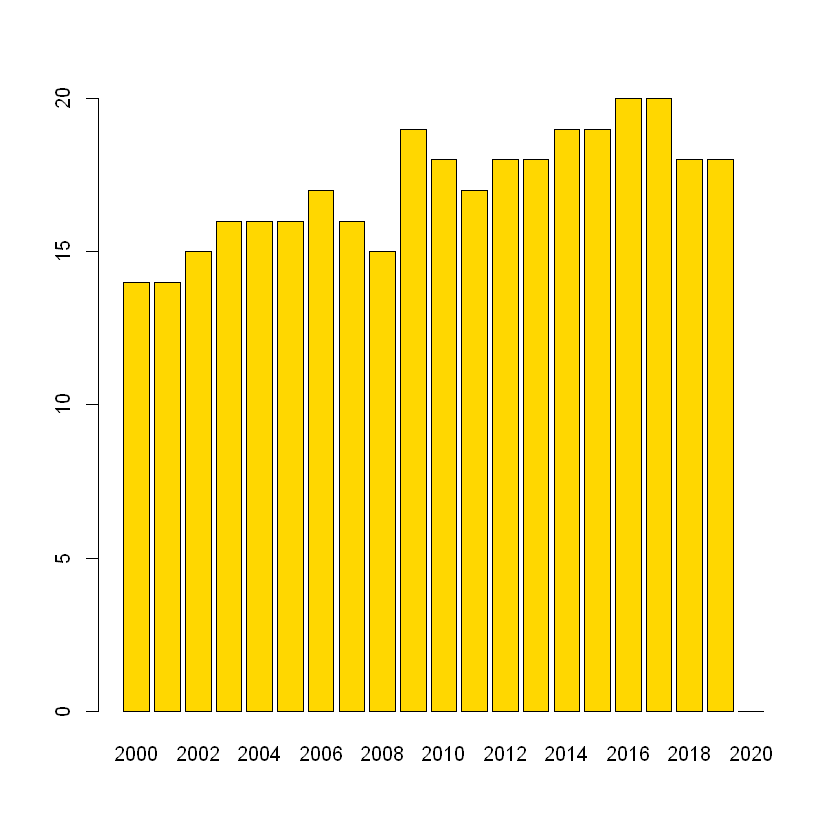

In [15]:
occ_y = table(complete_energy$Year)
print(occ_y)
barplot(occ_y, col="gold")

Chaque année n'a pas le même nombre d'observations.

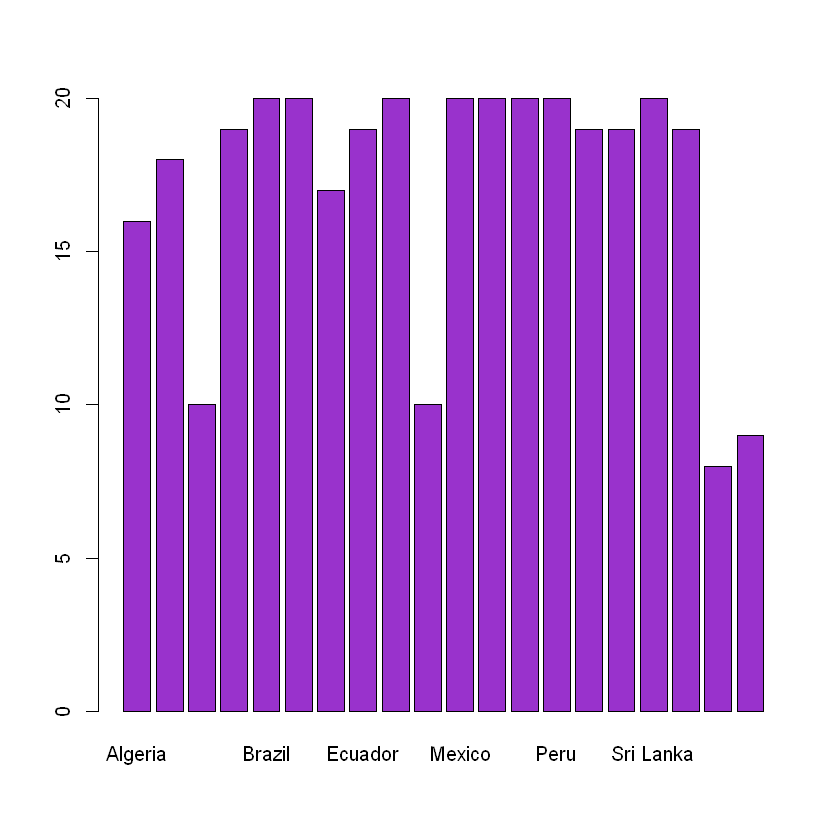

In [16]:
occ_e = table(complete_energy$Entity)
#print(occ_e)
barplot(occ_e,col = "darkorchid")


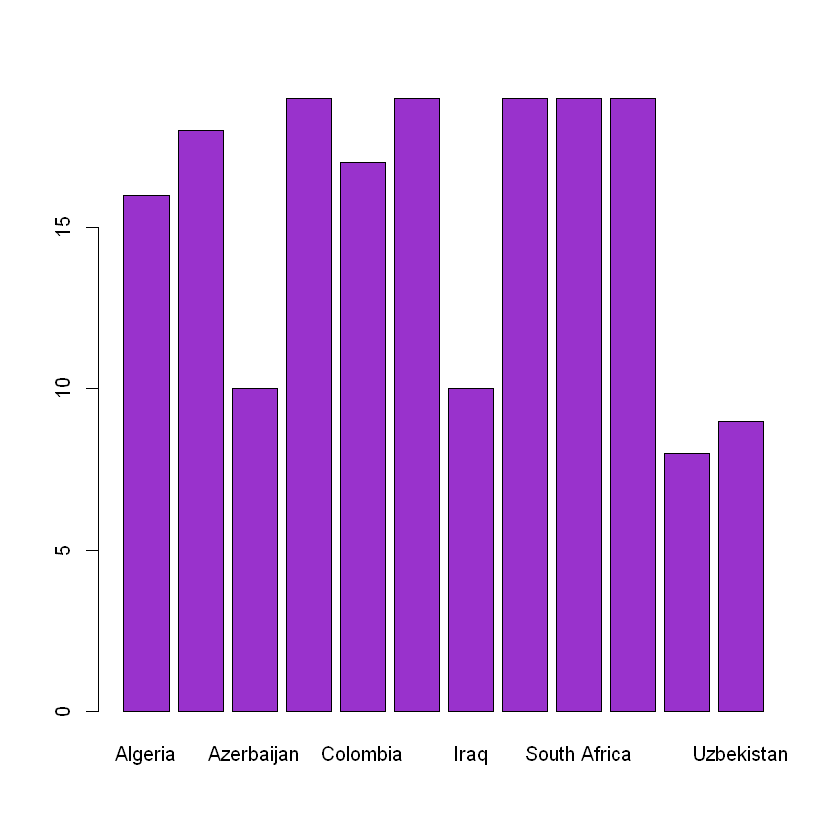

In [17]:
occ_e20 = occ_e[occ_e<20]
barplot(occ_e20,col = "darkorchid")

Chaque pays n'a pas le même nombre d'observations. Il y en a 12 qui n'ont pas été observés durant les 20 années de l'étude

#### Pour les variables quantitatives

In [18]:
summary(complete_energy)

    Entity               Year      Access_elec      Access_fuels  
 Length:343         2016   : 20   Min.   : 32.00   Min.   : 8.30  
 Class :character   2017   : 20   1st Qu.: 82.01   1st Qu.:42.70  
 Mode  :character   2009   : 19   Median : 96.65   Median :82.20  
                    2014   : 19   Mean   : 89.48   Mean   :68.91  
                    2015   : 19   3rd Qu.: 99.11   3rd Qu.:93.90  
                    2010   : 18   Max.   :100.00   Max.   :99.90  
                    (Other):228                                   
 Renewable_elec   Financial_flows     Renewable_energy  Elec_fossil     
 Min.   :  0.20   Min.   :0.000e+00   Min.   : 0.05    Min.   :   2.82  
 1st Qu.: 42.90   1st Qu.:1.145e+06   1st Qu.:10.32    1st Qu.:  19.36  
 Median : 72.11   Median :3.277e+07   Median :22.25    Median :  48.75  
 Mean   :119.85   Mean   :1.784e+08   Mean   :24.25    Mean   : 287.17  
 3rd Qu.:151.41   3rd Qu.:2.020e+08   3rd Qu.:38.09    3rd Qu.: 142.76  
 Max.   :684.92   Max.   :

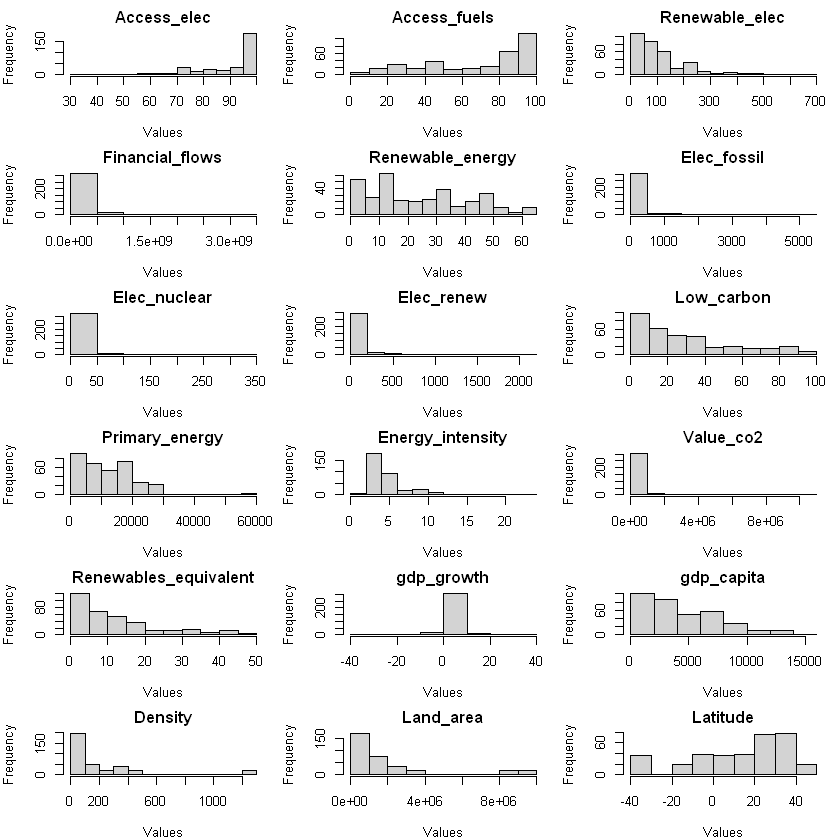

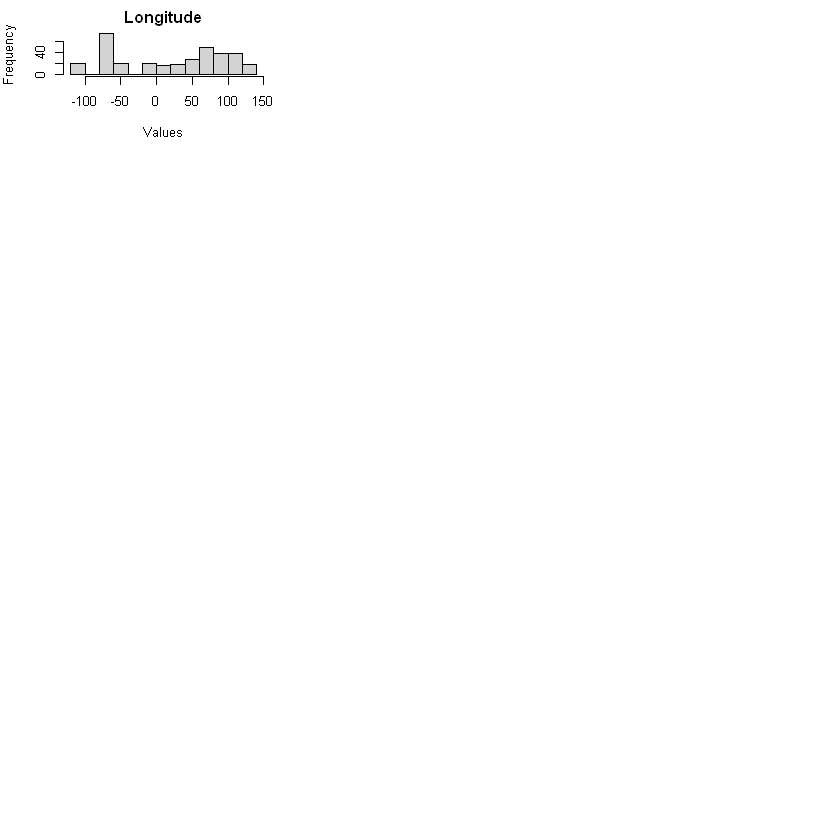

In [19]:
par(mfrow = c(6,3) , mar = c(4,4,2,1))

for (i in 3:length(names(complete_energy))) {
    dfi = complete_energy[,c(i)]
    hist(dfi, main=names(complete_energy)[i],xlab='Values')
}

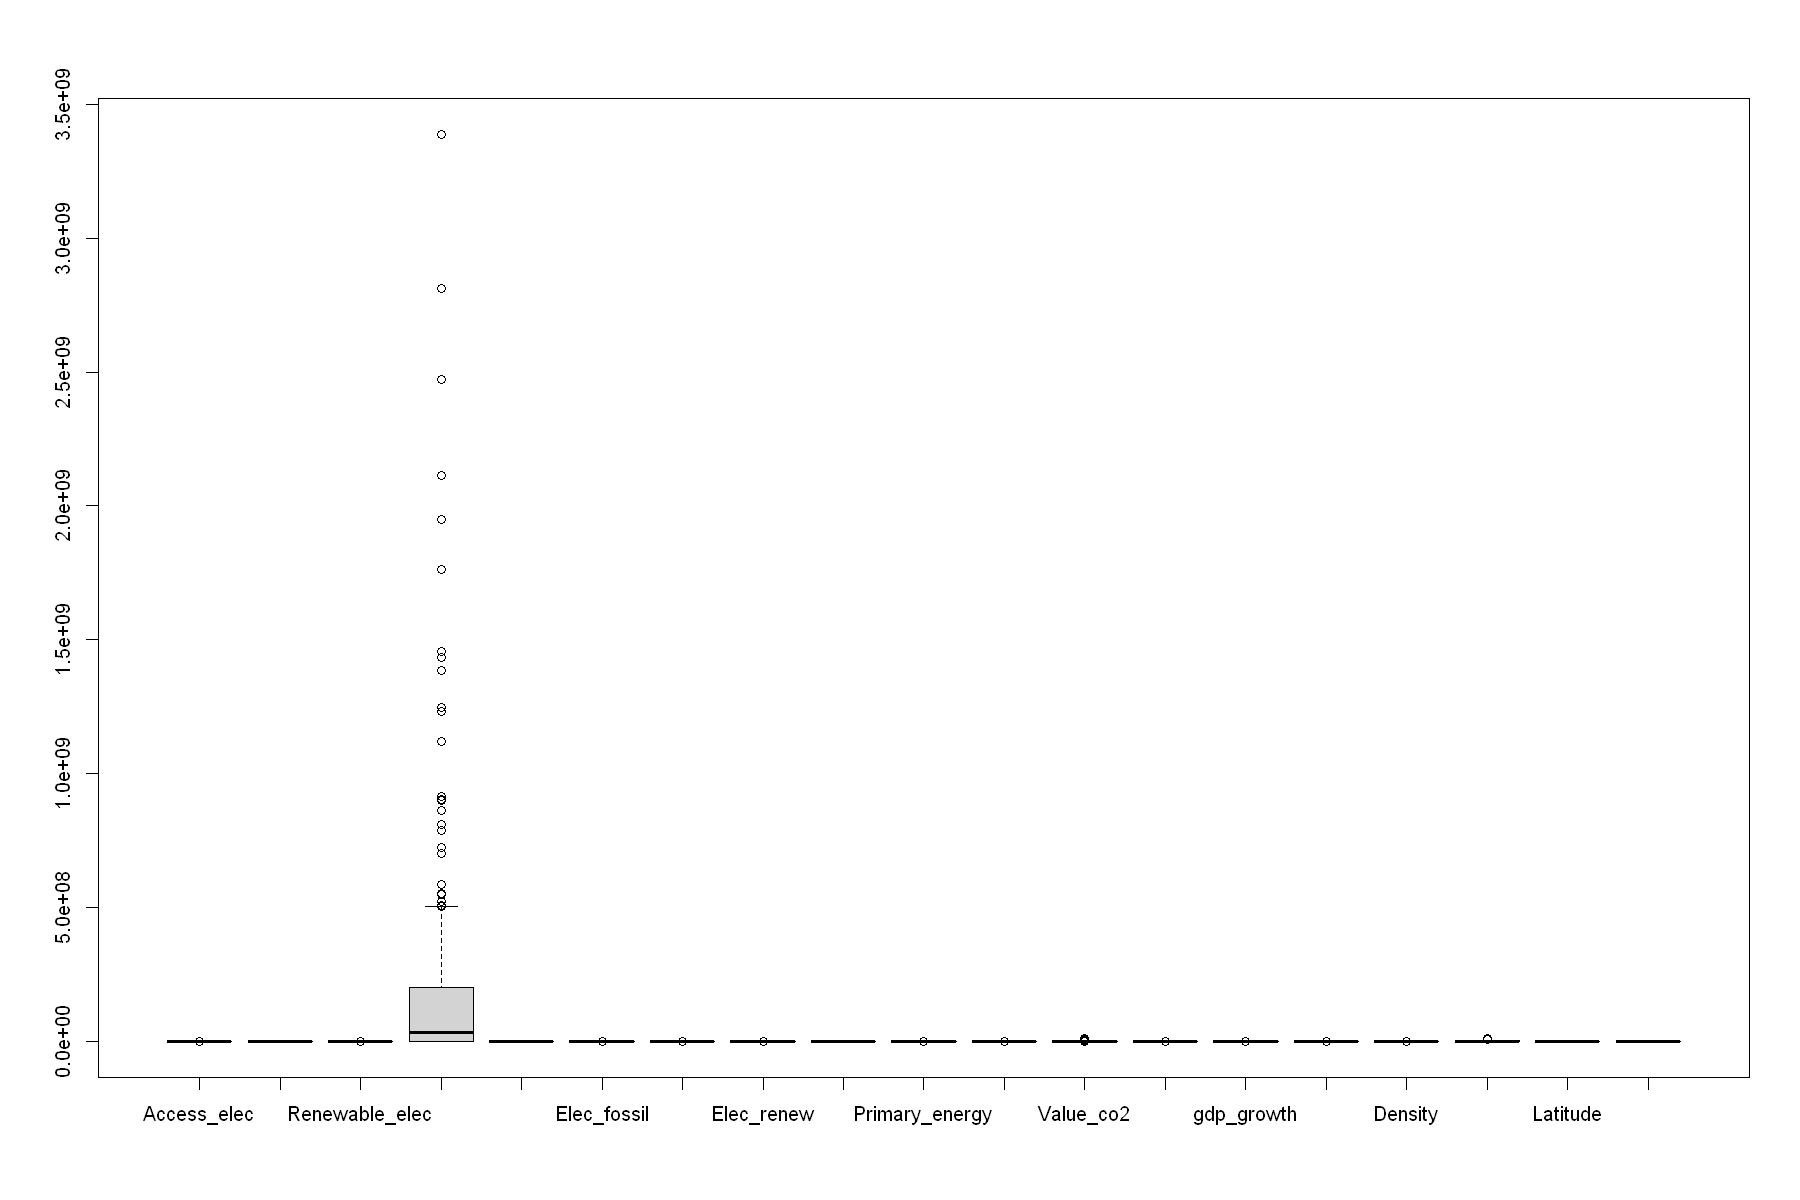

In [20]:
options(repr.plot.width = 15, repr.plot.height = 10)

df = complete_energy[,-c(1,2)]
boxplot(df)

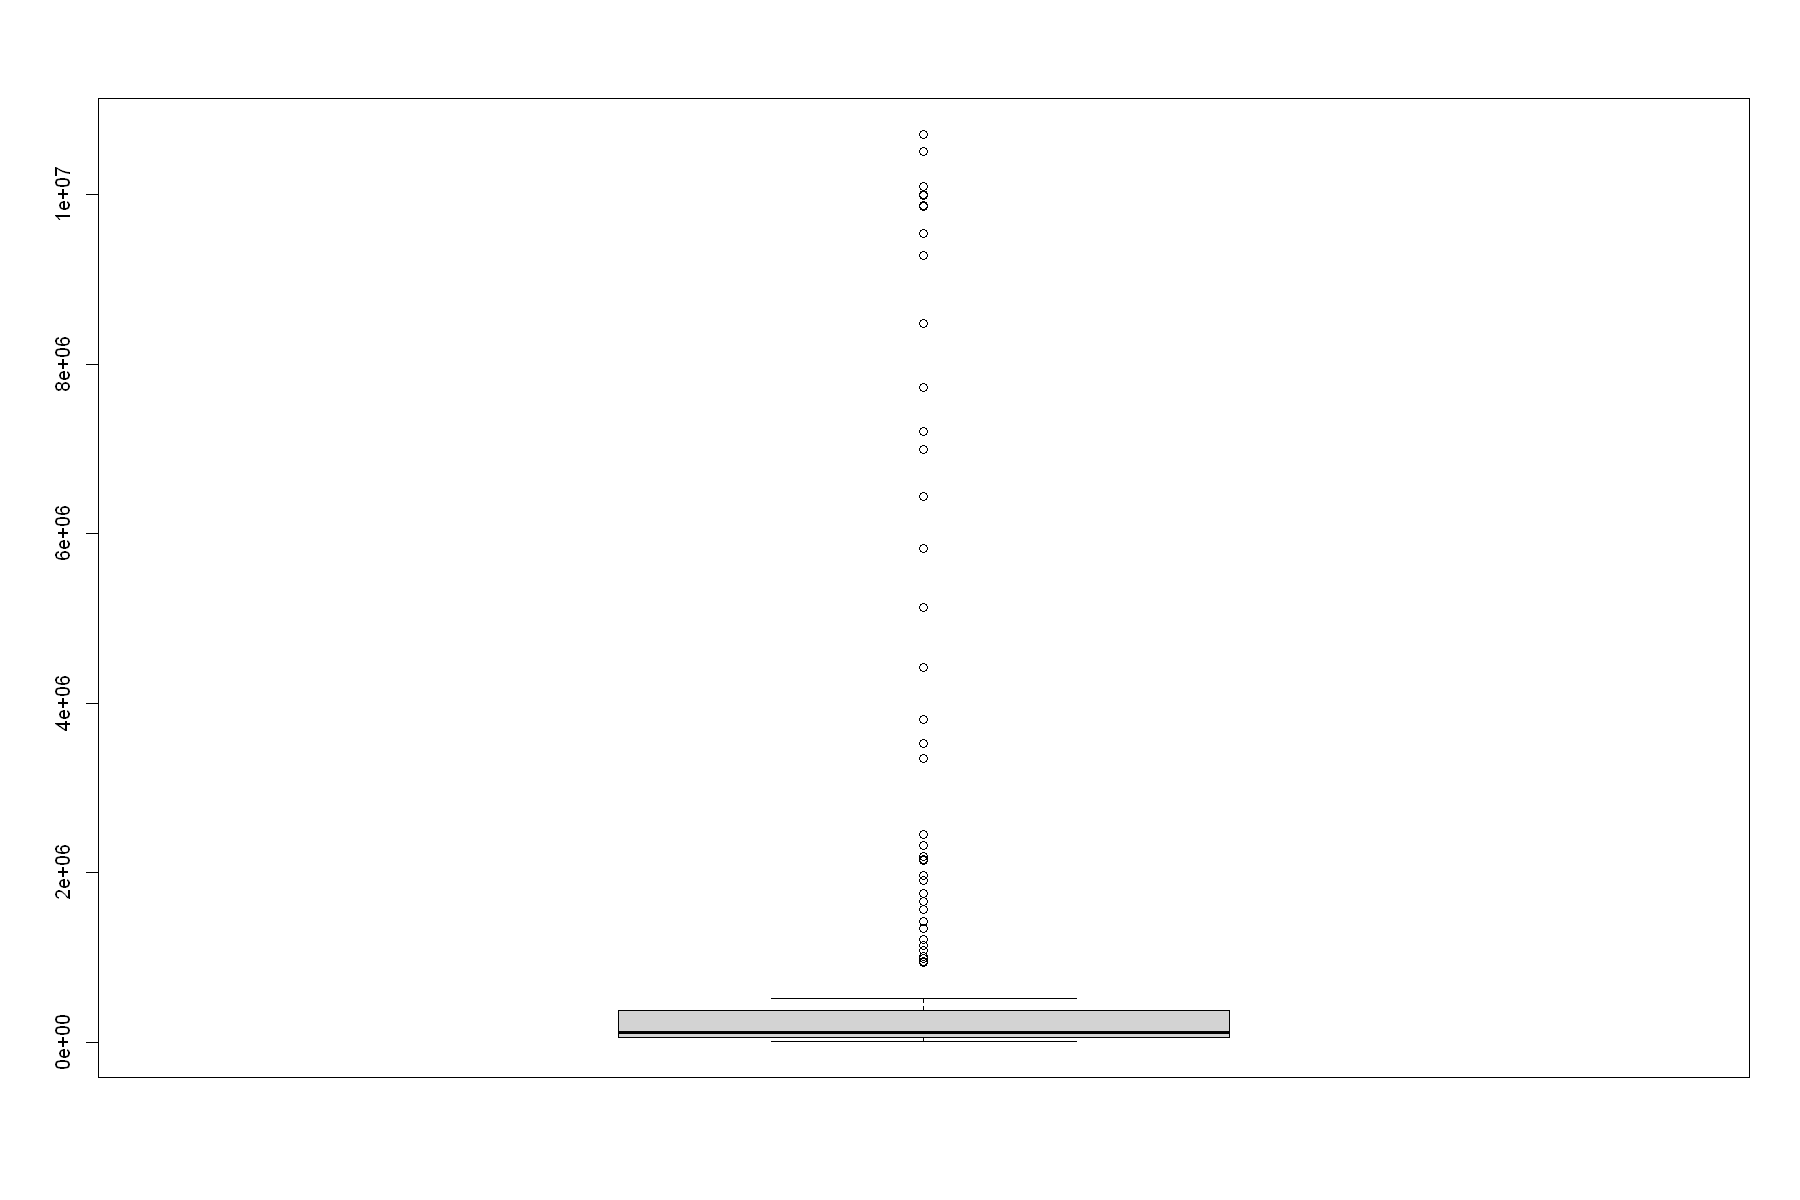

In [21]:
boxplot(df$Value_co2)

Les échelles de valeurs sont très différentes en fonction des variables que nous regardons dans notre energyset, nos avons choisi de nous focaliser sur Value_CO2 et nous voyons que celle-ci est composée de beaucoup d'outliers. Donc l'observation en boxplot n'est pas forcément pertinente.

##### Transformation des variables

Warning message:
"The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead."


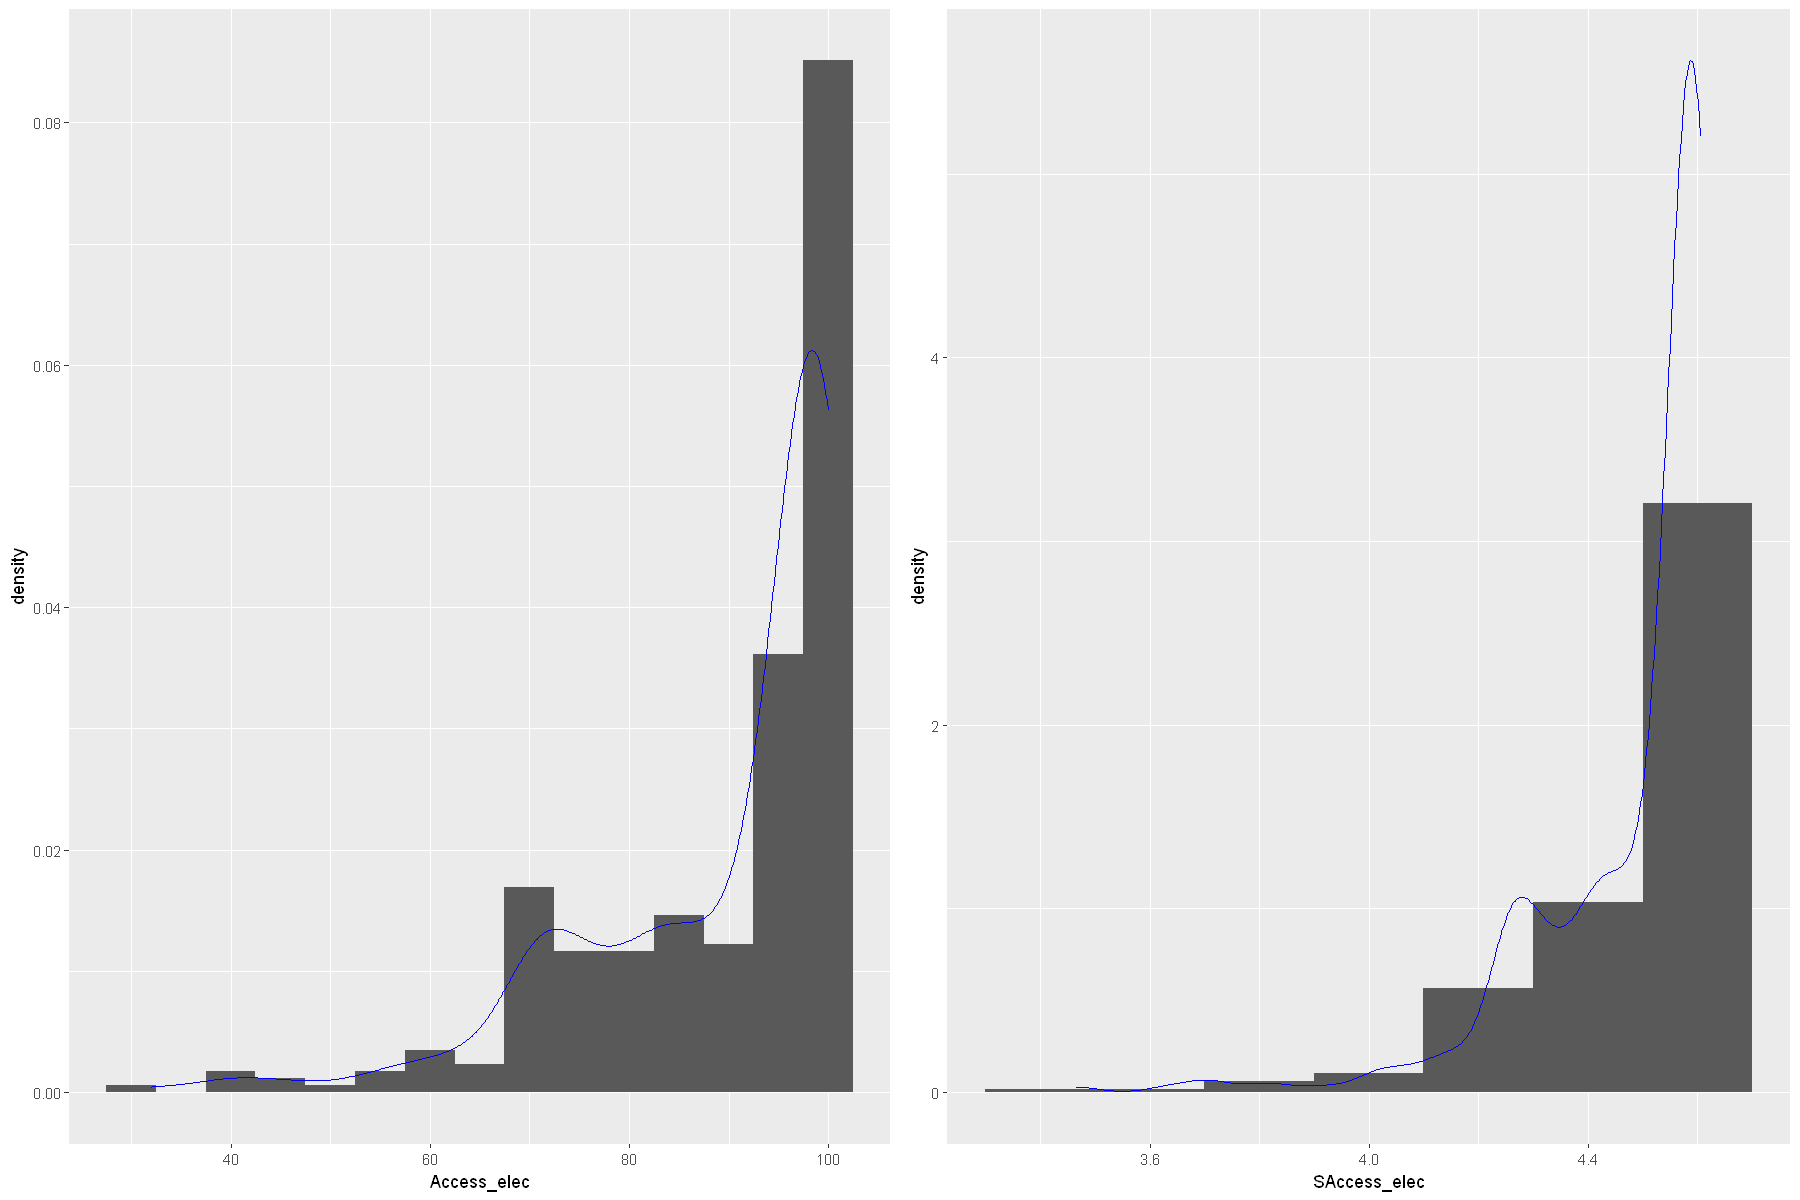

In [22]:
complete_energy[, "SAccess_elec"] = log(complete_energy[, "Access_elec"])

g1 = ggplot(complete_energy,aes(x=Access_elec))+ geom_histogram(aes(y=..density..),binwidth = 5)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SAccess_elec))+ geom_histogram(aes(y=..density..),binwidth = 0.2)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

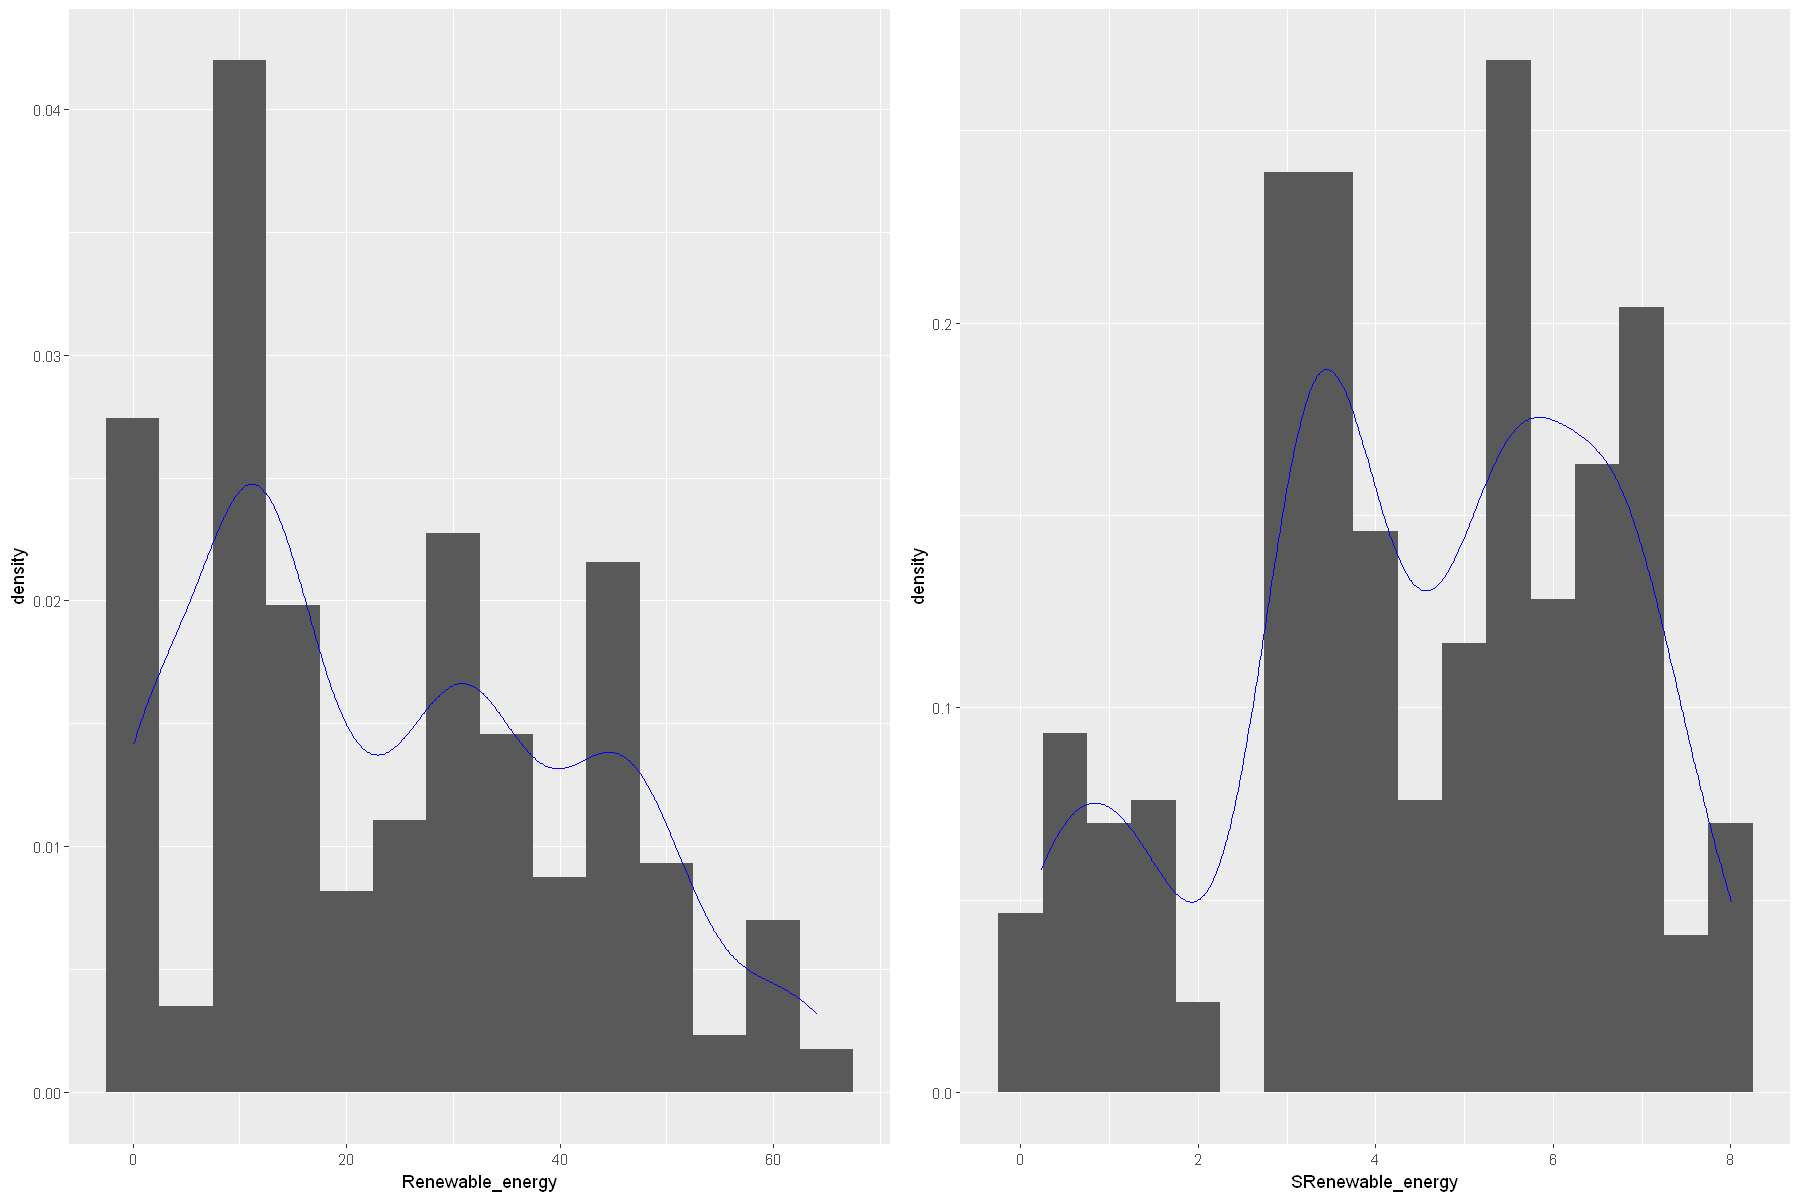

In [23]:
complete_energy[, "SRenewable_energy"] = sqrt(complete_energy[, "Renewable_energy"])

g1 = ggplot(complete_energy,aes(x=Renewable_energy))+ geom_histogram(aes(y=..density..),binwidth = 5)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SRenewable_energy))+ geom_histogram(aes(y=..density..),binwidth = 0.5)+geom_density(alpha=.1, col="blue") 
grid.arrange(g1,g2,ncol=2)

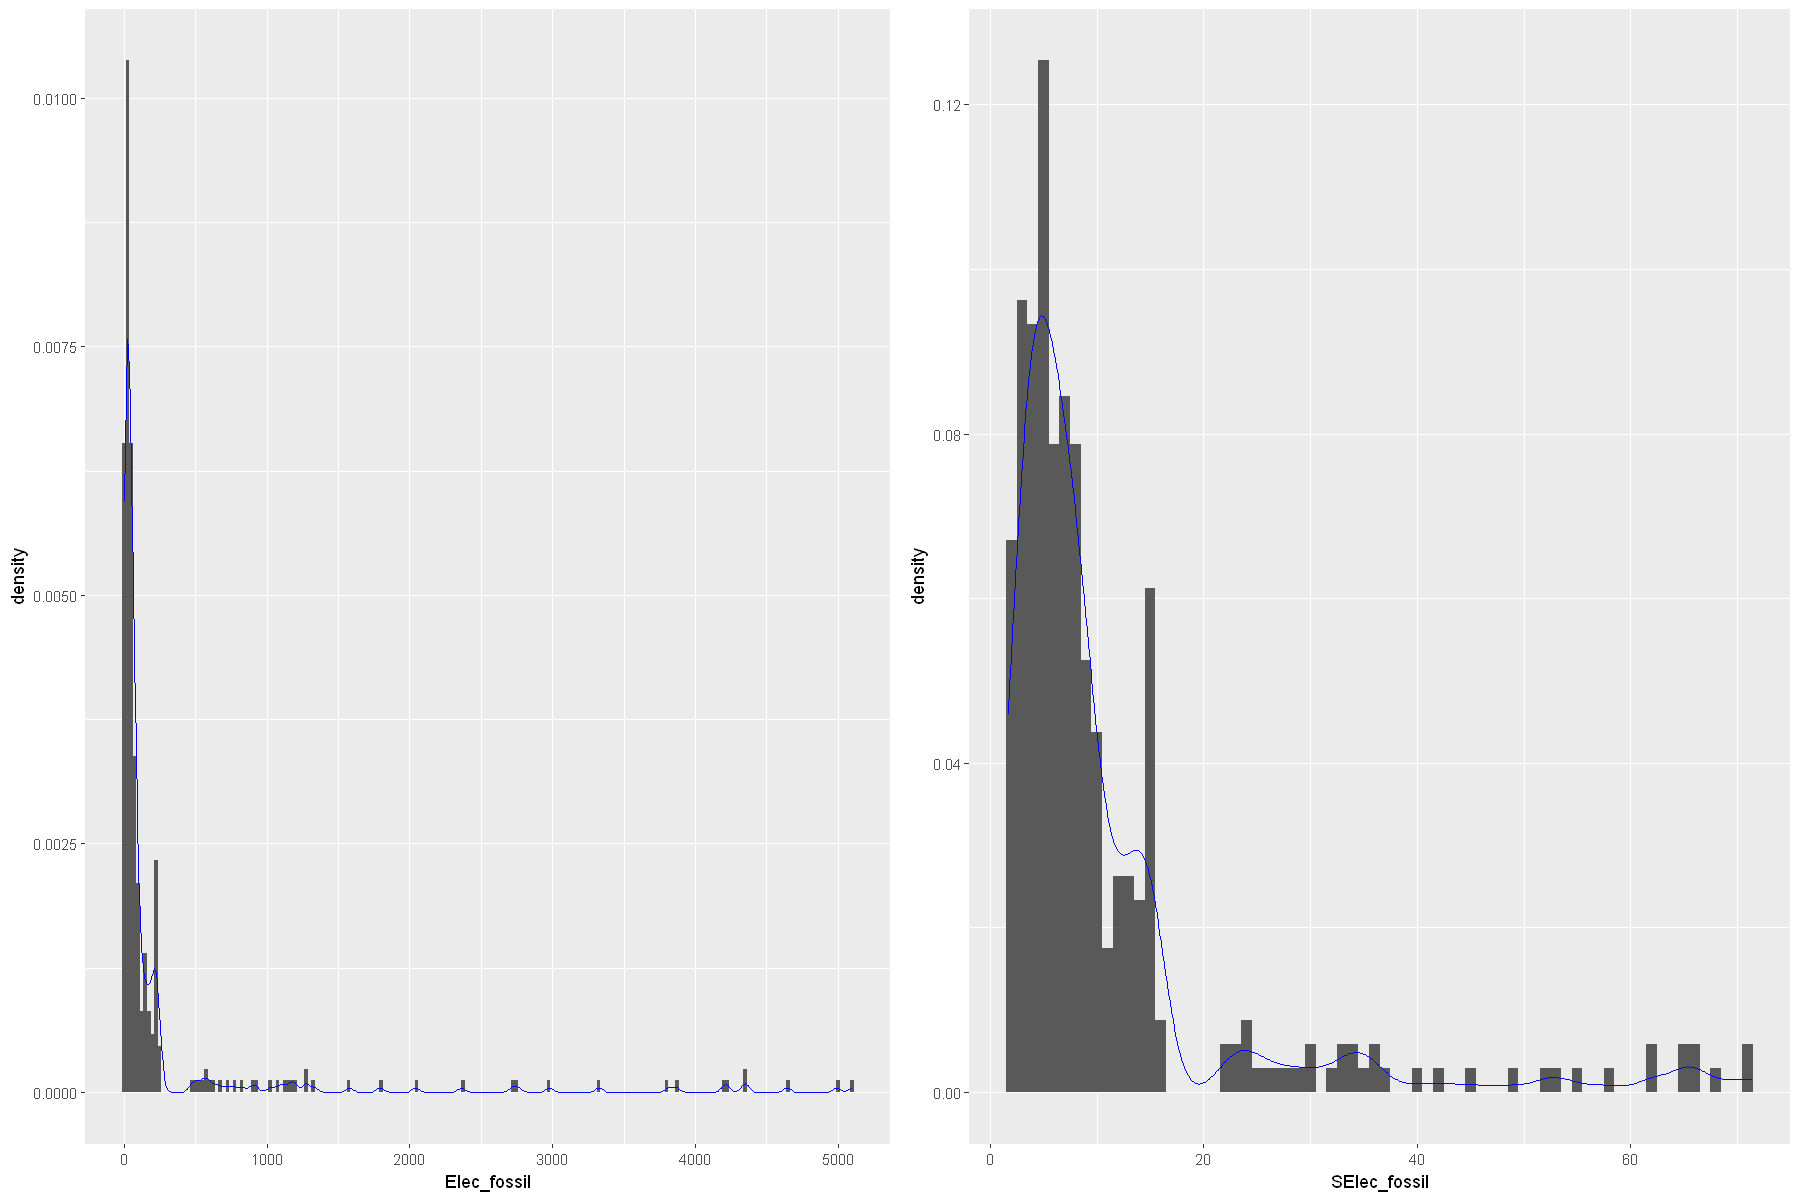

In [24]:
complete_energy[, "SElec_fossil"] = sqrt(complete_energy[, "Elec_fossil"])

g1 = ggplot(complete_energy,aes(x=Elec_fossil))+ geom_histogram(aes(y=..density..),binwidth = 25)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SElec_fossil))+ geom_histogram(aes(y=..density..),binwidth = 1)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

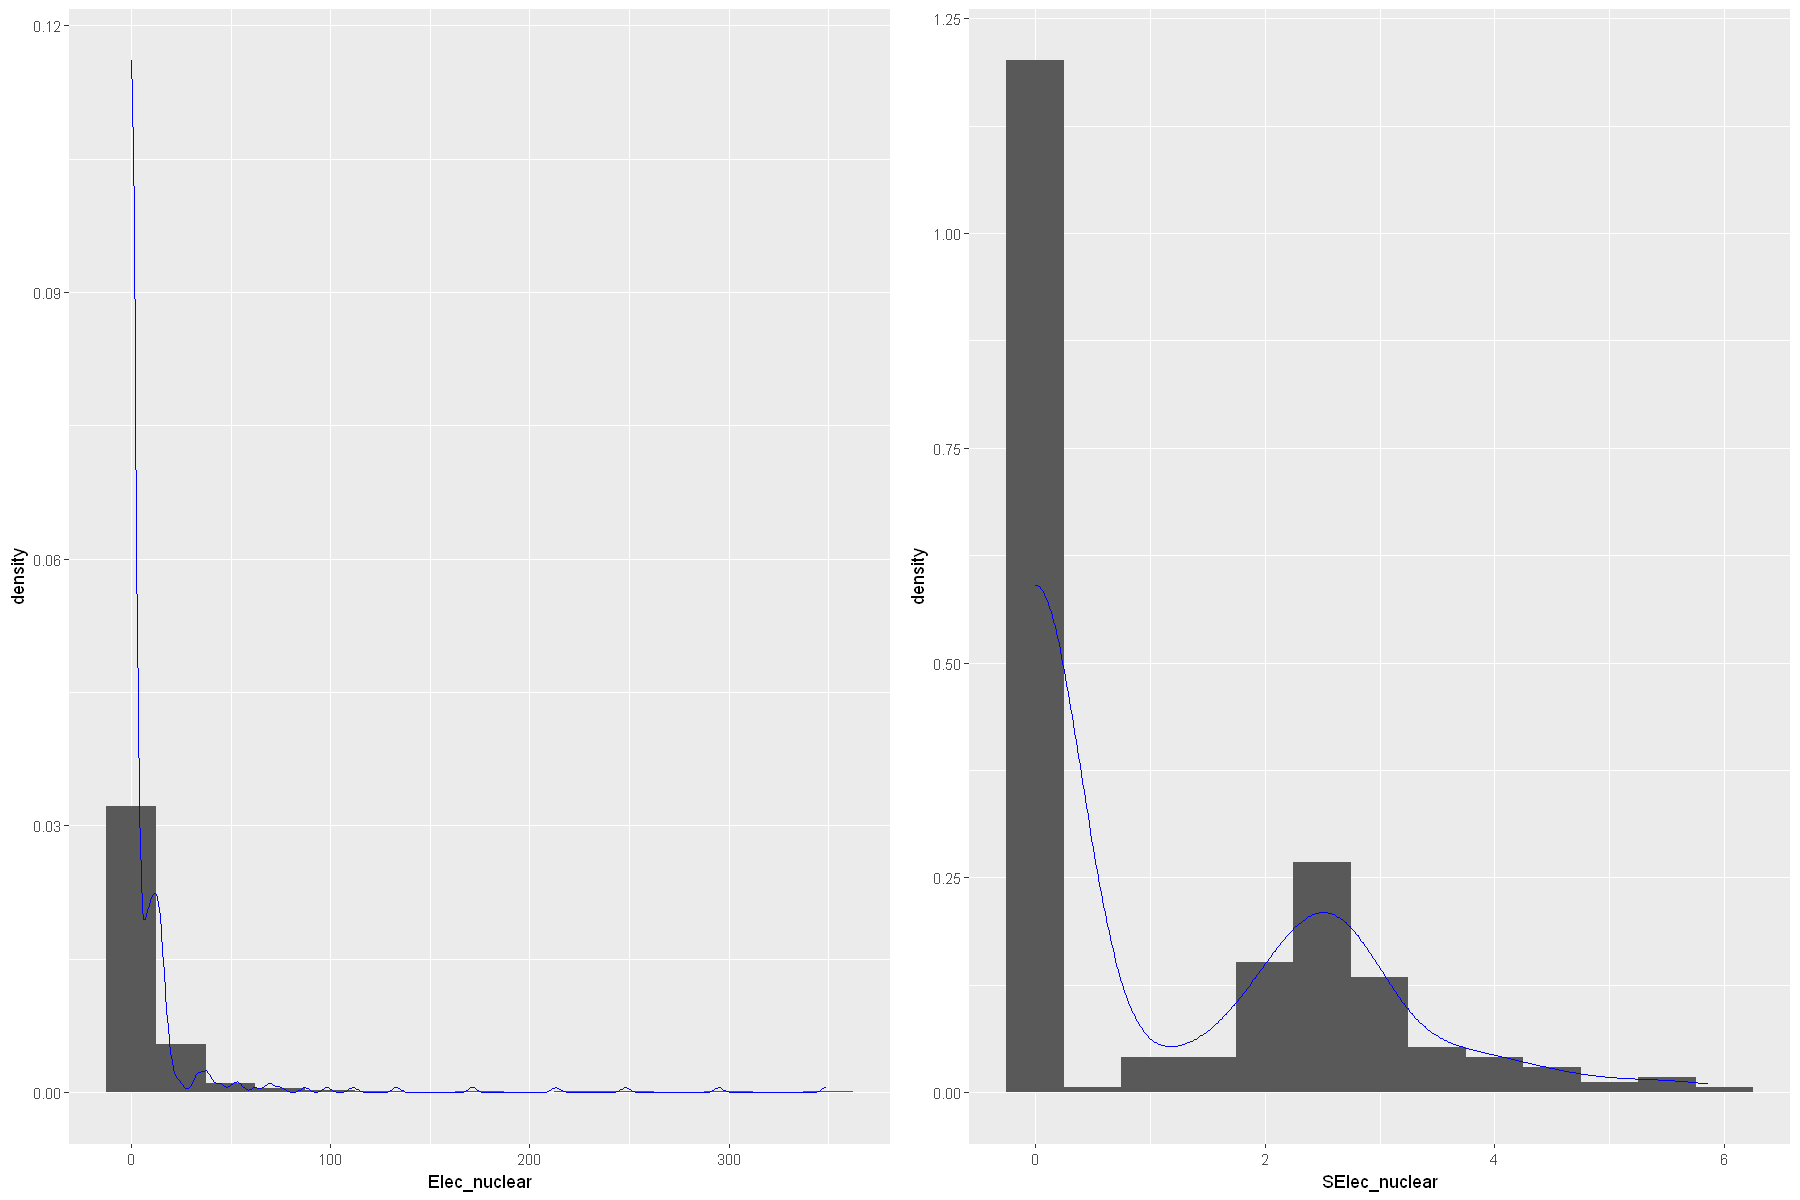

In [25]:
complete_energy[, "SElec_nuclear"] = log(1+complete_energy[, "Elec_nuclear"])

g1 = ggplot(complete_energy,aes(x=Elec_nuclear))+ geom_histogram(aes(y=..density..),binwidth = 25)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SElec_nuclear))+ geom_histogram(aes(y=..density..),binwidth = 0.5)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

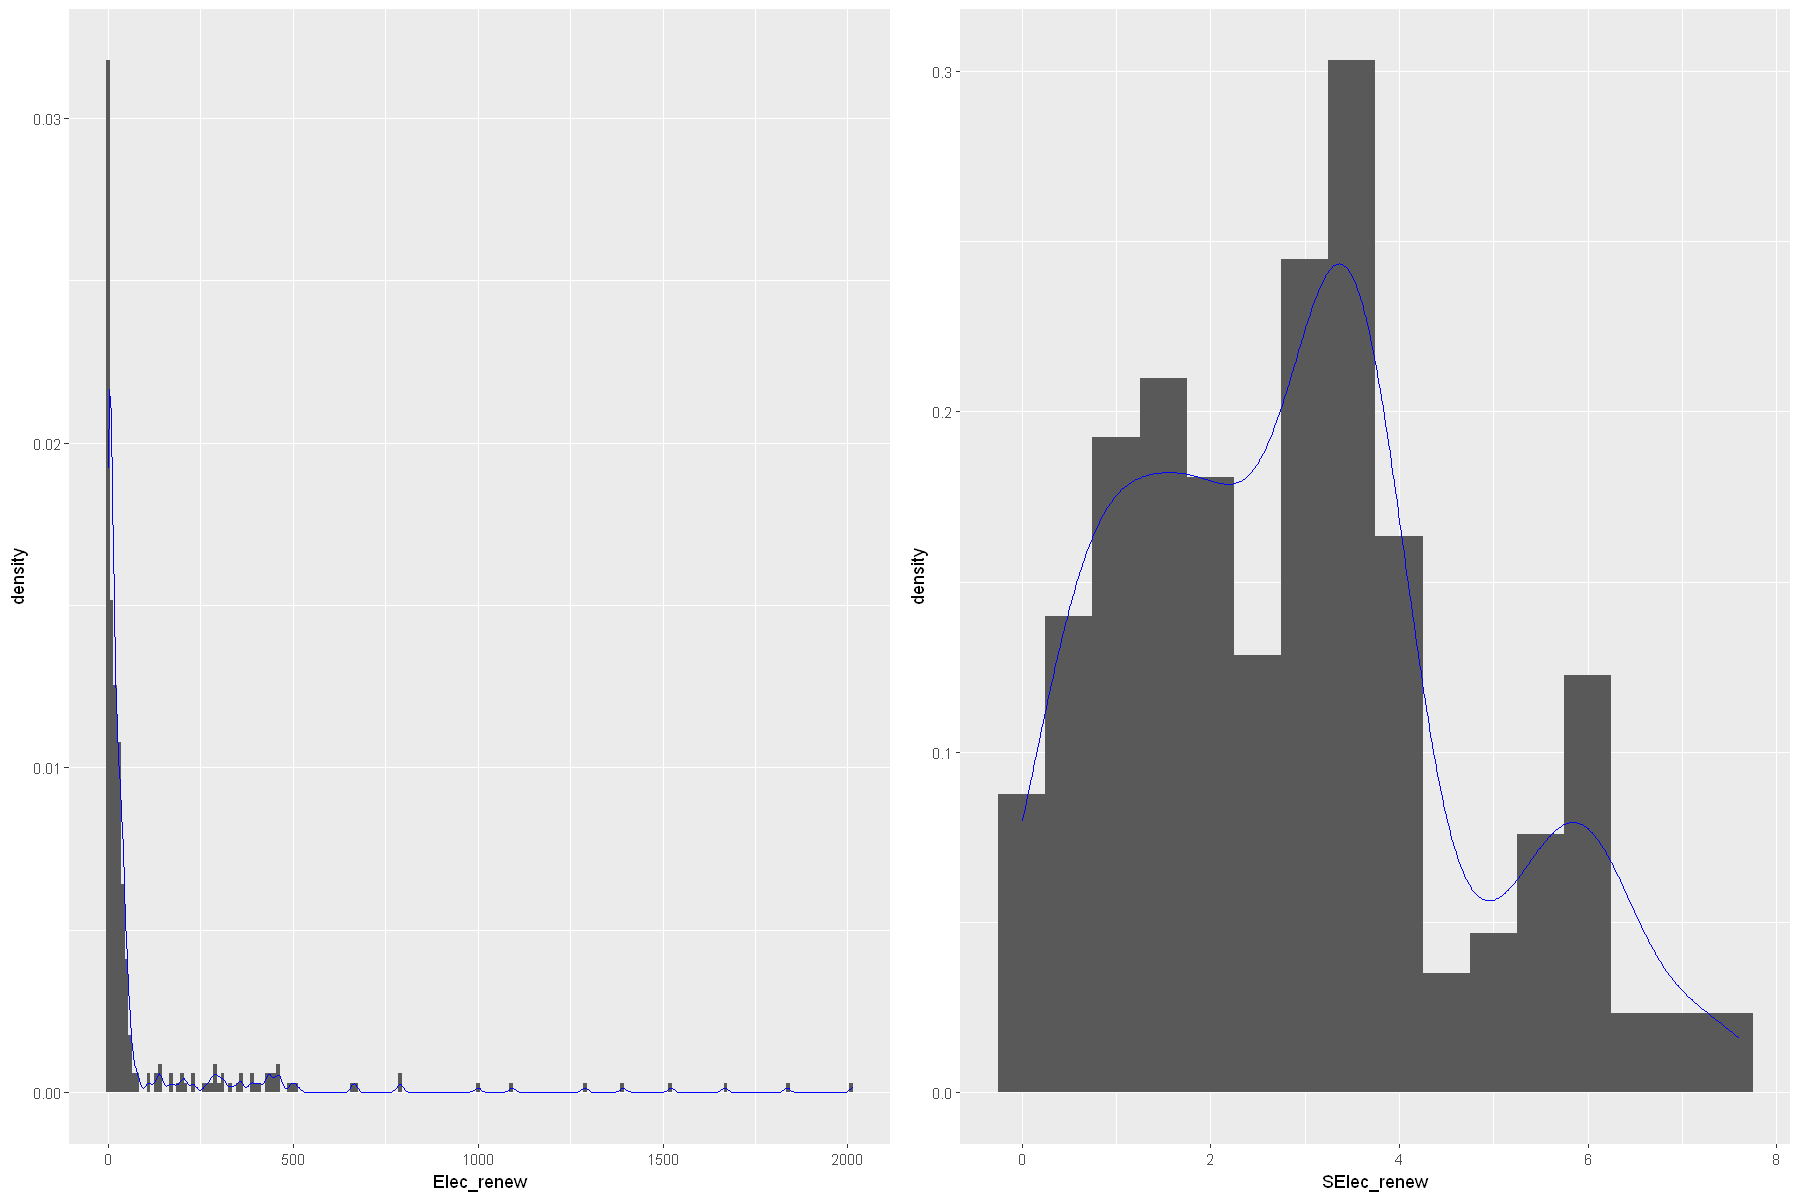

In [26]:
complete_energy[, "SElec_renew"] = log(1+complete_energy[, "Elec_renew"])

g1 = ggplot(complete_energy,aes(x=Elec_renew))+ geom_histogram(aes(y=..density..),binwidth = 10)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SElec_renew))+ geom_histogram(aes(y=..density..),binwidth = 0.5)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

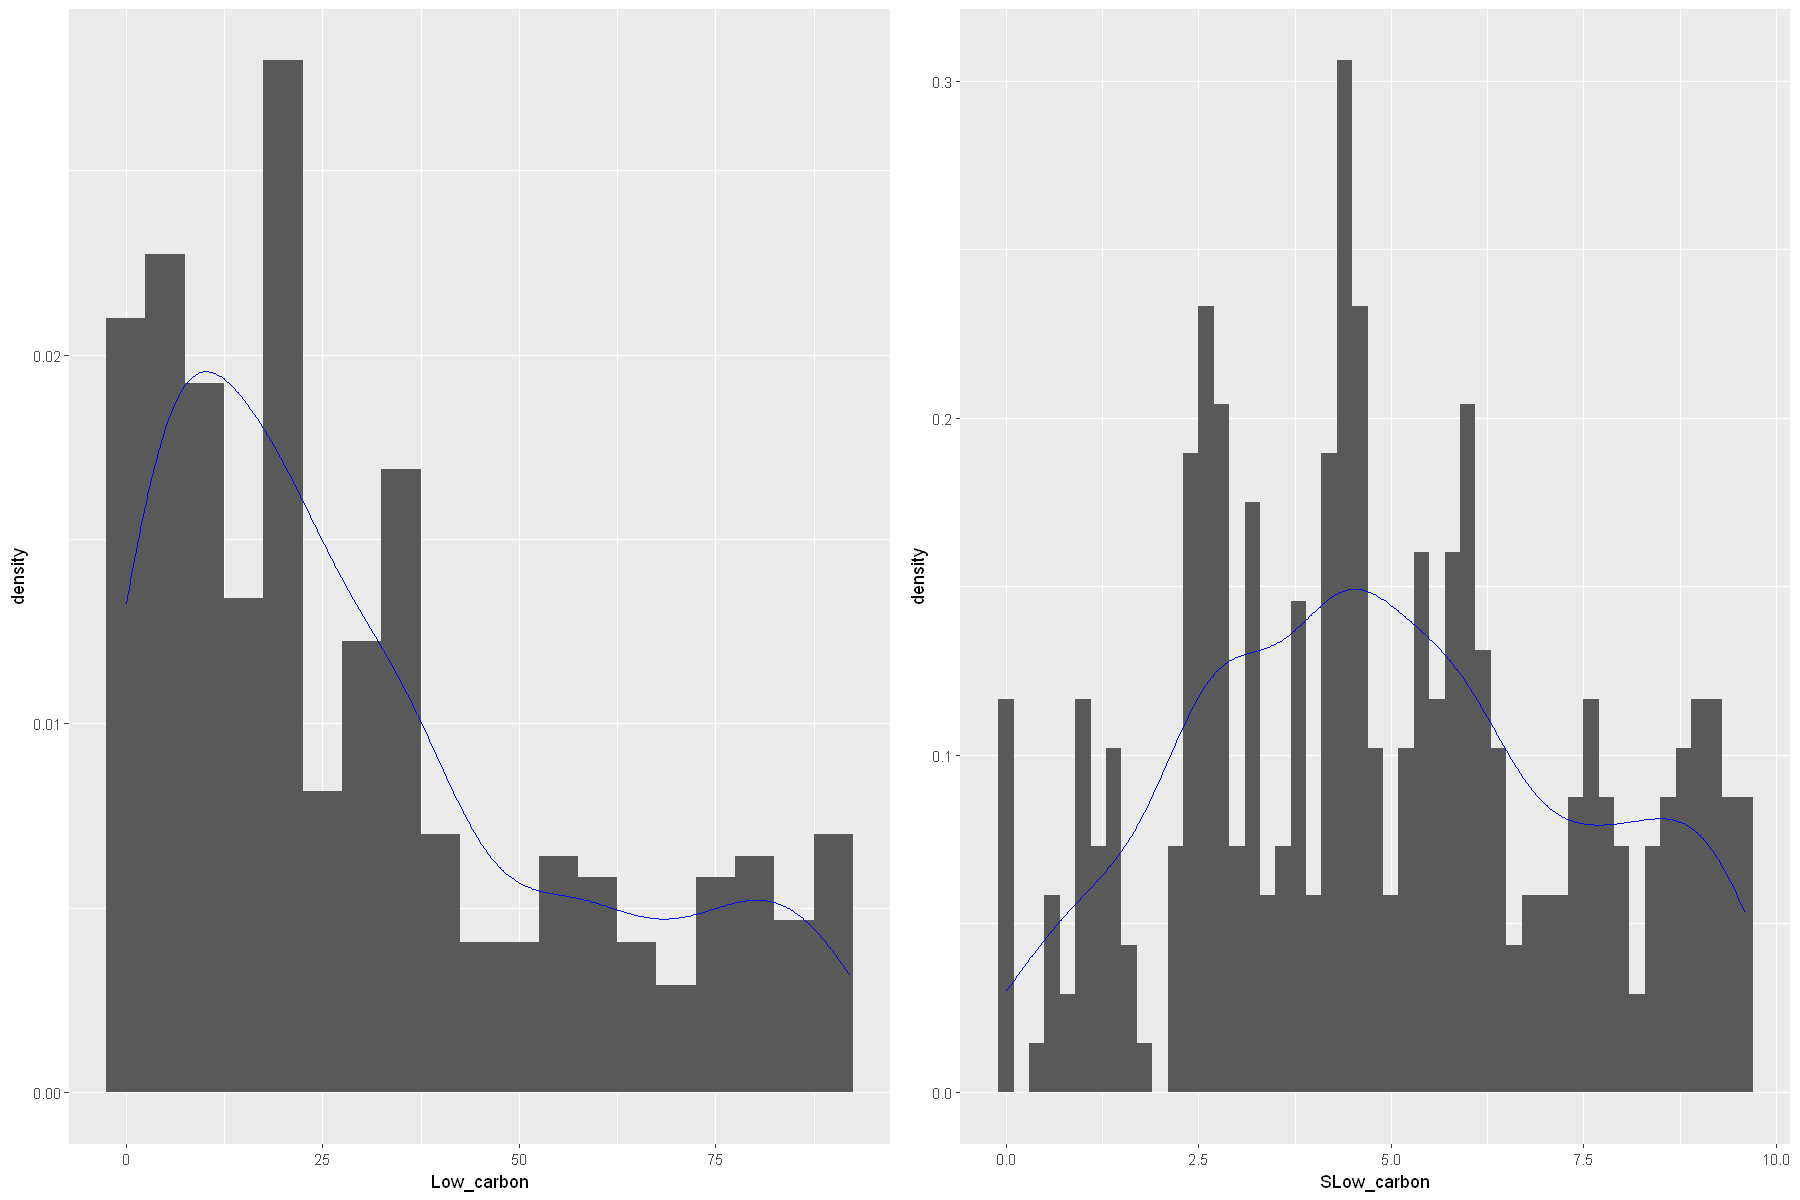

In [27]:
complete_energy[, "SLow_carbon"] = sqrt(complete_energy[, "Low_carbon"])

g1 = ggplot(complete_energy,aes(x=Low_carbon))+ geom_histogram(aes(y=..density..),binwidth = 5)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SLow_carbon))+ geom_histogram(aes(y=..density..),binwidth = 0.2)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

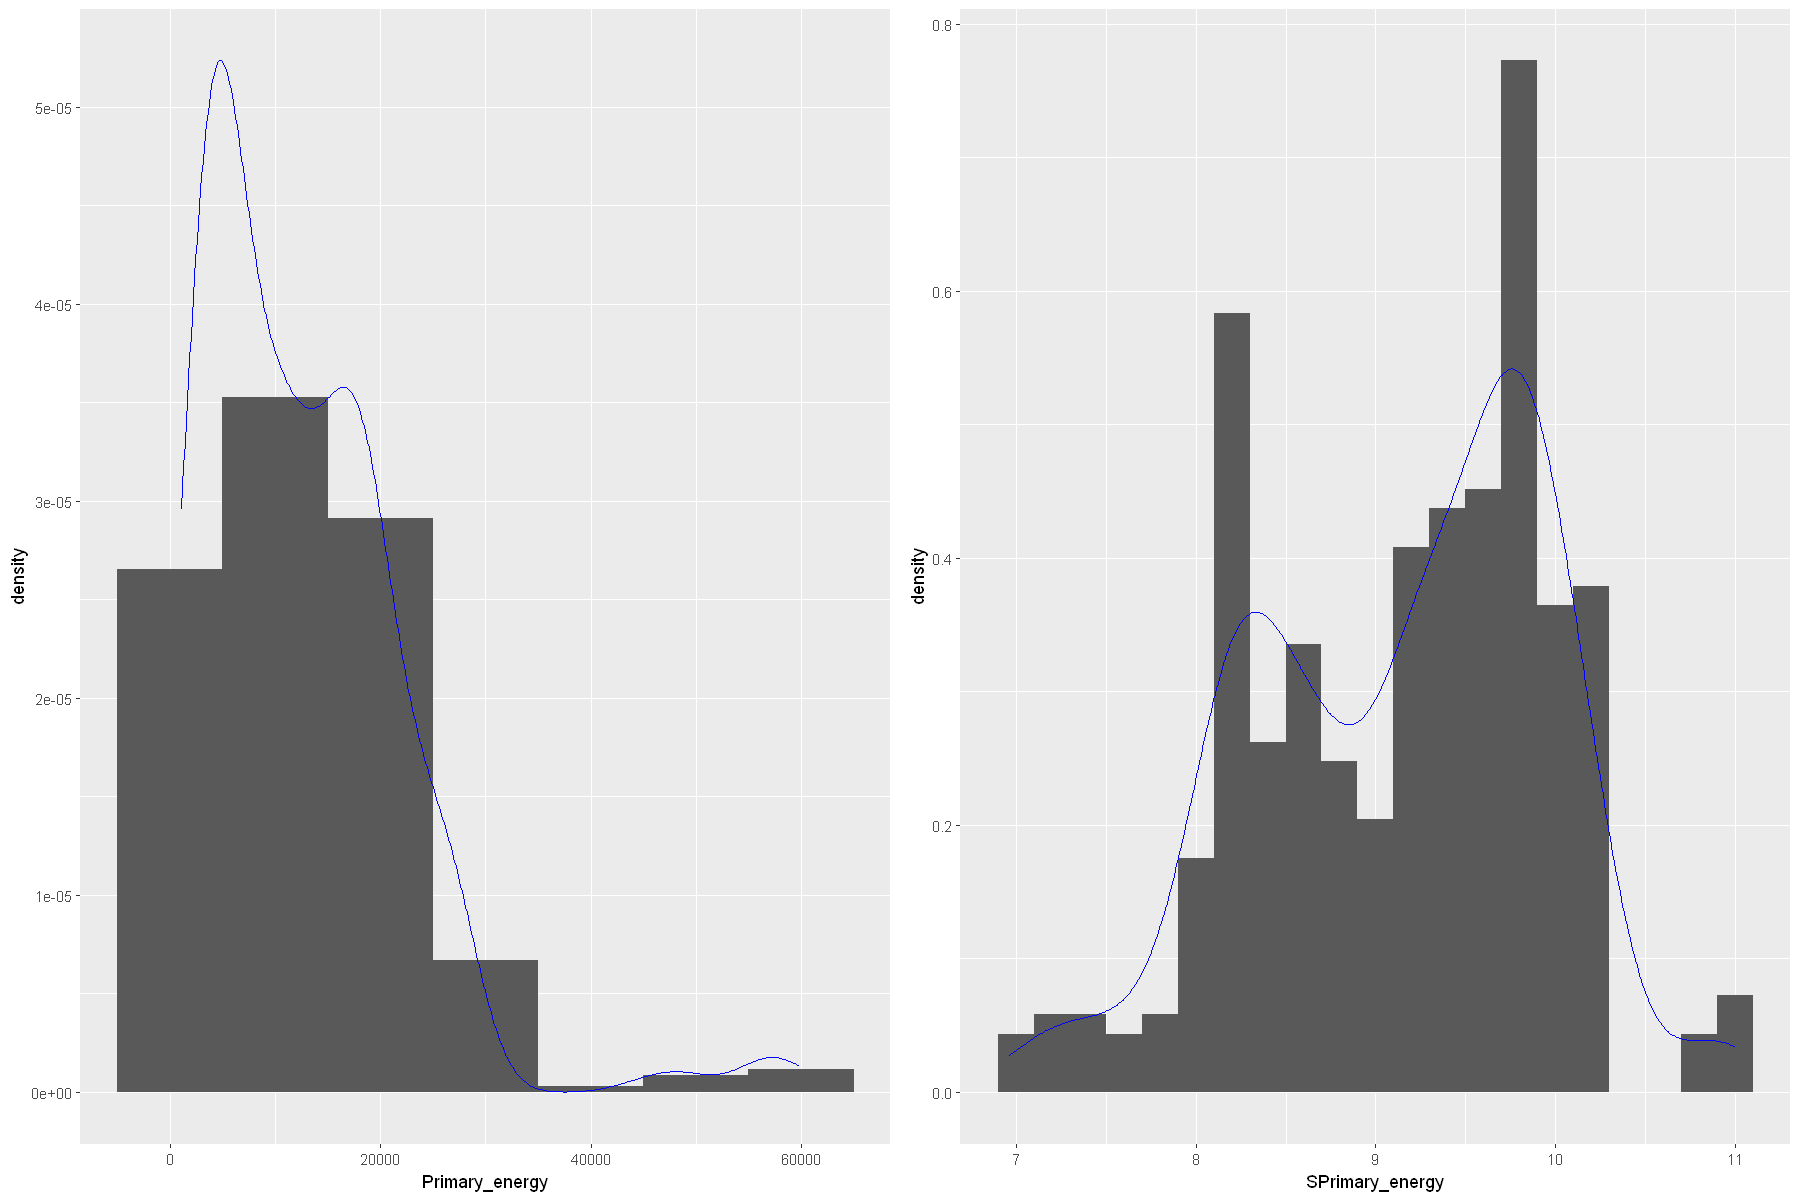

In [28]:
complete_energy[, "SPrimary_energy"] = log(complete_energy[, "Primary_energy"])

g1 = ggplot(complete_energy,aes(x=Primary_energy))+ geom_histogram(aes(y=..density..),binwidth = 10000)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SPrimary_energy))+ geom_histogram(aes(y=..density..),binwidth = 0.2)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

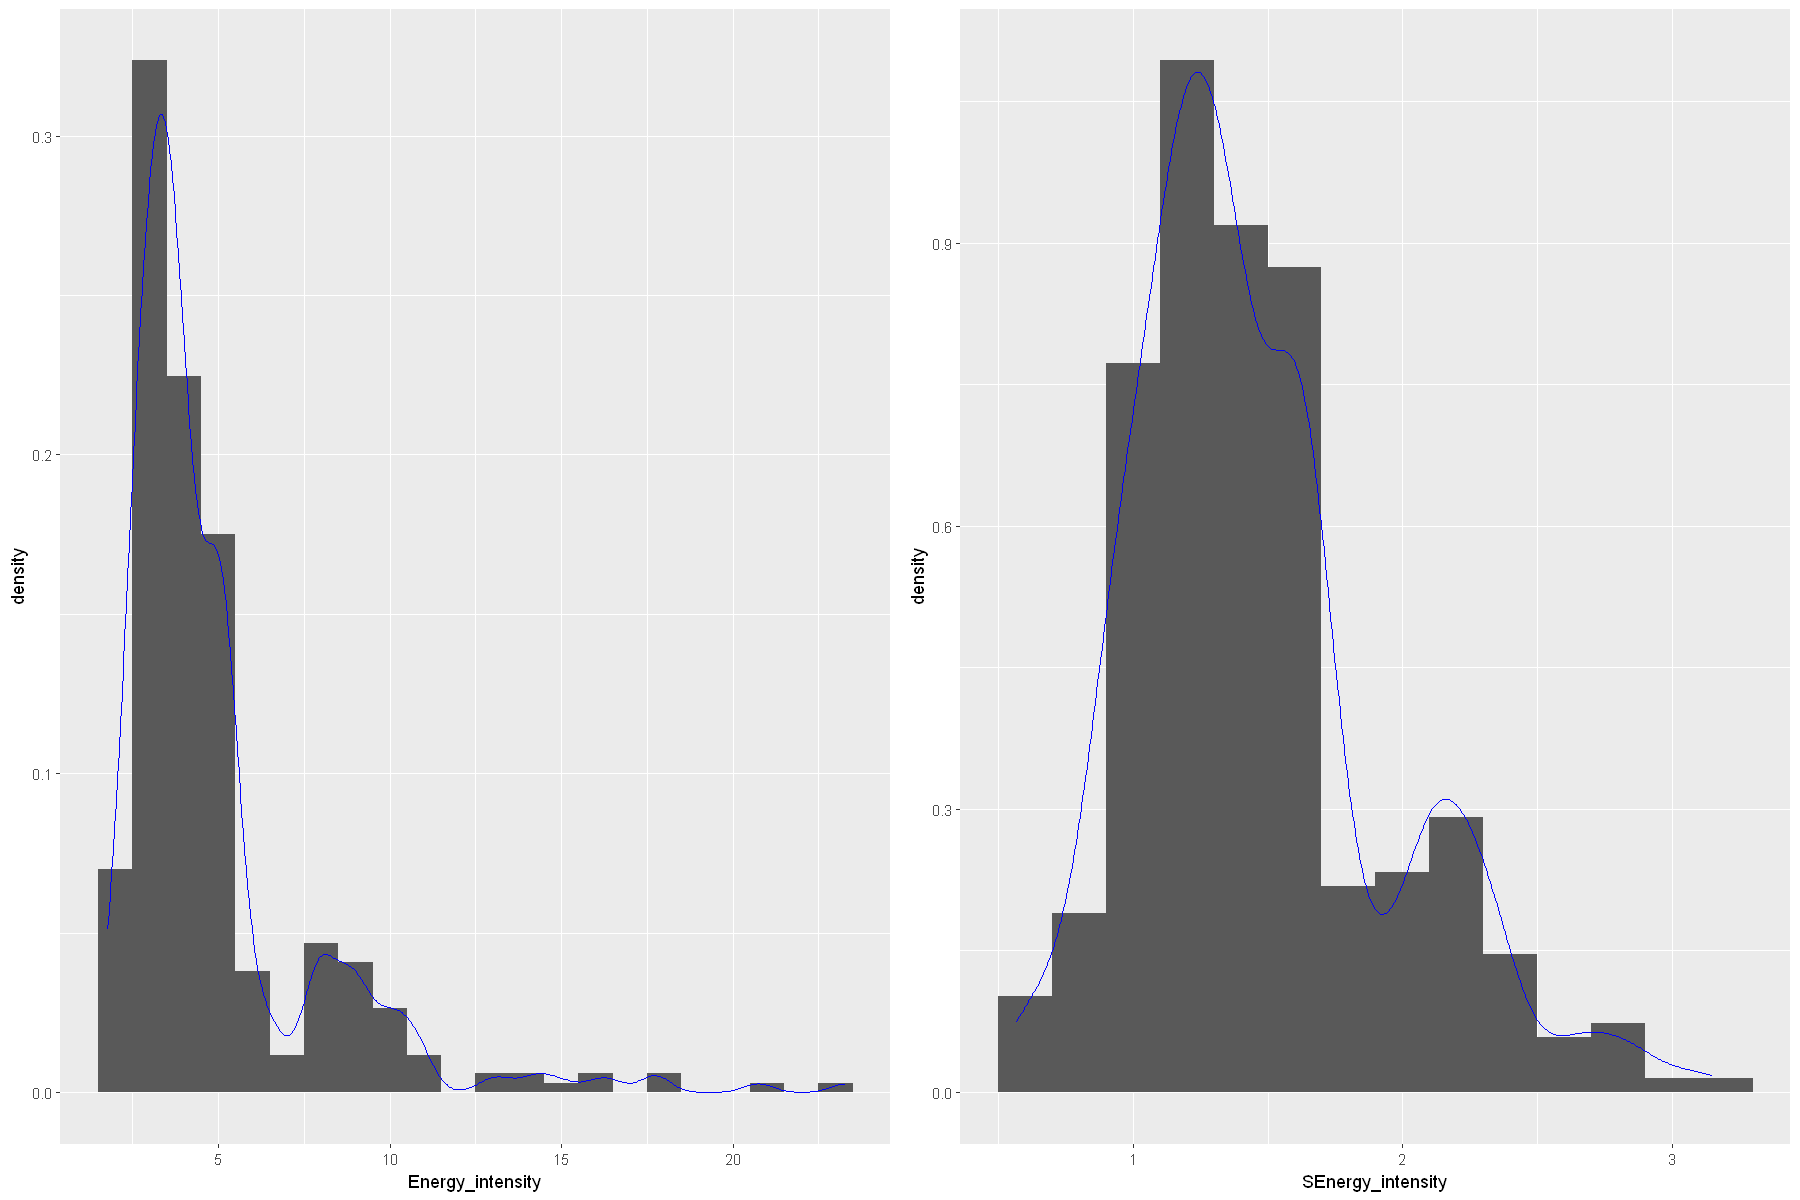

In [29]:
complete_energy[, "SEnergy_intensity"] = log(complete_energy[, "Energy_intensity"])

g1 = ggplot(complete_energy,aes(x=Energy_intensity))+ geom_histogram(aes(y=..density..),binwidth = 1)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SEnergy_intensity))+ geom_histogram(aes(y=..density..),binwidth = 0.2)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

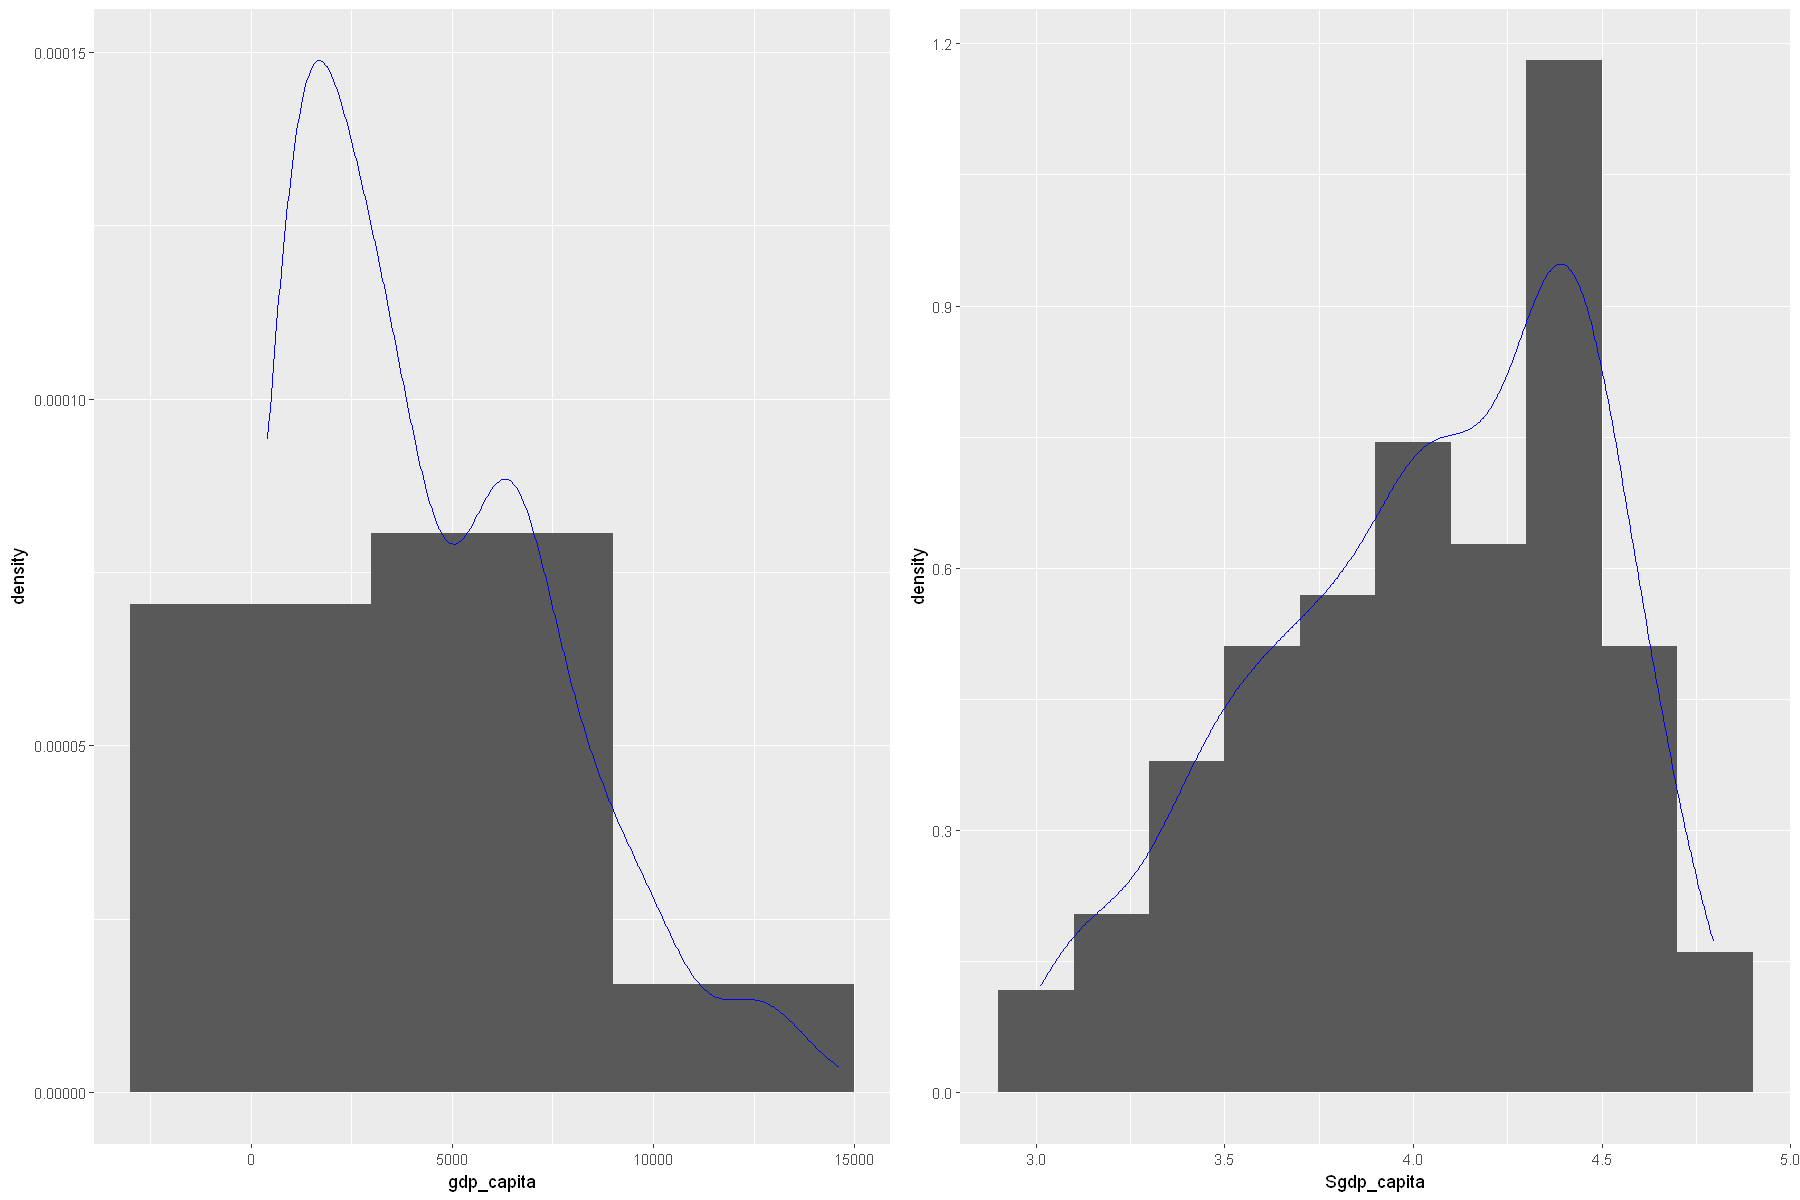

In [30]:
complete_energy[, "Sgdp_capita"] = log(sqrt(complete_energy[, "gdp_capita"]))

g1 = ggplot(complete_energy,aes(x=gdp_capita))+ geom_histogram(aes(y=..density..),binwidth = 6000)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=Sgdp_capita))+ geom_histogram(aes(y=..density..),binwidth = 0.2)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

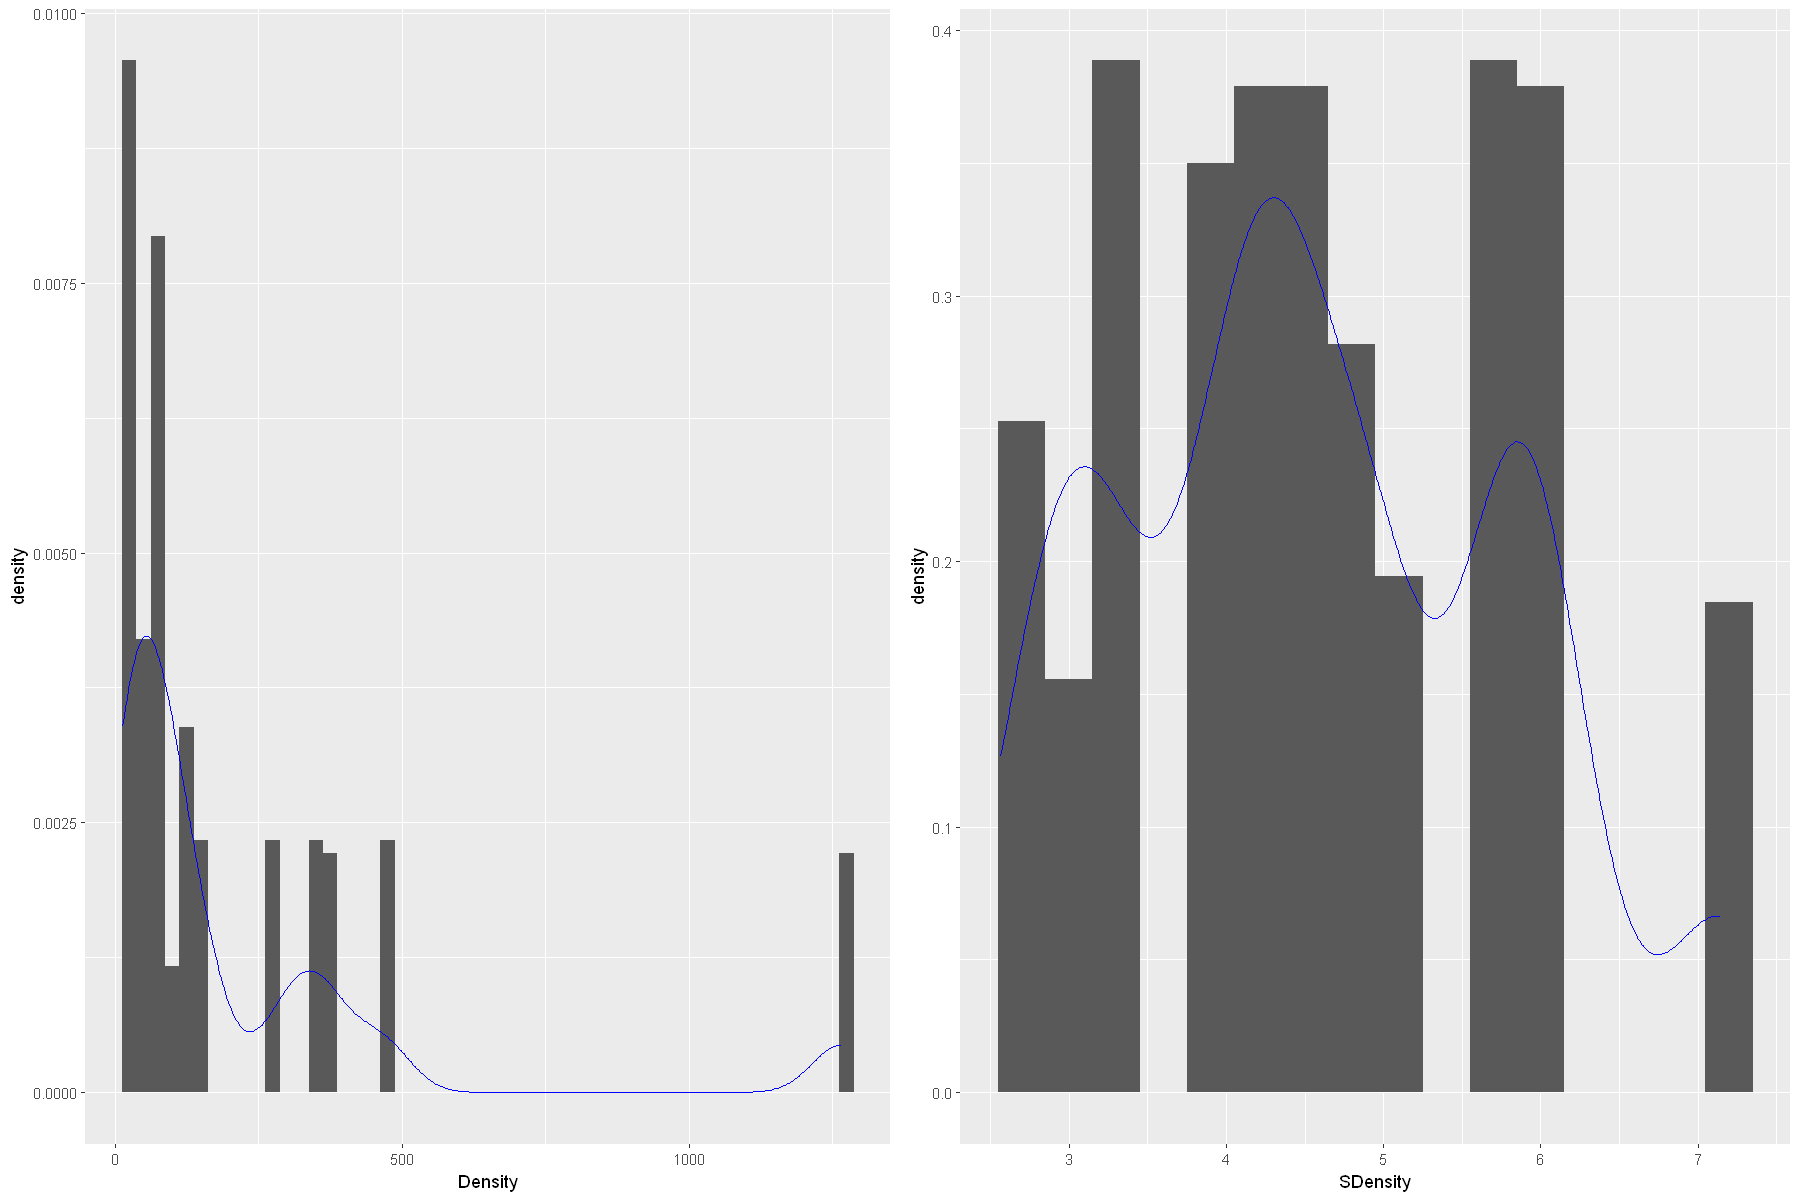

In [31]:
complete_energy[, "SDensity"] = log(complete_energy[, "Density"])

g1 = ggplot(complete_energy,aes(x=Density))+ geom_histogram(aes(y=..density..),binwidth = 25)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SDensity))+ geom_histogram(aes(y=..density..),binwidth = 0.3)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

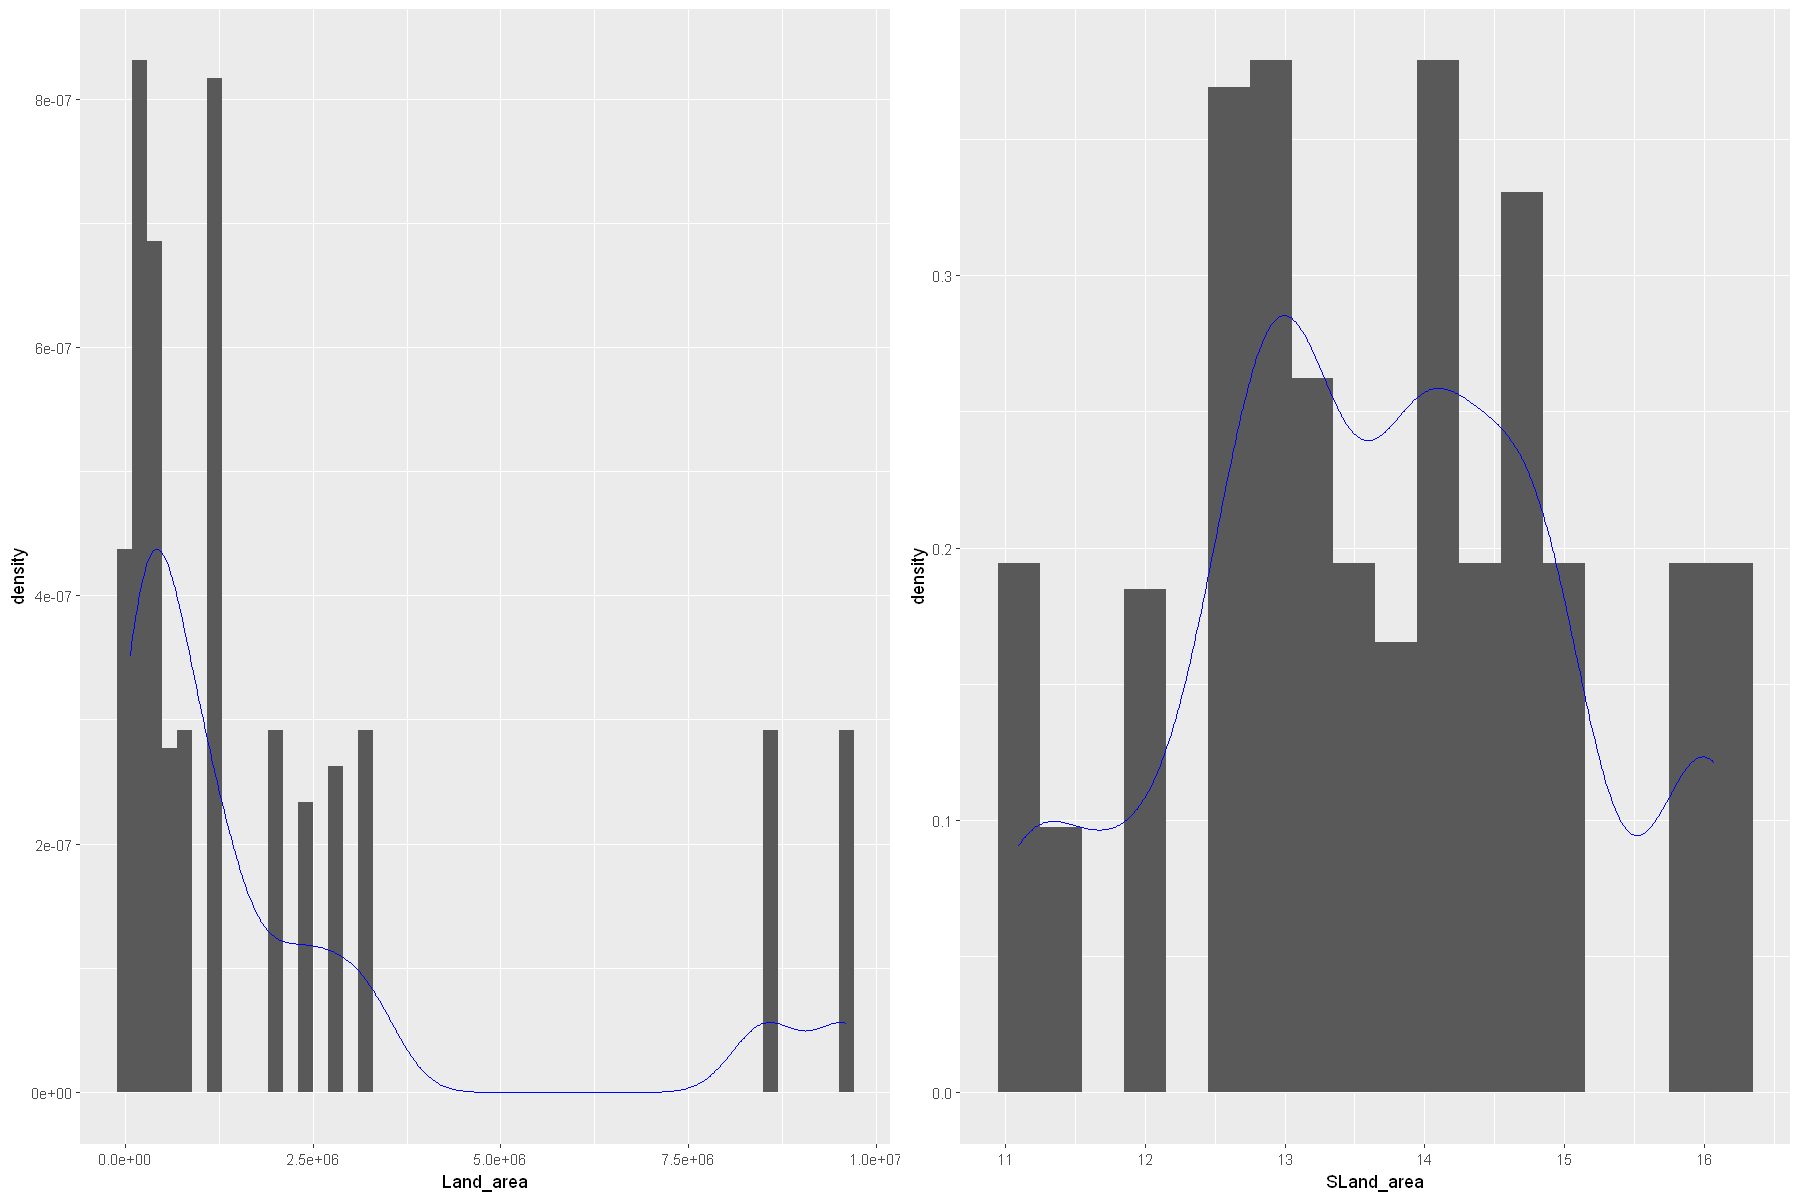

In [32]:
complete_energy[, "SLand_area"] = log(complete_energy[, "Land_area"])

g1 = ggplot(complete_energy,aes(x=Land_area))+ geom_histogram(aes(y=..density..),binwidth = 200000)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SLand_area))+ geom_histogram(aes(y=..density..),binwidth = 0.3)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

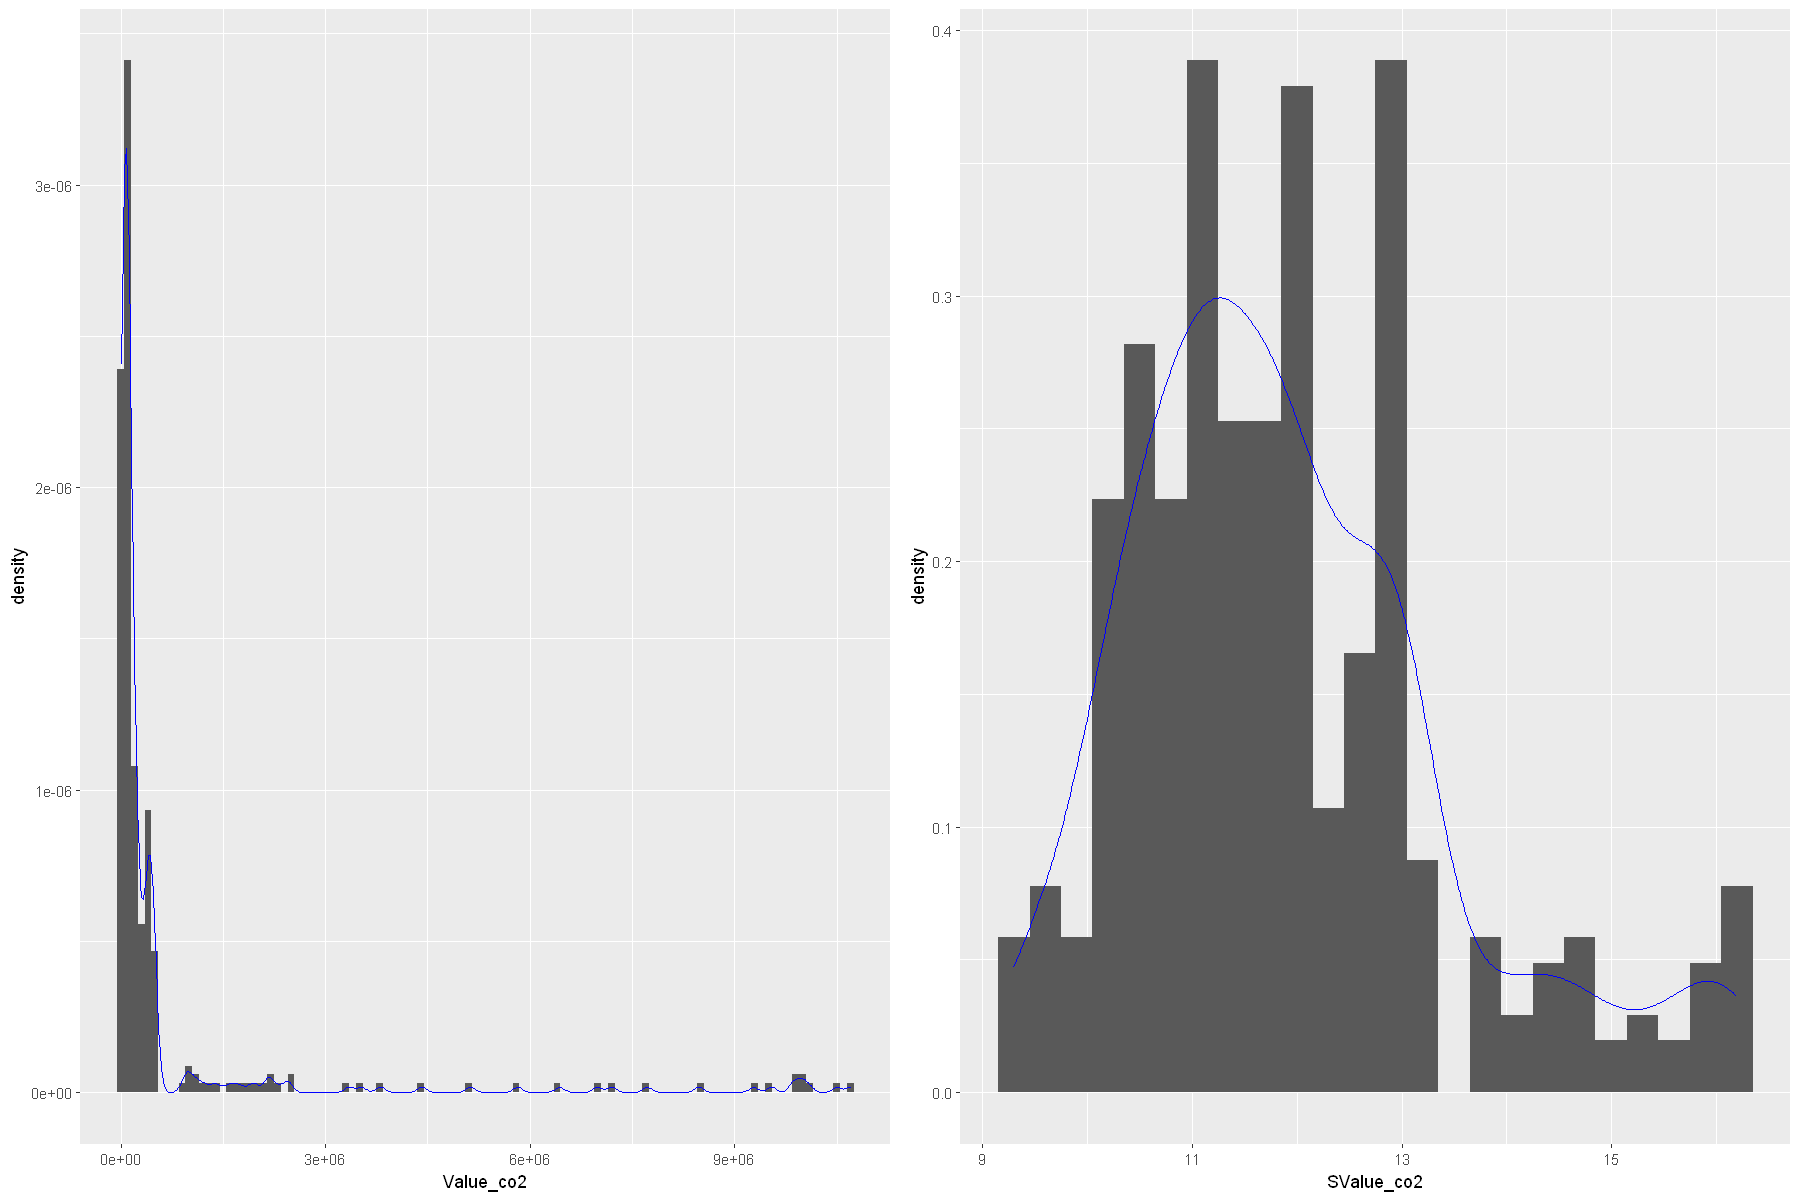

In [33]:
complete_energy[, "SValue_co2"] = log(complete_energy[, "Value_co2"])

g1 = ggplot(complete_energy,aes(x=Value_co2))+ geom_histogram(aes(y=..density..),binwidth = 100000)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SValue_co2))+ geom_histogram(aes(y=..density..),binwidth = 0.3)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

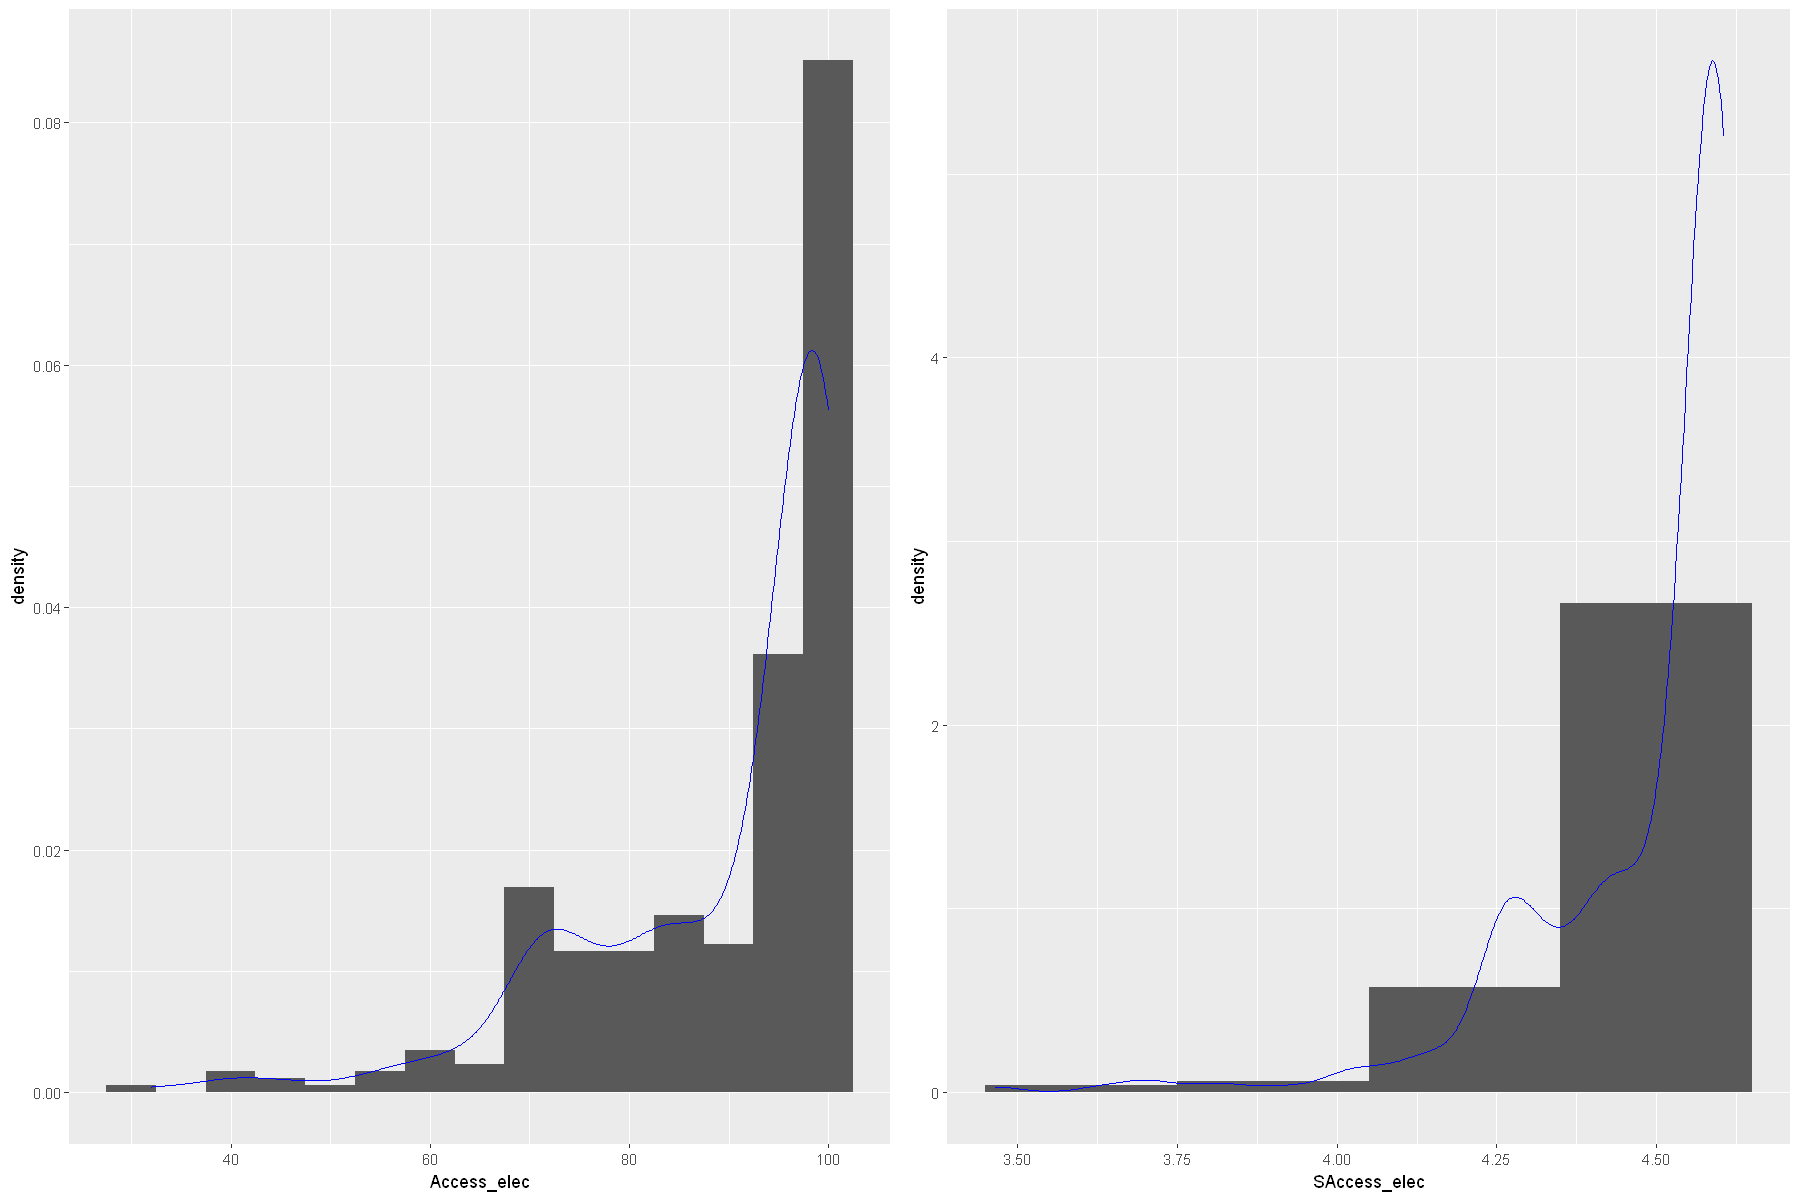

In [34]:
complete_energy[, "SAccess_elec"] = log(complete_energy[, "Access_elec"])

g1 = ggplot(complete_energy,aes(x=Access_elec))+ geom_histogram(aes(y=..density..),binwidth = 5)+geom_density(alpha=.1,col="blue") 
g2 = ggplot(complete_energy,aes(x=SAccess_elec))+ geom_histogram(aes(y=..density..),binwidth =0.3)+geom_density(alpha=.1, col="blue") 

grid.arrange(g1,g2,ncol=2)

#Pourquoi deux fois ? 

In [35]:
#for (i in 3:length(names(complete_energy))) {

#complete_energy[, "SAccess.to.electricity....of.population."] = log(complete_energy[, "Access.to.electricity....of.population."])

#g1 = ggplot(complete_energy,aes(x=Access.to.electricity....of.population.))+ geom_histogram(aes(y=..density..),binwidth = 5)+geom_density(alpha=.1,col="blue") 
#g2 = ggplot(complete_energy,aes(x=SAccess.to.electricity....of.population.))+ geom_histogram(aes(y=..density..),binwidth = 0.2)+geom_density(alpha=.1, col="blue") 

#grid.arrange(g1,g2,ncol=2)
    
#}

In [36]:
#summary(complete_energy)

In [37]:
complete_energy_boxplot = complete_energy[-c(3,4,5,6,7,8,9,10,11,14,15,16)]

In [38]:
summary(complete_energy_boxplot)

    Entity               Year     Primary_energy  Energy_intensity
 Length:343         2016   : 20   Min.   : 1054   Min.   : 1.760  
 Class :character   2017   : 20   1st Qu.: 4878   1st Qu.: 3.140  
 Mode  :character   2009   : 19   Median :11114   Median : 3.880  
                    2014   : 19   Mean   :12702   Mean   : 4.863  
                    2015   : 19   3rd Qu.:18052   3rd Qu.: 5.220  
                    2010   : 18   Max.   :59850   Max.   :23.290  
                    (Other):228                                   
   gdp_capita         Density         Land_area          Latitude      
 Min.   :  413.1   Min.   :  13.0   Min.   :  65610   Min.   :-38.416  
 1st Qu.: 1736.6   1st Qu.:  46.0   1st Qu.: 300000   1st Qu.: -1.831  
 Median : 3610.3   Median :  83.0   Median : 796095   Median : 20.594  
 Mean   : 4408.8   Mean   : 201.6   Mean   :2001966   Mean   : 12.150  
 3rd Qu.: 6530.9   3rd Qu.: 287.0   3rd Qu.:2381741   3rd Qu.: 30.375  
 Max.   :14613.0   Max.   :1265.

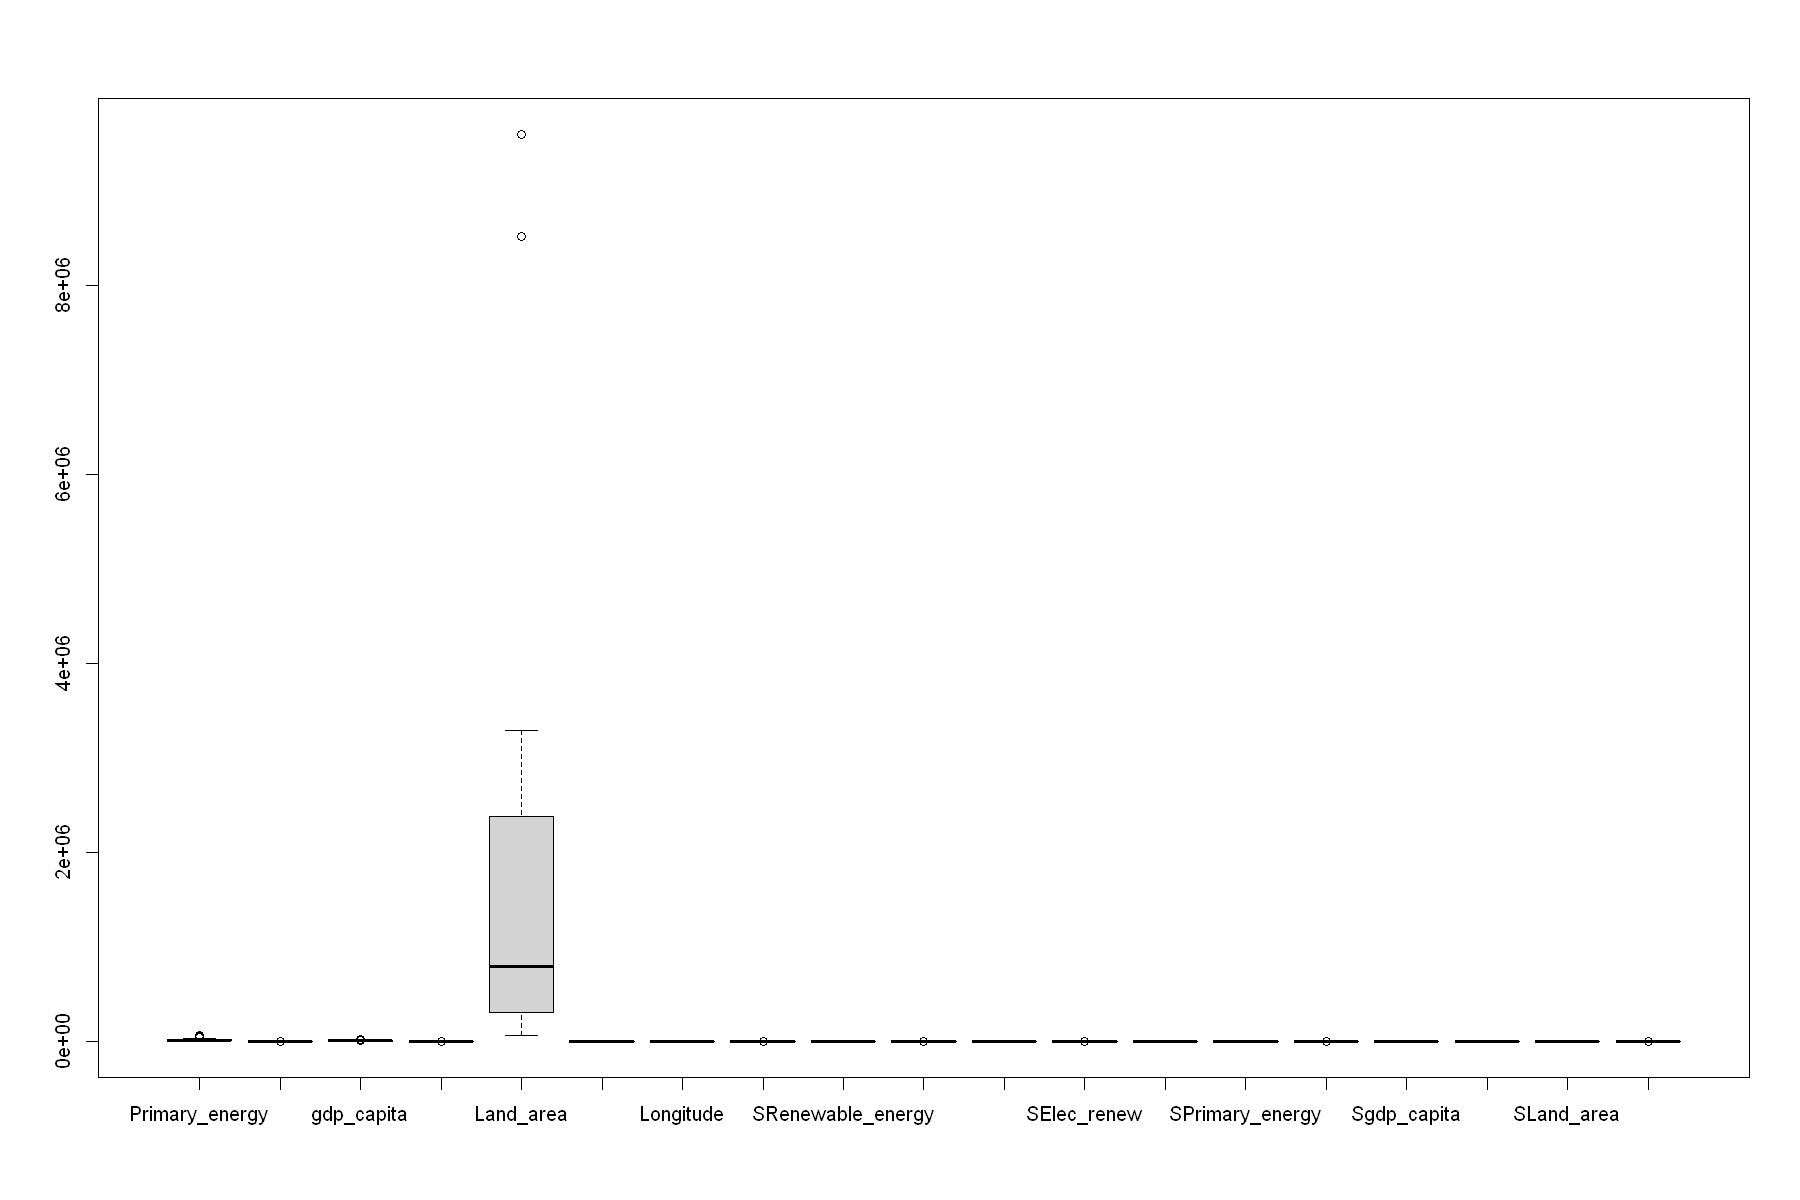

In [39]:
boxplot(complete_energy_boxplot[,-c(1,2)])

On affiche toutes les variables, mais comme elles n'ont pas la même échelle, c'est difficile à interpréter.

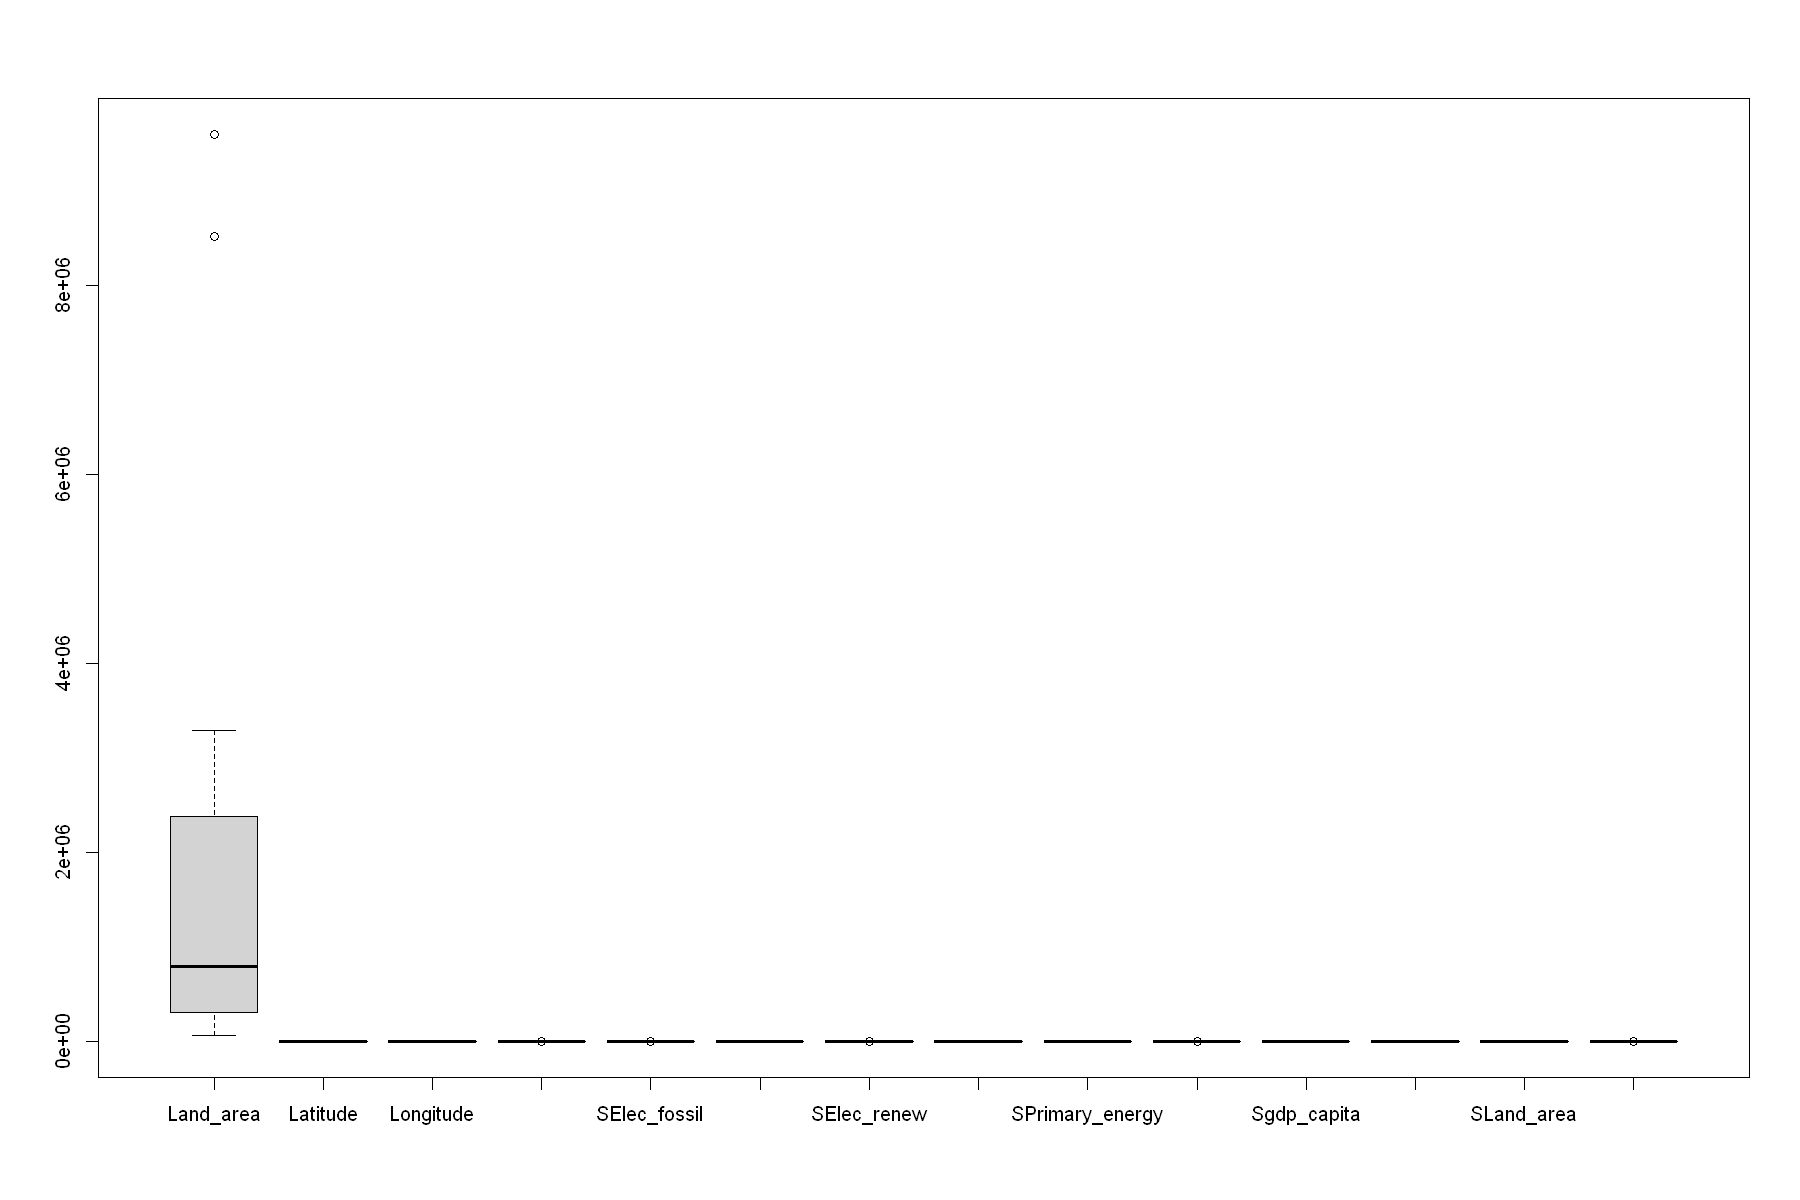

In [40]:
boxplot(complete_energy_boxplot[,-c(1:6,11)])

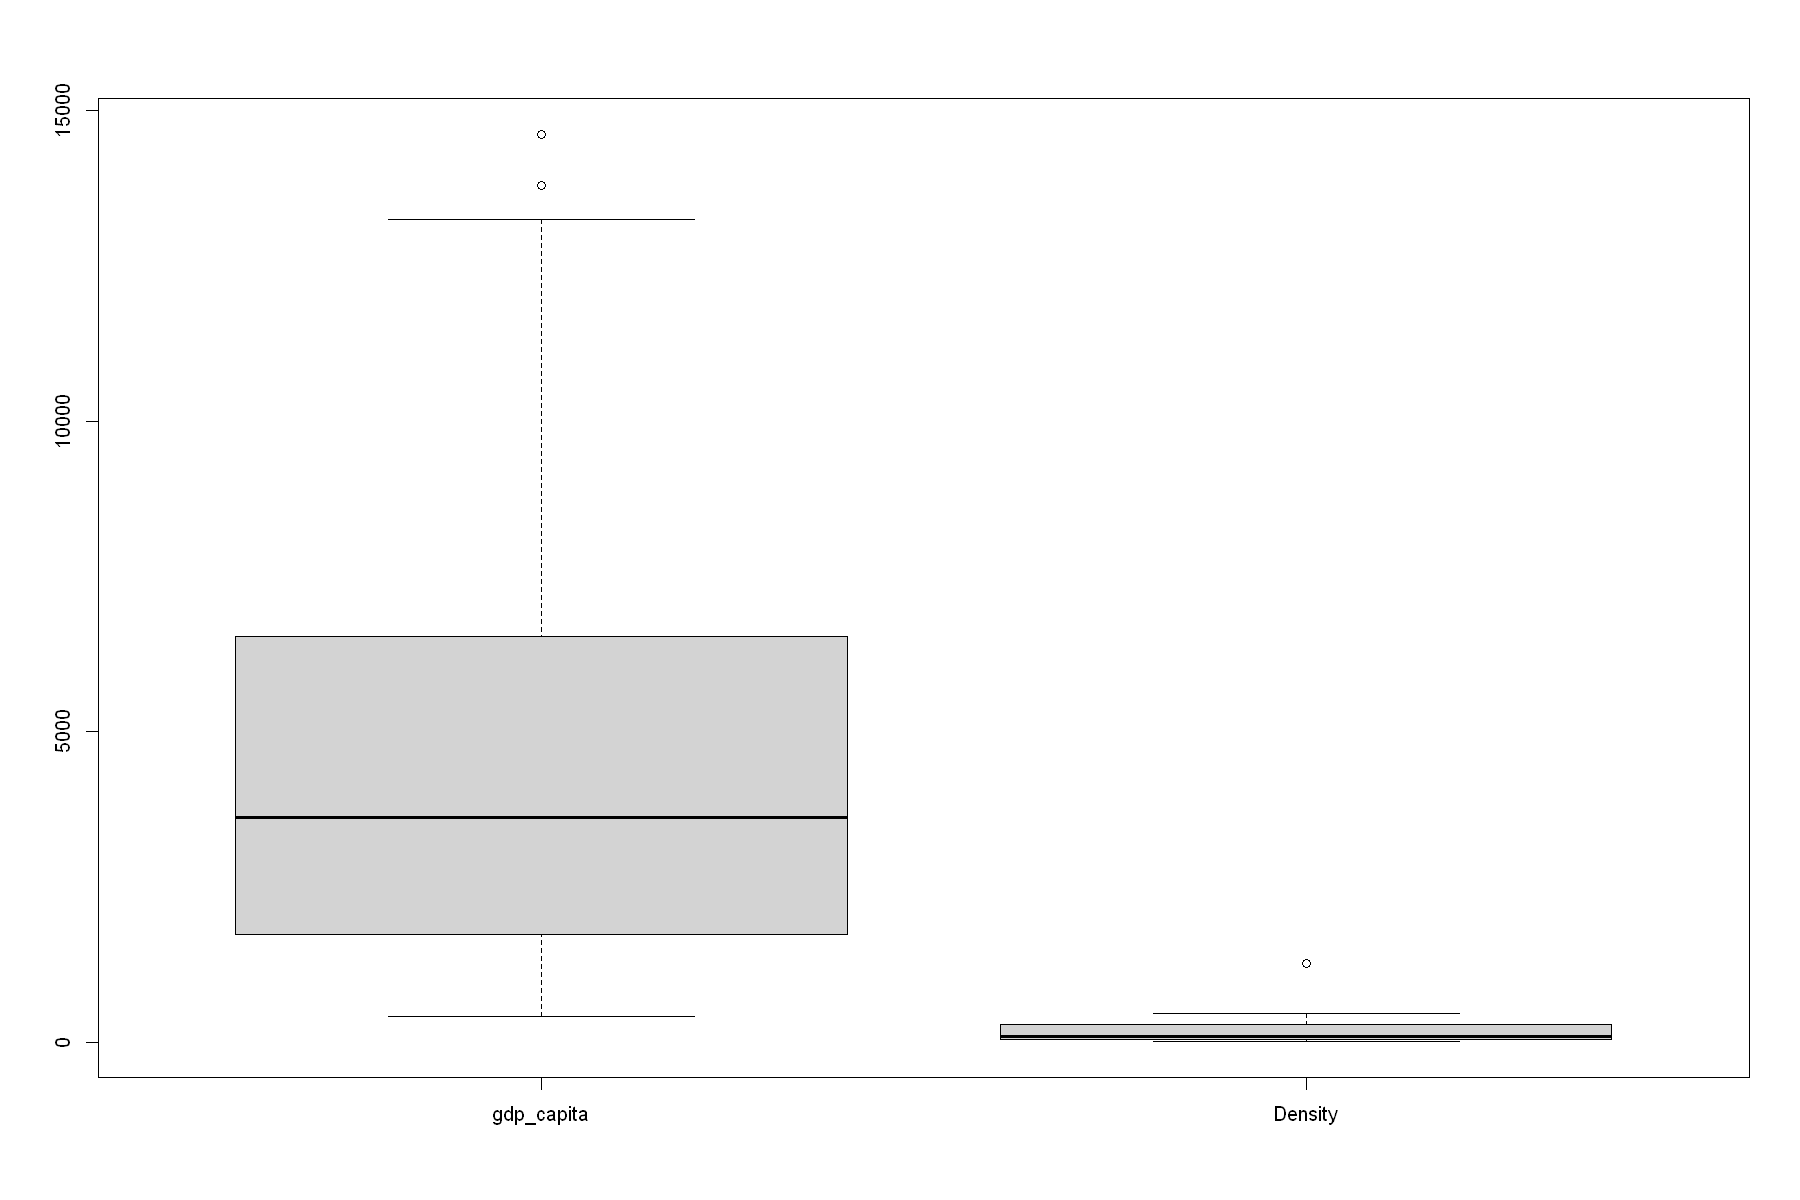

In [41]:
boxplot(complete_energy_boxplot[,c(5:6)])

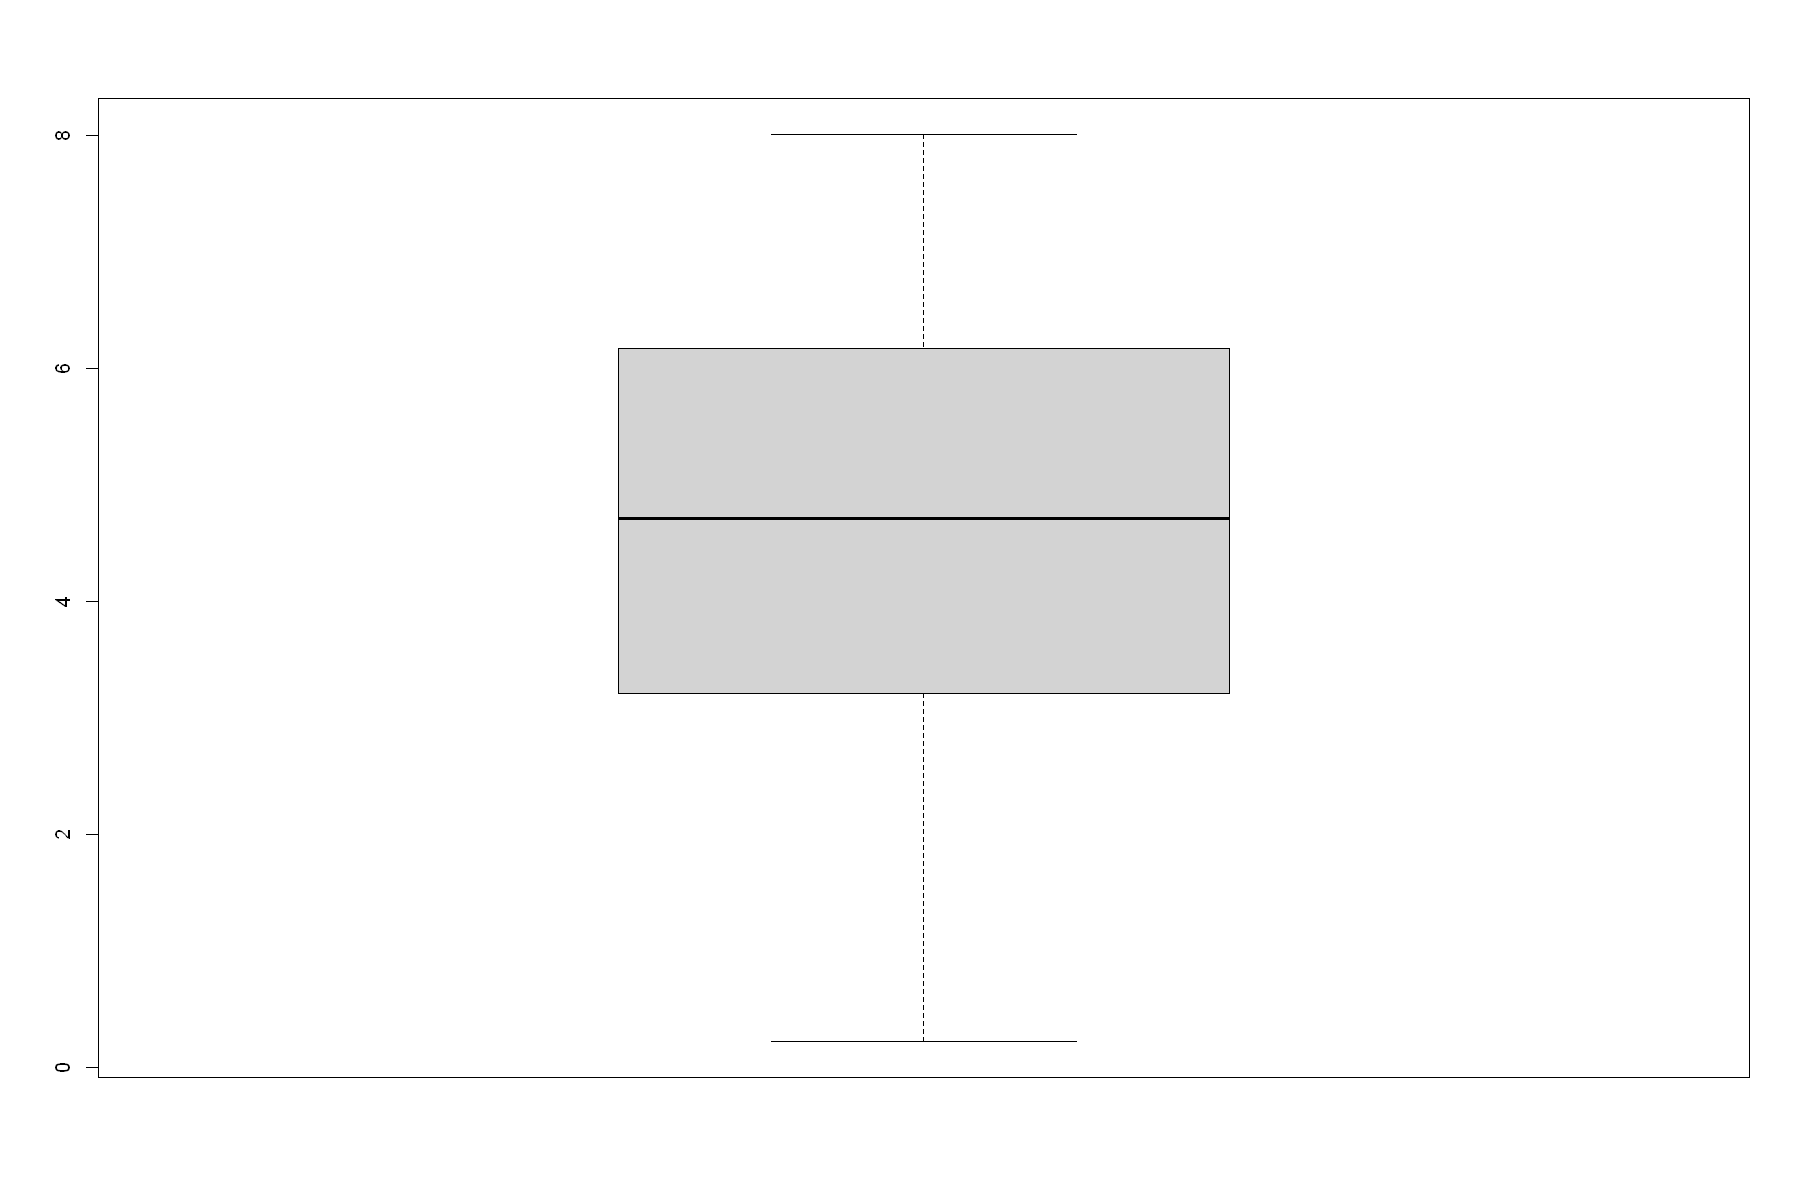

In [42]:
boxplot(complete_energy_boxplot[,c(11)]) #nuclear

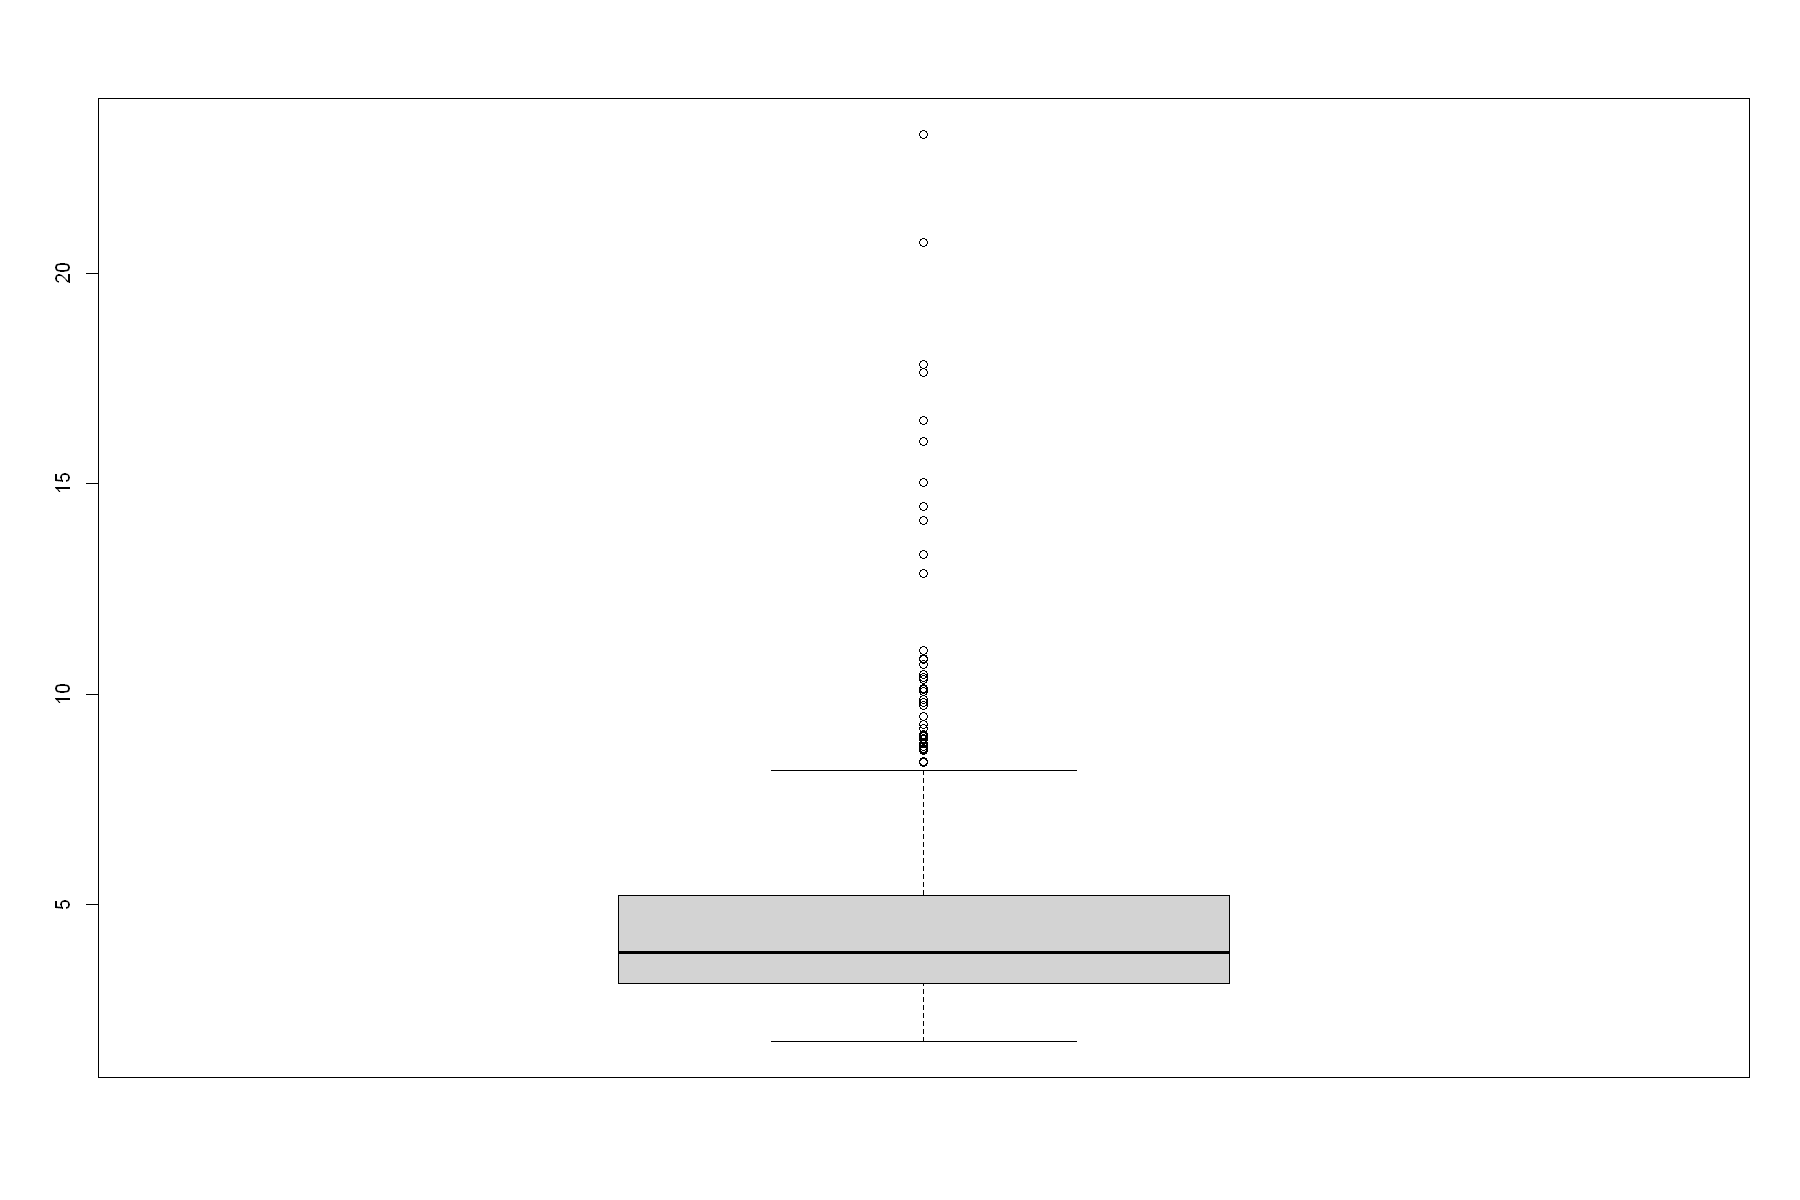

In [43]:
boxplot(complete_energy_boxplot[,c(4)]) #gdp growth

On ne regarde à présent que les variables transformée. L'échelle est meilleure

## Question 5

### Hétérogénéité d'émission de CO2 de pays

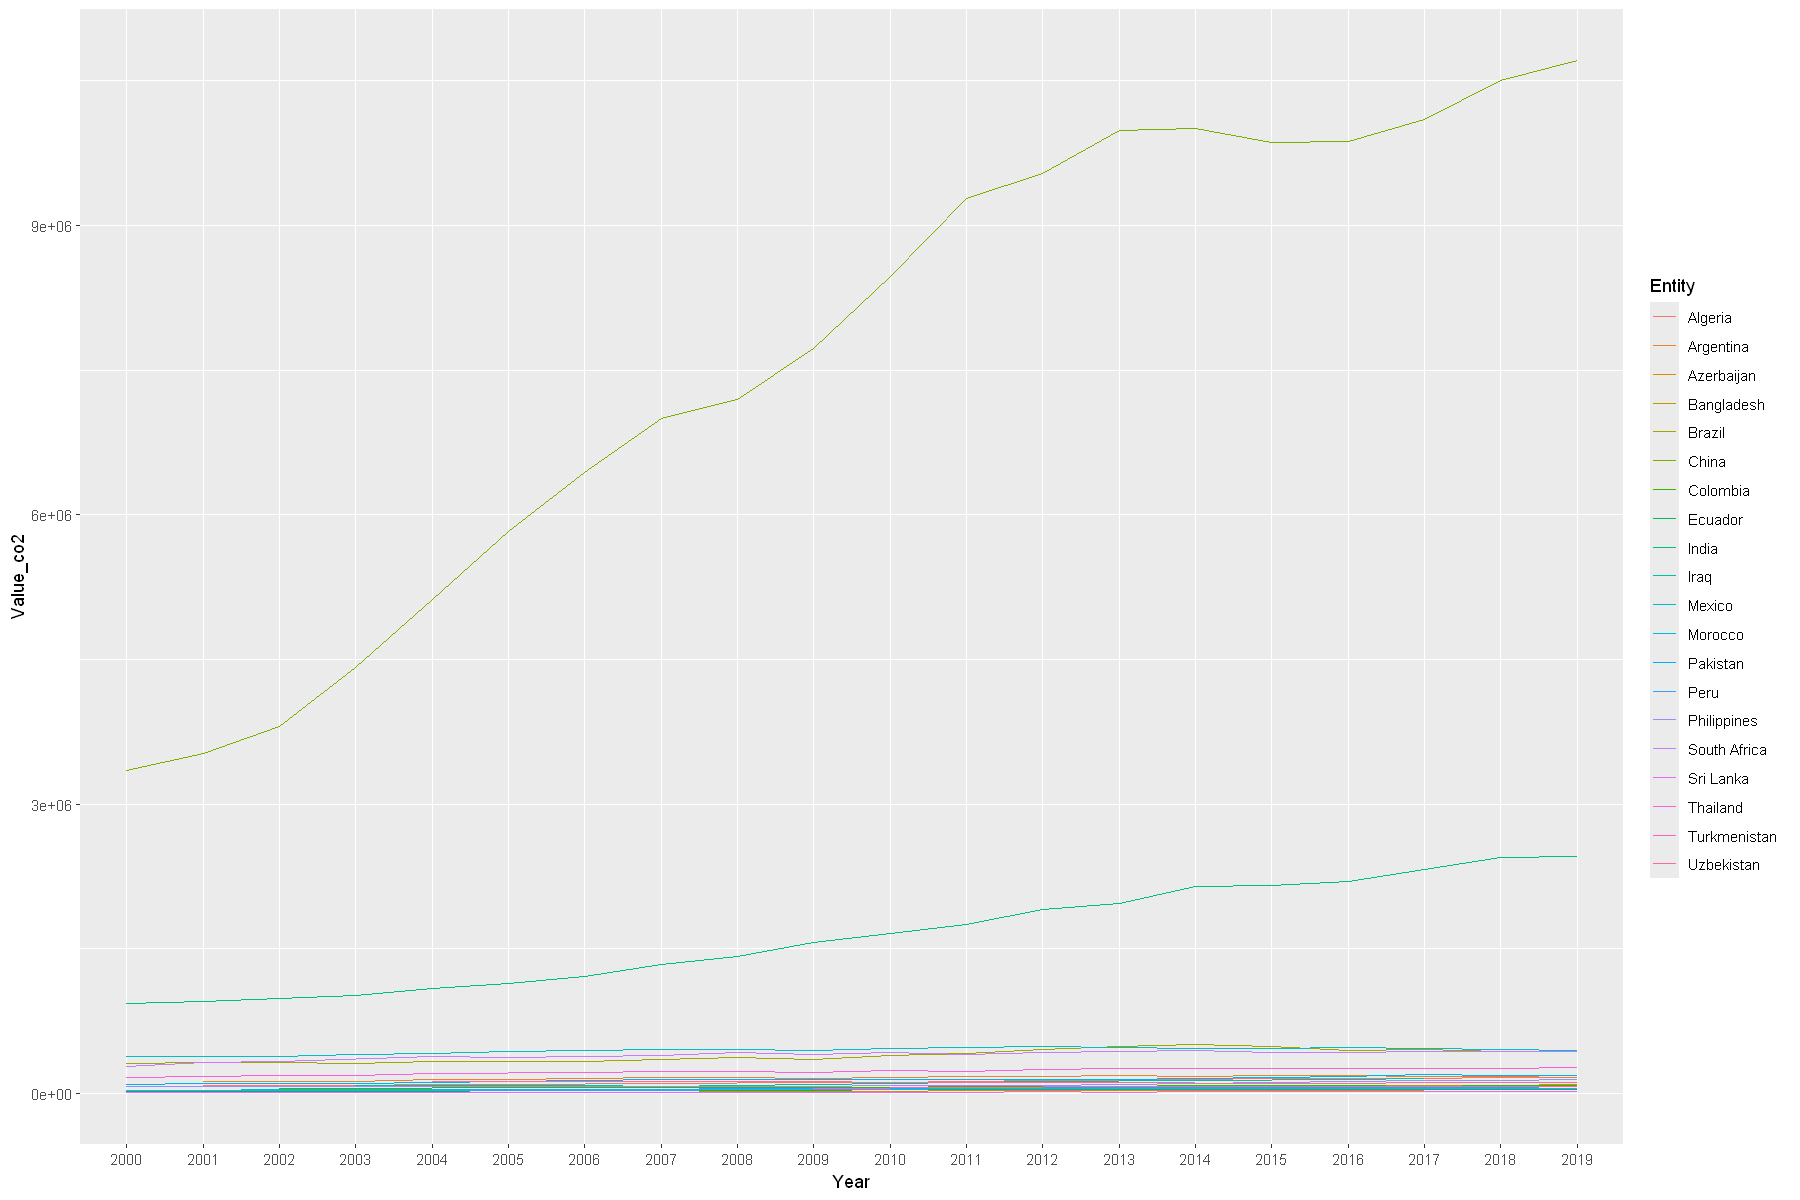

In [44]:
ggplot(complete_energy) + 
  aes(x = Year, y = Value_co2, color = Entity, group = Entity) + 
  geom_line() + 
  theme(legend.position = "right")


In [45]:
paste('ecart type')
sd(complete_energy$Value_co2)
paste('moyenne :')
mean(complete_energy$Value_co2)
paste('min')
min(complete_energy$Value_co2)
paste('max')
max(complete_energy$Value_co2)

[1] "ecart type"

[1] 1877645

[1] "moyenne :"

[1] 675341.2

[1] "min"

[1] 10850

[1] "max"

[1] 10707220

Ici nous pouvons observer que l'écart type de la variable Value CO2 est très grande, ce qui témoigne d'une hétérogéneité des valeurs par rapport à la répartition moyenne. De plus le graphique que les 5 pays ayant une emission de CO2 la plus importante sont :

### Les pays les plus émetteurs de CO2

,Entity,Value_co2
,<chr>,<dbl>
6,China,7636642.5
9,India,1633979.0
11,Mexico,444619.5
16,South Africa,400407.4
5,Brazil,392988.5
18,Thailand,229528.4


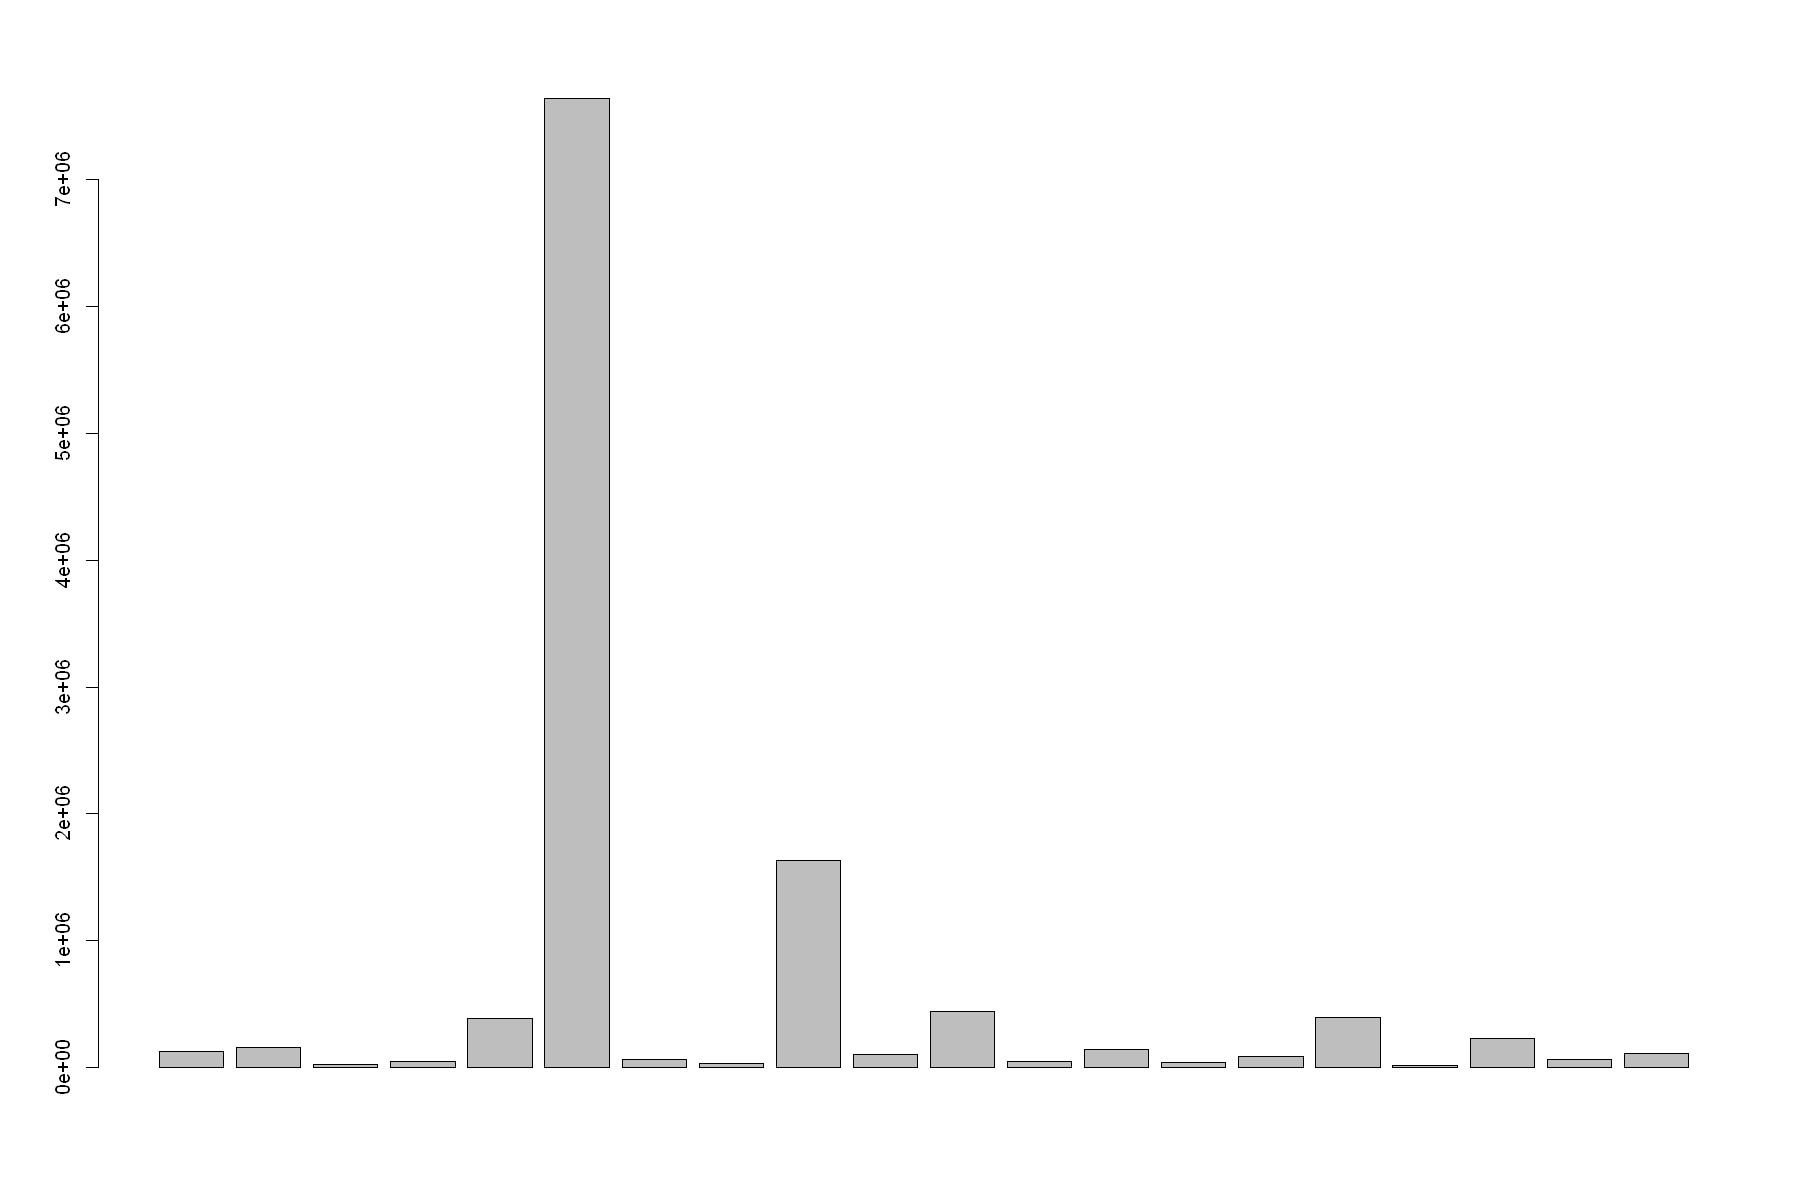

In [46]:
Moy = aggregate(data=complete_energy,Value_co2~Entity,FUN=mean)
index = order(Moy$Value_co2, decreasing = TRUE )
Moy_classe = Moy[index,]
head(Moy_classe)
barplot(Moy[,2])

Grace à ce tableau, nous pouvons observer l'emission moyenne de CO2 emise par pays ( triée par ordre décroissant ).
Ainsi, nous pouvons donc observer que les 5 pays les plus émetteurs sont : Chine / Etats-Unis / Inde / Japon / Allemagne

## Question 6 

### Analyse descriptive multidimensionnelle

#### Variable quantitative

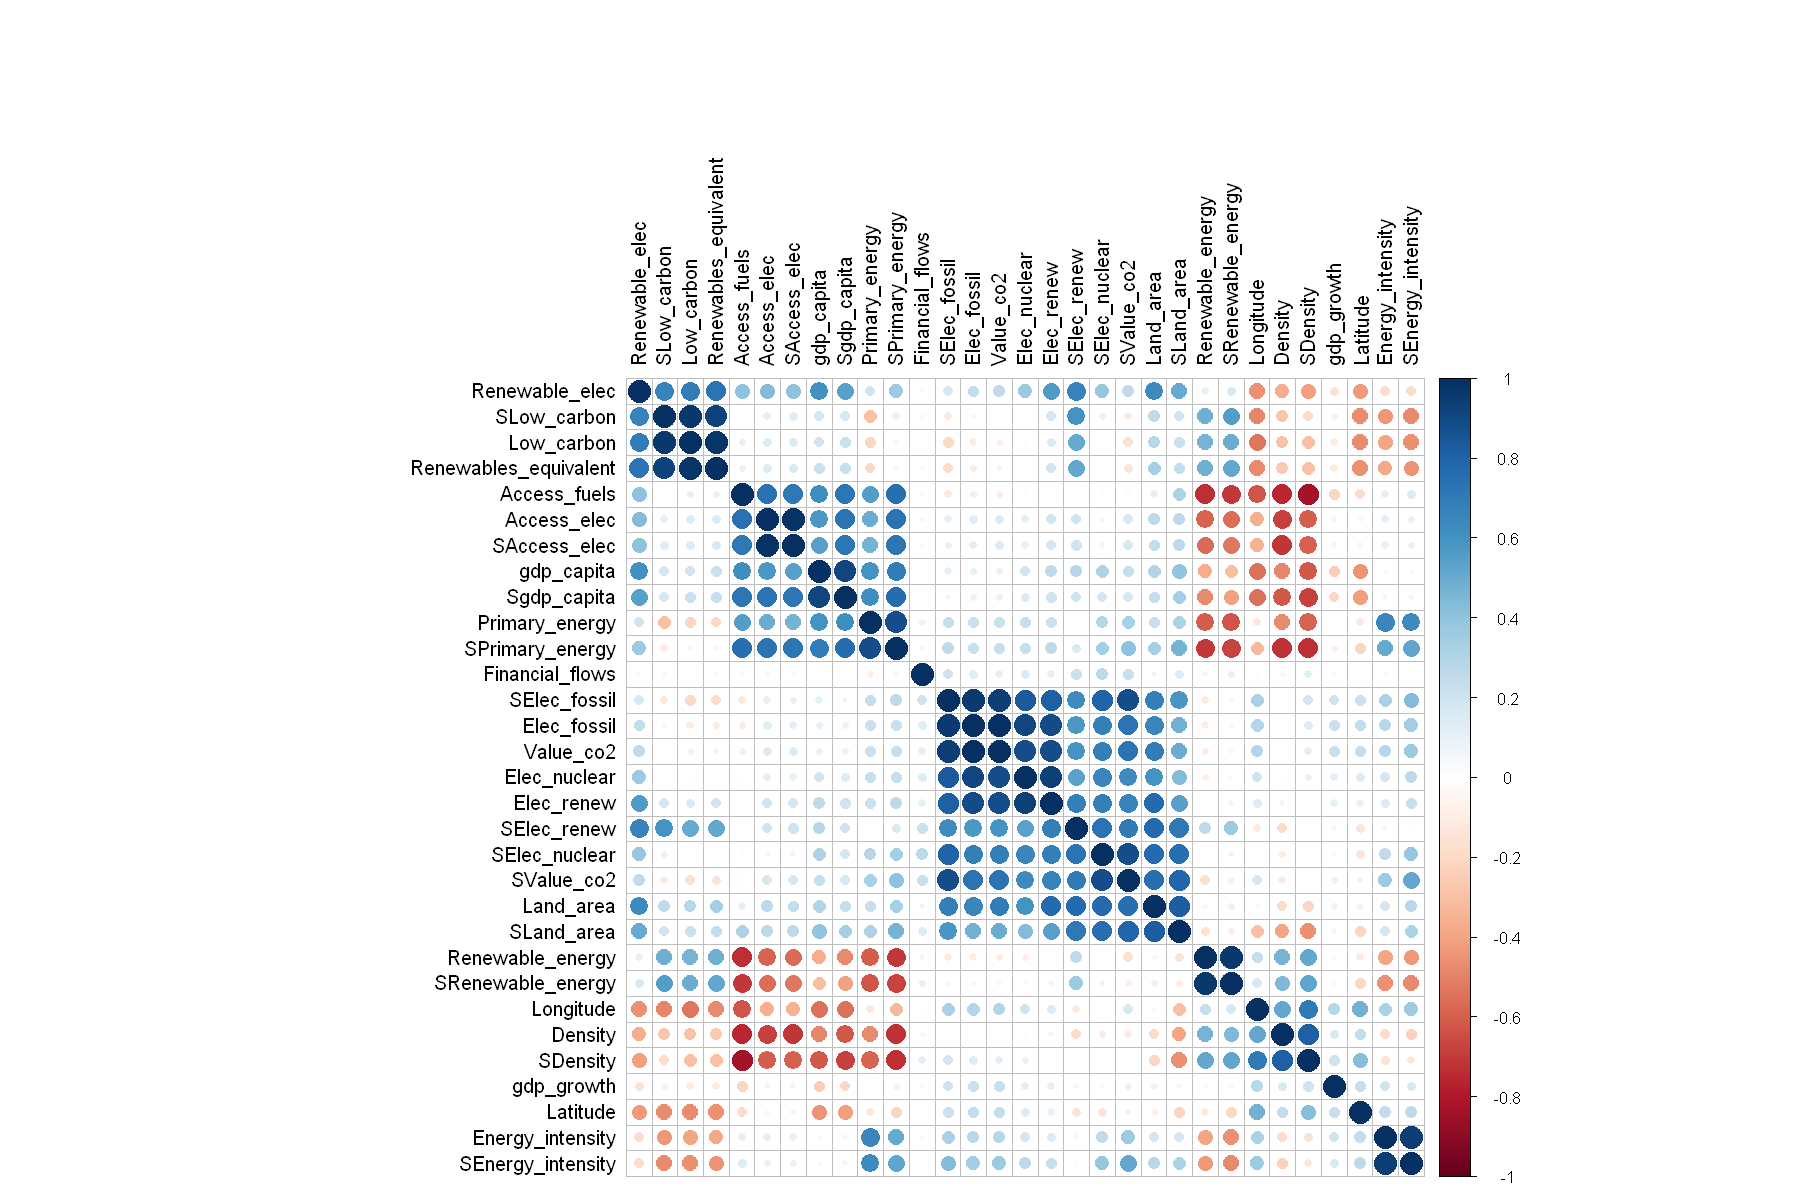

In [47]:
numeric_energy =complete_energy[sapply(complete_energy, is.numeric)]
mcor <- cor(numeric_energy)
par(mfrow=c(1,1), mar=c(5,5,2,2))
corrplot(mcor, order="hclust", tl.col="black")

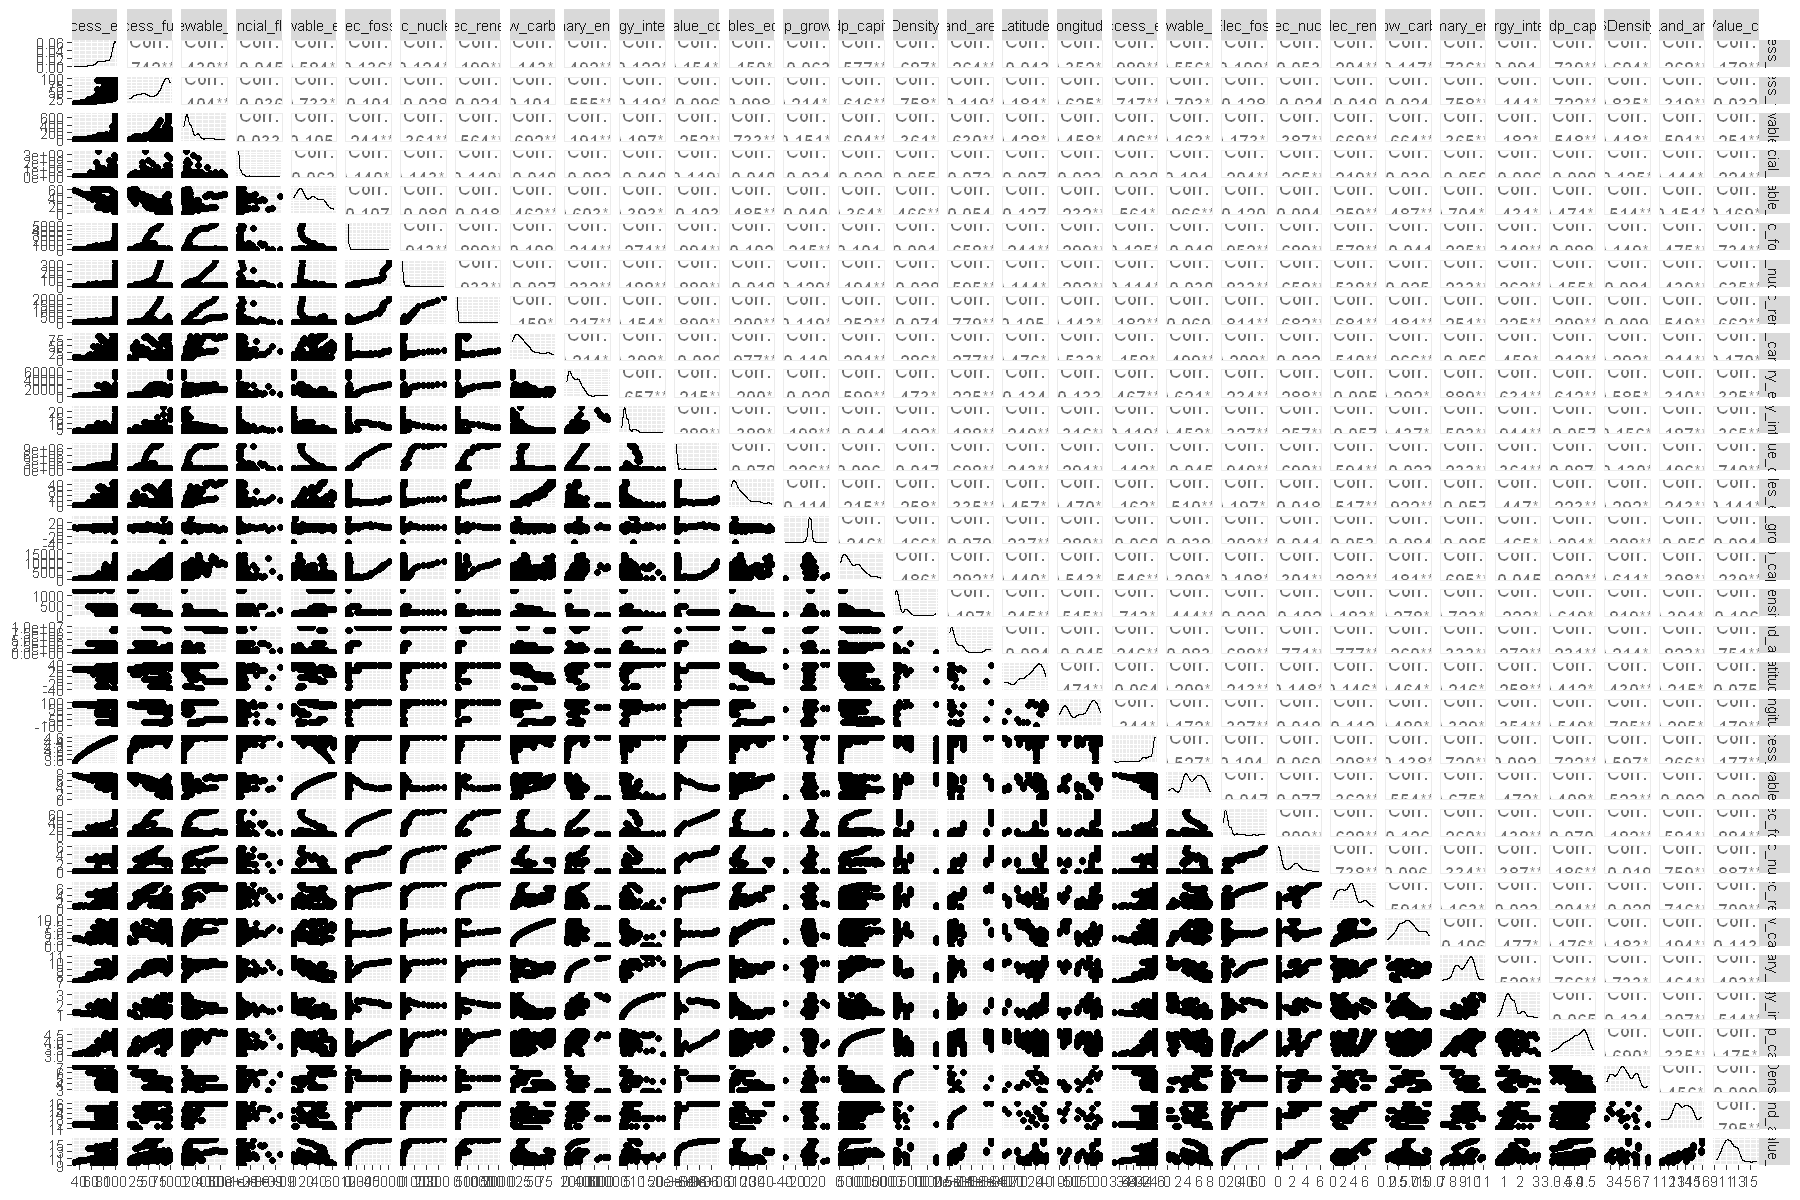

In [48]:
ggpairs(numeric_energy)

In [49]:
#par(mfrow = c(6,3) , mar = c(4,4,2,1))

#for (i in 3:length(names(complete_energy))) {
 #   dfi = complete_energy[,c(2,i)]
   # plot(dfi, main=names(complete_energy)[i],xlab='Values')
#}

#### Variable qualitative

Pour cette étude, nous avons essayé plusieurs techniques pour visualiser nos données. Cependant nous avons pu remarquer que le nombre d'observations par pays n'est pas identique en fonction des années, ce qui ne rend pas forcément fiable nos exploitations.En effet, nous avons également essayé d'afficher des boxplots de l'ensemble des variables en fonction de Year, mais ce n'était pas très pertinent.   

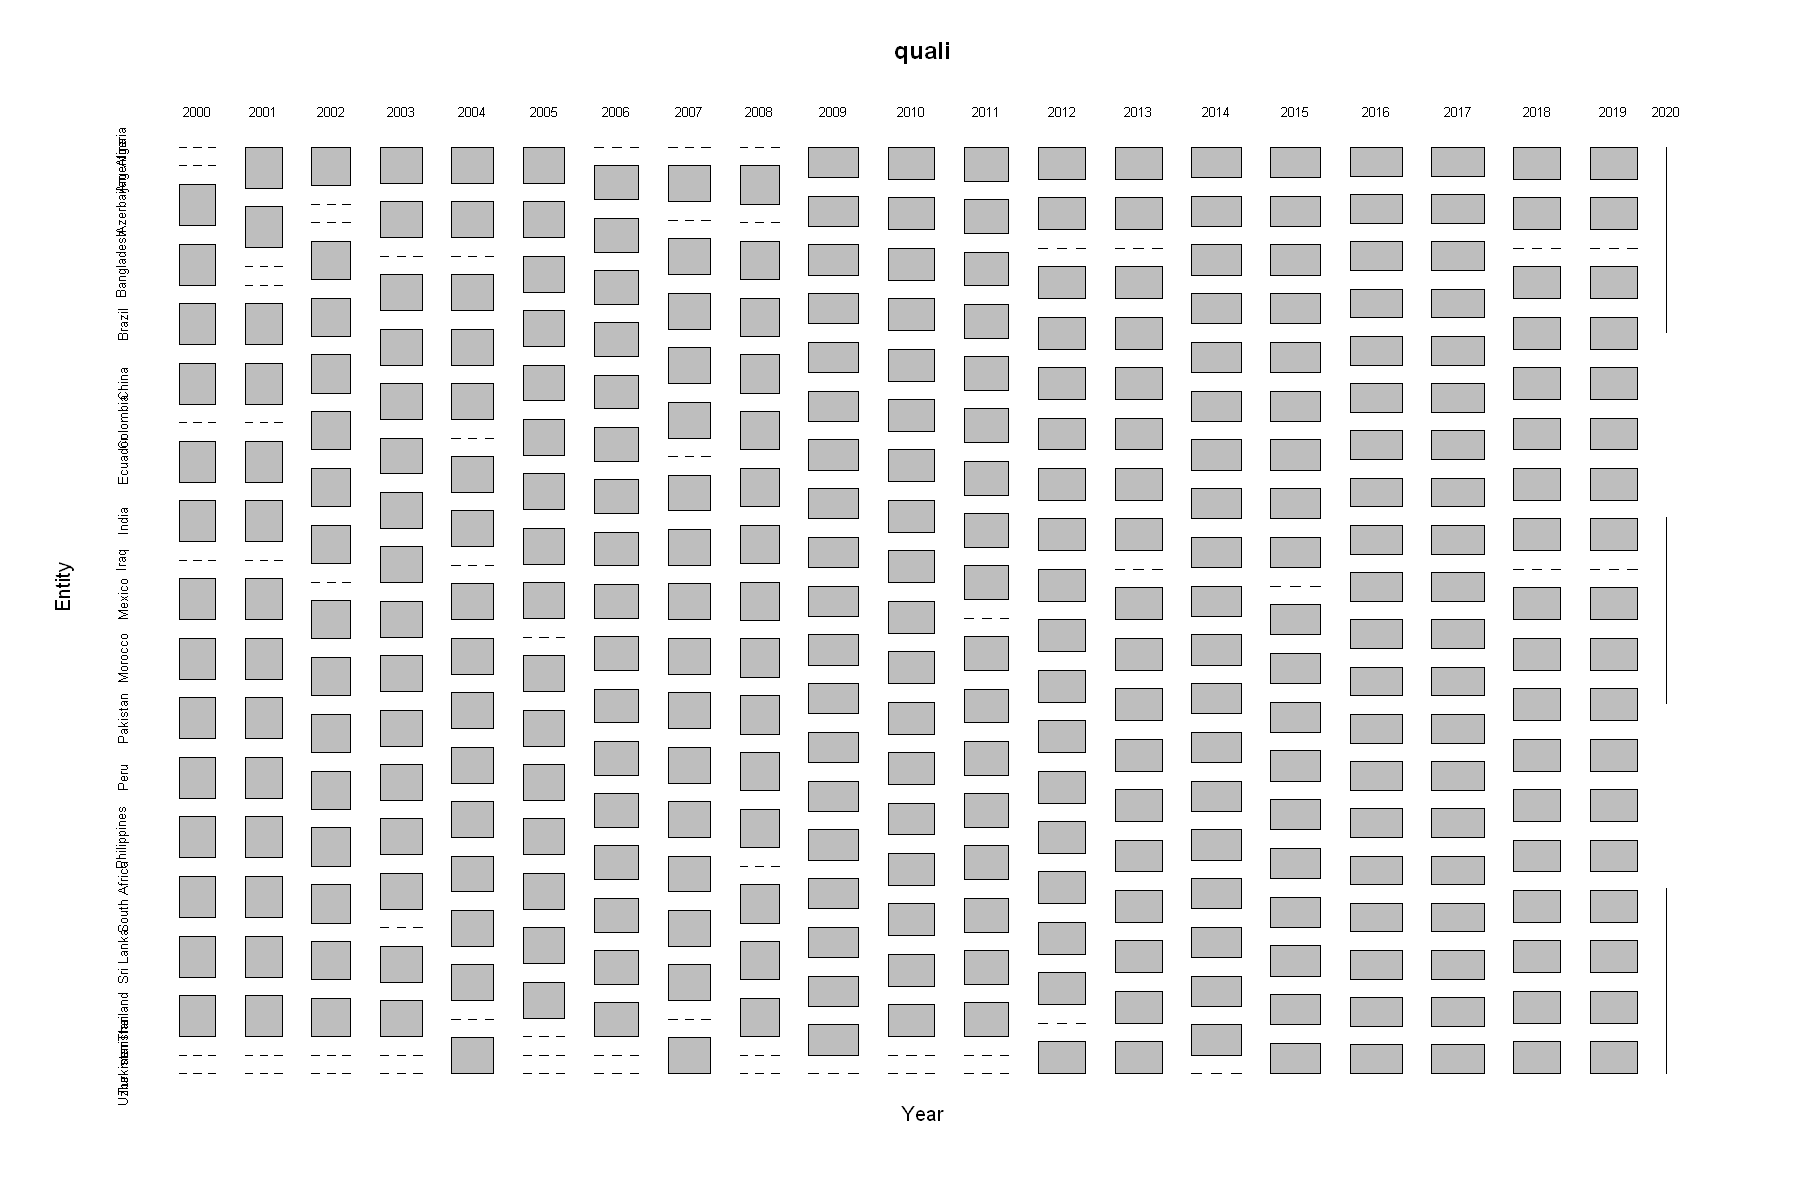

In [50]:
quali= xtabs(~Year + Entity, data = complete_energy)
mosaicplot(quali)

## Question 8

### Dépendance entre Year et la variable à prédire

In [51]:
numeric_energy =complete_energy[sapply(complete_energy, is.numeric)]
mcor <- cor(numeric_energy)
mcor

,Access_elec,Access_fuels,Renewable_elec,Financial_flows,Renewable_energy,Elec_fossil,Elec_nuclear,Elec_renew,Low_carbon,Primary_energy,⋯,SElec_fossil,SElec_nuclear,SElec_renew,SLow_carbon,SPrimary_energy,SEnergy_intensity,Sgdp_capita,SDensity,SLand_area,SValue_co2
Access_elec,1.00000000,0.74201161,0.43049175,-0.044689806,-0.58359051,0.136261499,0.12398528,0.199076050,0.14284952,0.492282009,⋯,0.10891951,0.05310596,0.203821595,0.11697469,0.73610408,0.090923527,0.739277305,-0.603888655,0.26828960,0.177588068
Access_fuels,0.74201161,1.00000000,0.40444477,-0.036288652,-0.73326943,-0.100554856,-0.02751658,0.020955110,0.10068727,0.555417339,⋯,-0.12822468,-0.02442477,-0.018887220,0.02418976,0.75768636,0.141313291,0.722000329,-0.835334472,0.31942982,0.031834016
Renewable_elec,0.43049175,0.40444477,1.00000000,0.032910406,0.10525128,0.241219809,0.36113820,0.564401161,0.69196584,0.191122284,⋯,0.17256536,0.38707930,0.669480296,0.66359523,0.36471703,-0.182454016,0.547854688,-0.418325255,0.50102583,0.250645607
Financial_flows,-0.04468981,-0.03628865,0.03291041,1.000000000,0.06333905,0.139874083,0.14265121,0.110130154,-0.01919683,-0.083069915,⋯,0.20364526,0.26544697,0.219471654,0.03913481,-0.05869131,-0.005585736,-0.008851936,0.125238258,0.14386062,0.223831514
Renewable_energy,-0.58359051,-0.73326943,0.10525128,0.063339052,1.00000000,-0.107157392,-0.08032201,0.018430262,0.46157453,-0.602714170,⋯,-0.11952571,0.00425654,0.259289913,0.48706911,-0.70422336,-0.431178446,-0.470628809,0.513861439,-0.15076949,-0.168909133
Elec_fossil,0.13626150,-0.10055486,0.24121981,0.139874083,-0.10715739,1.000000000,0.91330951,0.898703857,-0.10792982,0.214477646,⋯,0.95154589,0.68905358,0.577780141,-0.04147641,0.22499061,0.347804668,0.088131107,0.149237242,0.47540108,0.733953636
Elec_nuclear,0.12398528,-0.02751658,0.36113820,0.142651210,-0.08032201,0.913309508,1.00000000,0.933321539,-0.02684850,0.232474242,⋯,0.83272061,0.65799731,0.537904387,0.02461972,0.23347342,0.261774617,0.155260603,0.080981869,0.43929868,0.635384399
Elec_renew,0.19907605,0.02095511,0.56440116,0.110130154,0.01843026,0.898703857,0.93332154,1.000000000,0.15915911,0.217485801,⋯,0.81138844,0.68197962,0.681190660,0.18107103,0.25086362,0.224701540,0.209273981,0.009089277,0.54868115,0.662213943
Low_carbon,0.14284952,0.10068727,0.69196584,-0.019196832,0.46157453,-0.107929821,-0.02684850,0.159159107,1.00000000,-0.214044002,⋯,-0.20852656,0.02196690,0.509571748,0.96608972,-0.05887361,-0.459398370,0.211652565,-0.292289897,0.21357392,-0.169923738
Primary_energy,0.49228201,0.55541734,0.19112228,-0.083069915,-0.60271417,0.214477646,0.23247424,0.217485801,-0.21404400,1.000000000,⋯,0.23409552,0.28793305,-0.004593048,-0.29152503,0.88873853,0.630863408,0.612303503,-0.584555529,0.31049898,0.324674706


Ici, nous avons la matrice de corrélation entre toutes les variables de notre energyset. En effet, on peut voir que la corrélation entre la variable Year et Value_co2_emissions_kt_by_country semble faible. Sa valeur faut 0.02055306	

On voit ici que la corrélation entre les variables Year et Value_co2 est très faible. En effet, on obtient un coefficient de corélation proche de 0, ce qui montre que les deux variables ne sont pas coorélées.

In [52]:
correlation_value=cor(as.numeric(complete_energy$Year), complete_energy$Value_co2)
print(correlation_value) # méthode pour avoir le coefficient directement 

[1] 0.07483228


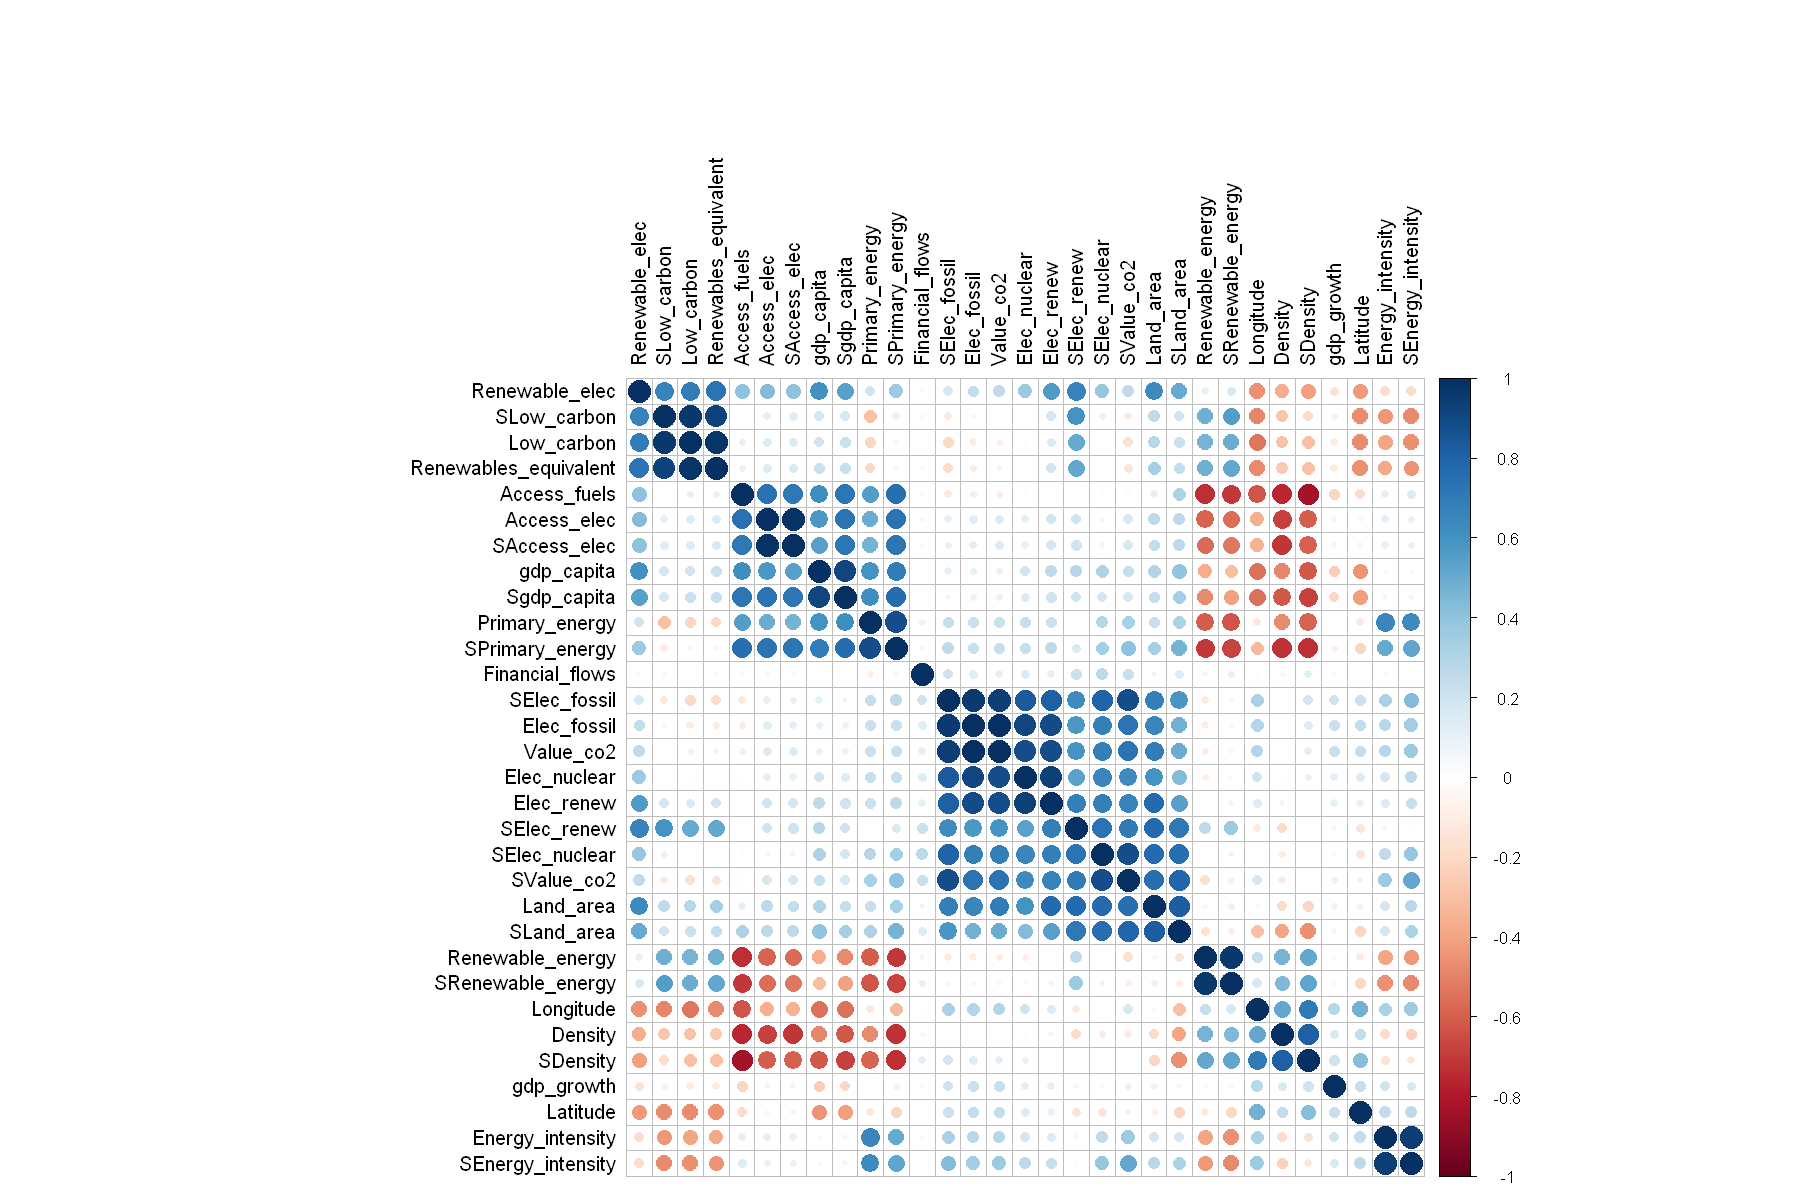

In [53]:
options(corrplot.width = 20, corrplot.height = 20)
corrplot(mcor, order="hclust", tl.col="black")

Ce graphique nous donne la corrélation entre chaque point. En effet, on peut par exemple voir que la variable Value_co2_emissions_kt_by_country est bien corrélée car elle est proche de 1. Au contraire, la longitude n'est pas bine représentée, on peut pas avoir réellement confiance en ses valeurs. 
De plus, si nous comparons les variables Electricity.from.renewables et Value_co2_emissions_kt_by_country, l'angle entre les deux est très faible, ce qui signifie qu'elles sont bien corrélées en elles. A l'inverse, les variables Value_co2_emissions_kt_by_country et Renewable.energy.share.in.the.total.final.energy.consumption ont un angle quasi droit entre elles, ce qui indique qu'elles sont indépendantes.

## Question 7

In [54]:
complete_energy = complete_energy[-c(3)]

### Analyse en composante principale

In [55]:
energy_pca = scale(complete_energy[,-c(1,2)], center = TRUE, scale = TRUE)

In [56]:
resultat_pca = PCA(energy_pca,ncp = 17)
get_eig(resultat_pca)

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,9.3283233692,31.094411231,31.09441
Dim.2,6.7004938218,22.334979406,53.42939
Dim.3,5.9946796572,19.982265524,73.41166
Dim.4,1.4970519885,4.990173295,78.40183
Dim.5,1.3672448016,4.557482672,82.95931
Dim.6,1.0331713584,3.443904528,86.40322
Dim.7,0.8513608134,2.837869378,89.24109
Dim.8,0.7679258838,2.559752946,91.80084
Dim.9,0.5830250995,1.943416998,93.74426
Dim.10,0.4834197715,1.611399238,95.35566


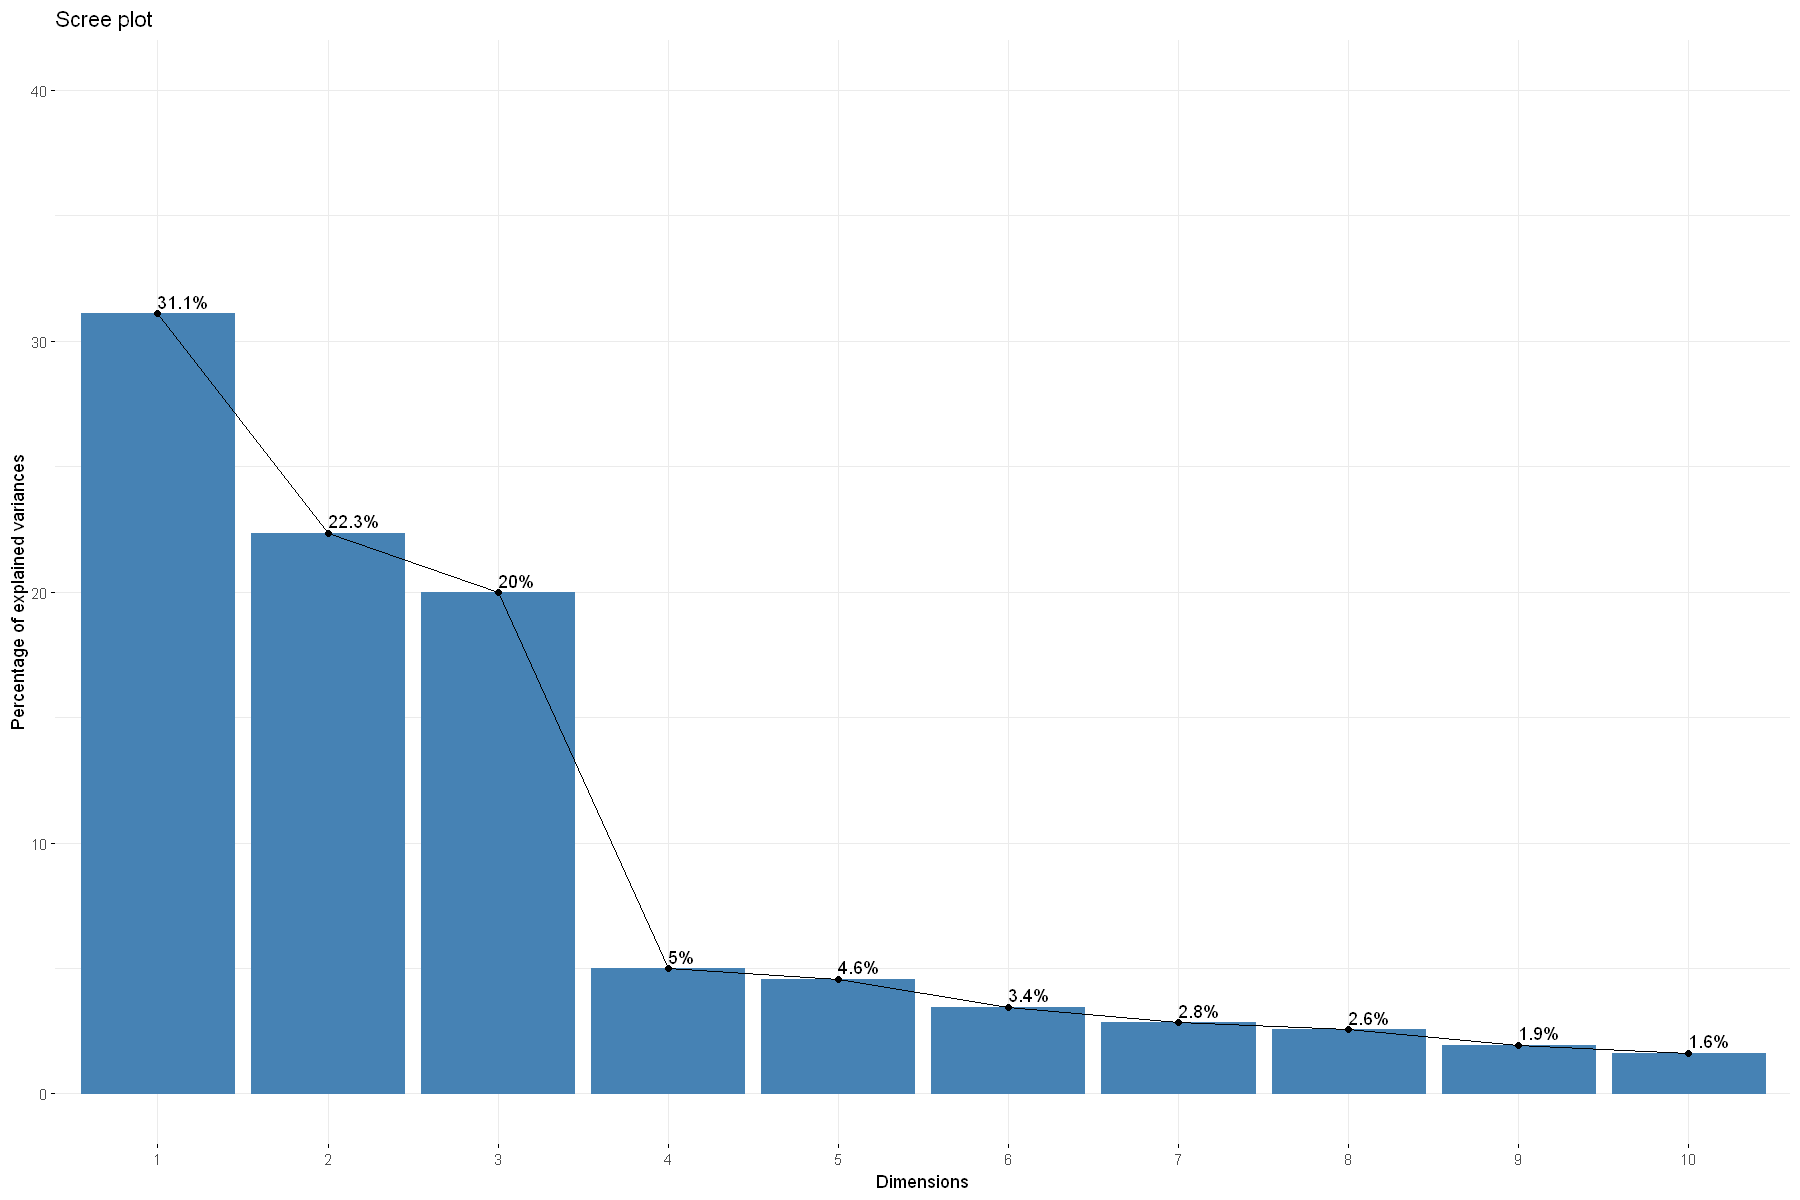

In [57]:
fviz_screeplot(resultat_pca, addlabels=TRUE, ylim=c(0,40))

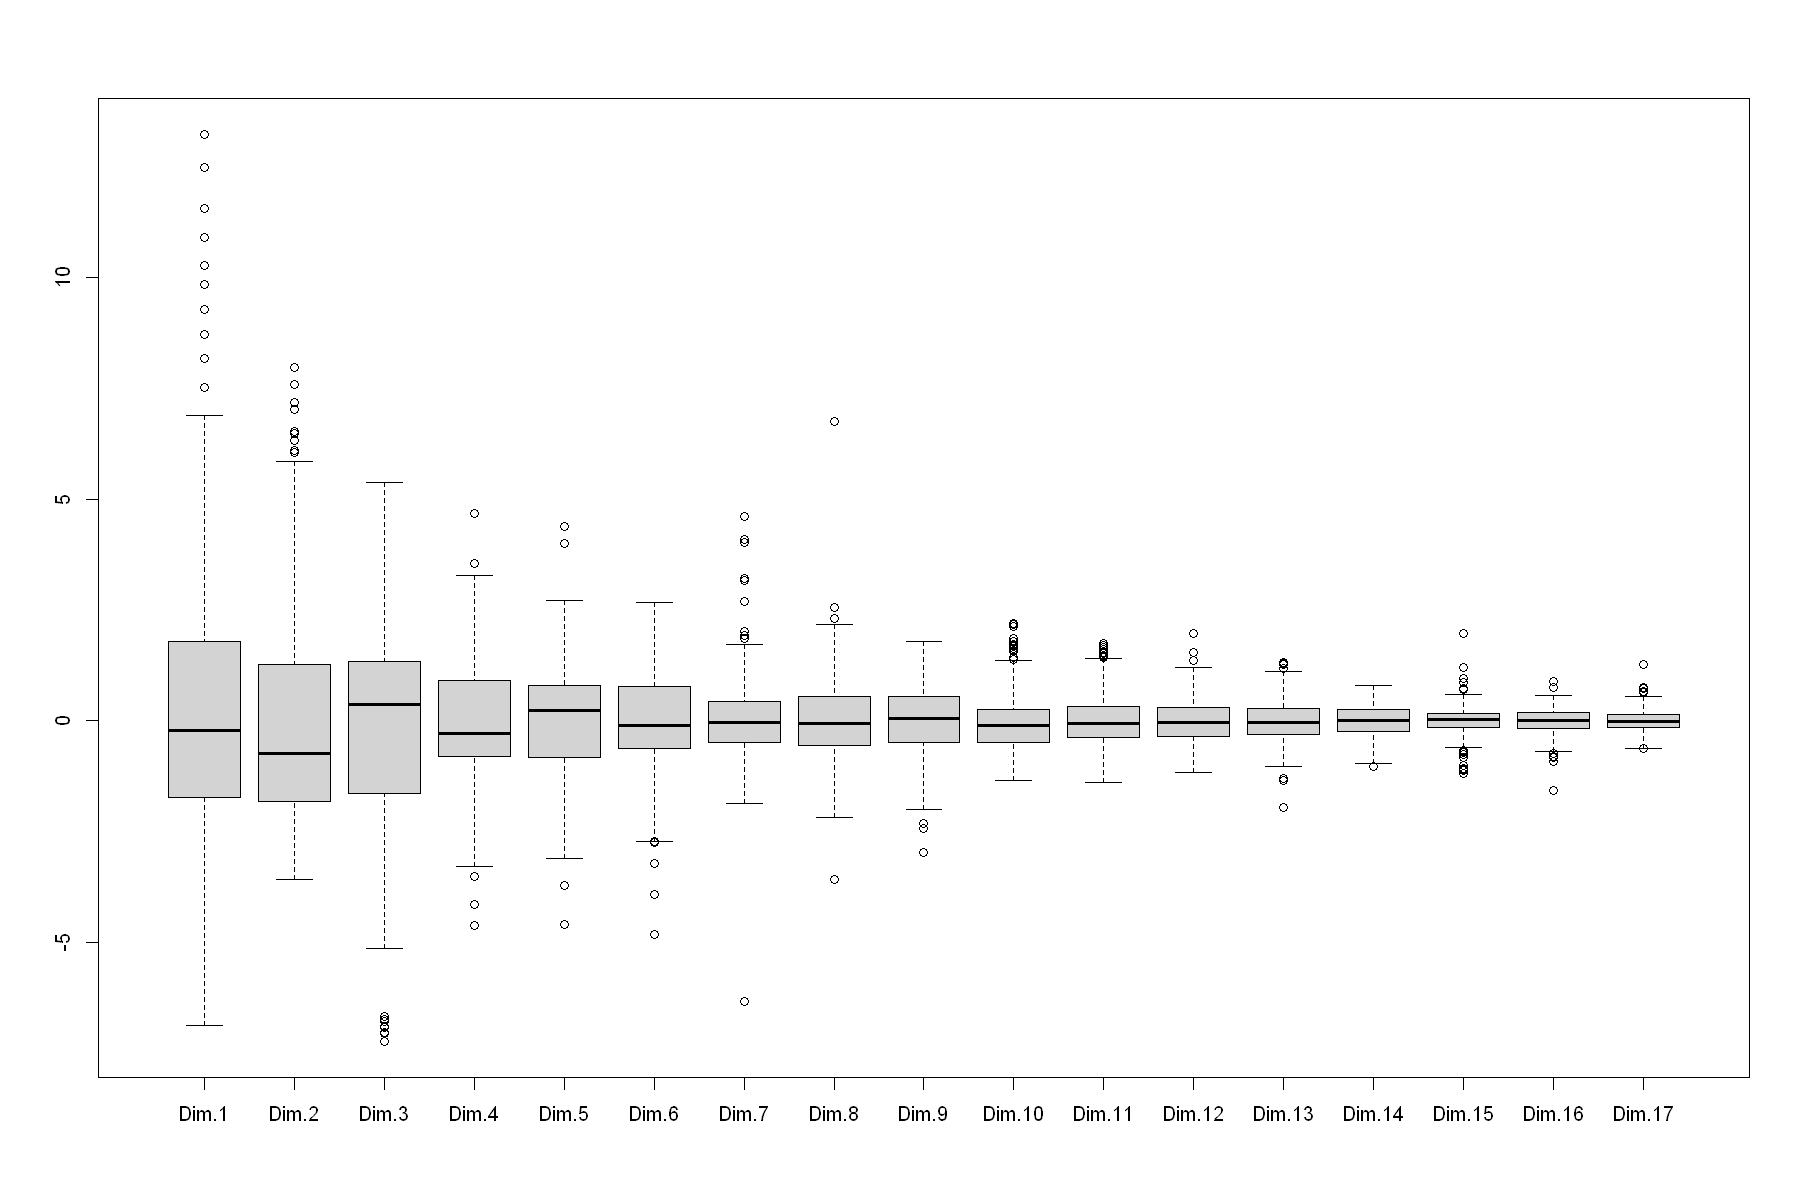

In [58]:
boxplot(resultat_pca$ind$coord)

Nous pouvons en effet voir par cette ACP, que la première composante explique 33.3% des valeurs du energy set.La deuxième composante, elle représente 18.9%. Nous pourrions réduire notre dimension à 2 car avec ces deux-ci, nous expliquons pratiquement la moitié du energy set. Il faudrait ajouter 4 dimensions pour avoir 80% des valeurs expliquées. 

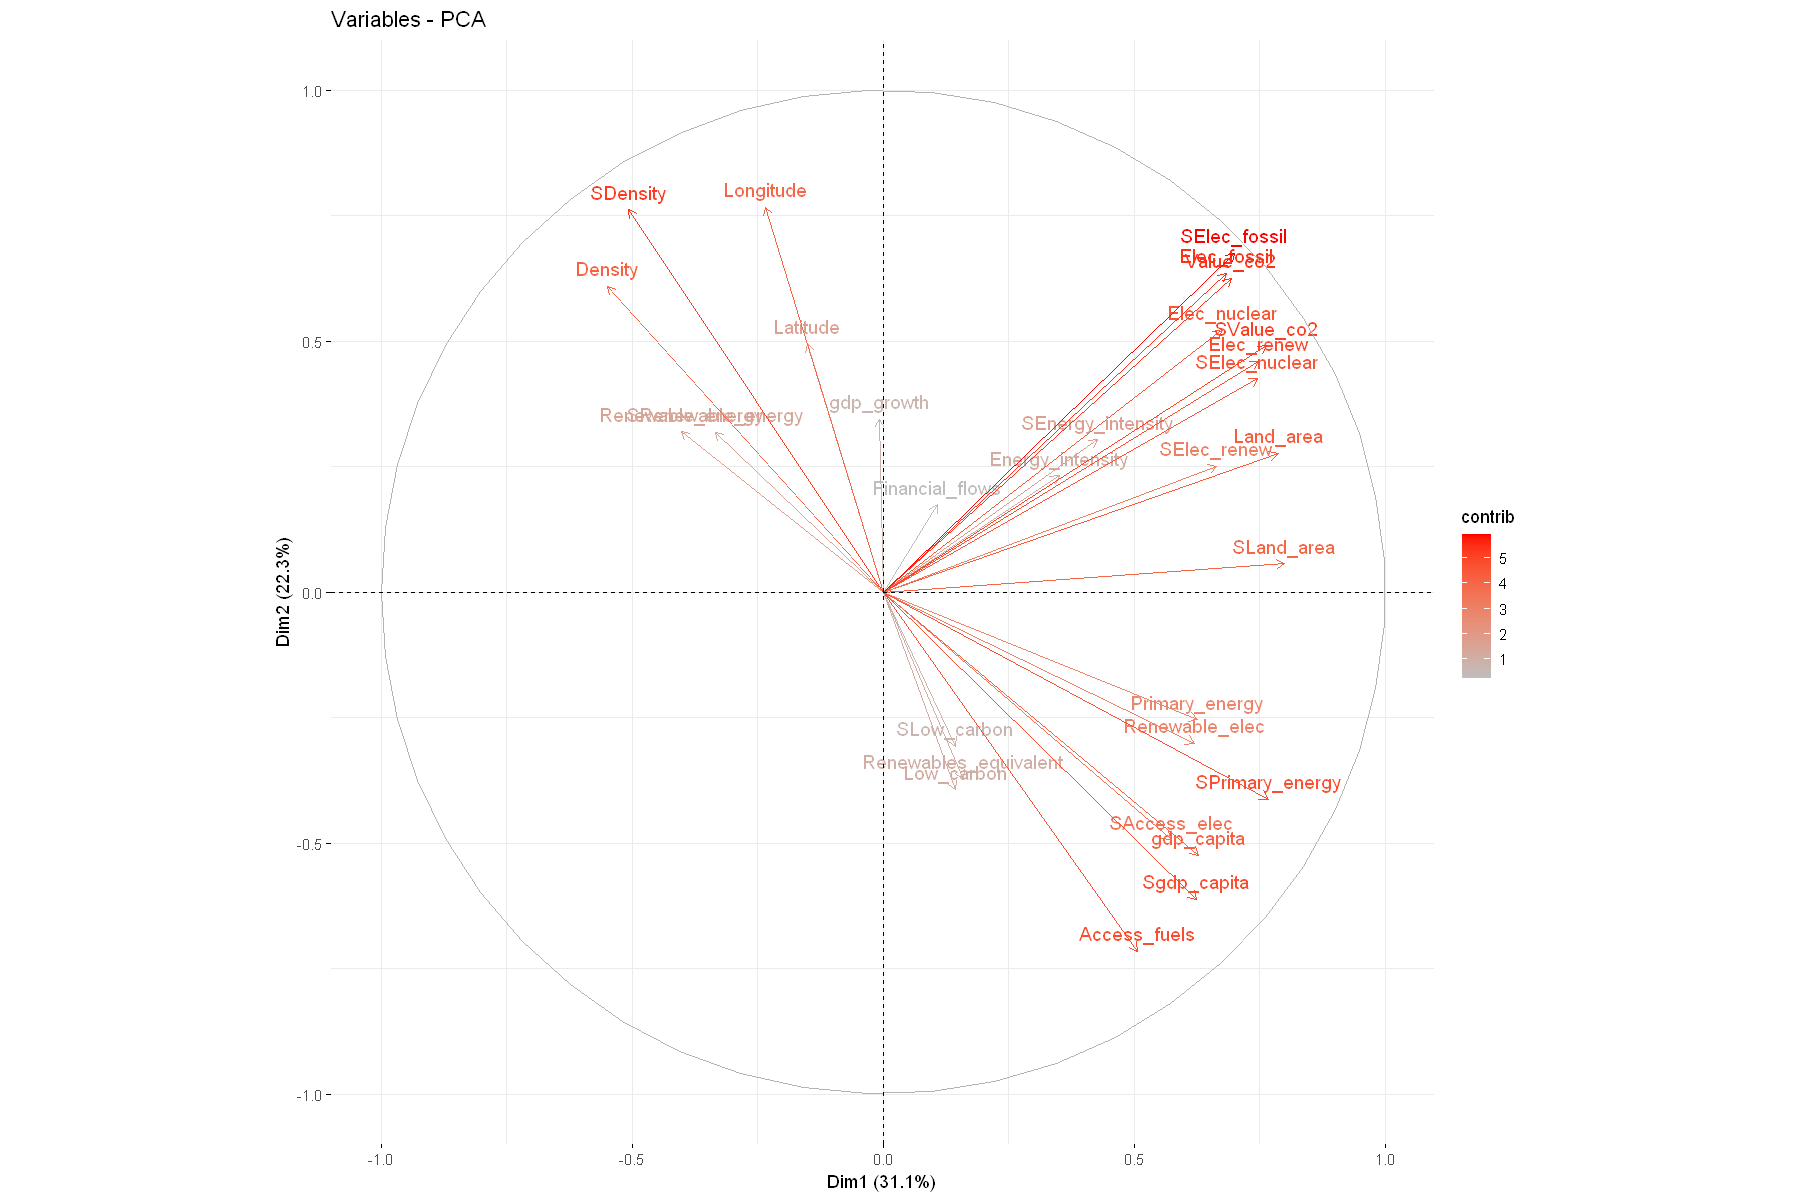

In [59]:
var=get_pca_var(resultat_pca)
fviz_pca_var(resultat_pca,col.var= "contrib",gradient.cols=c("grey", "red"))

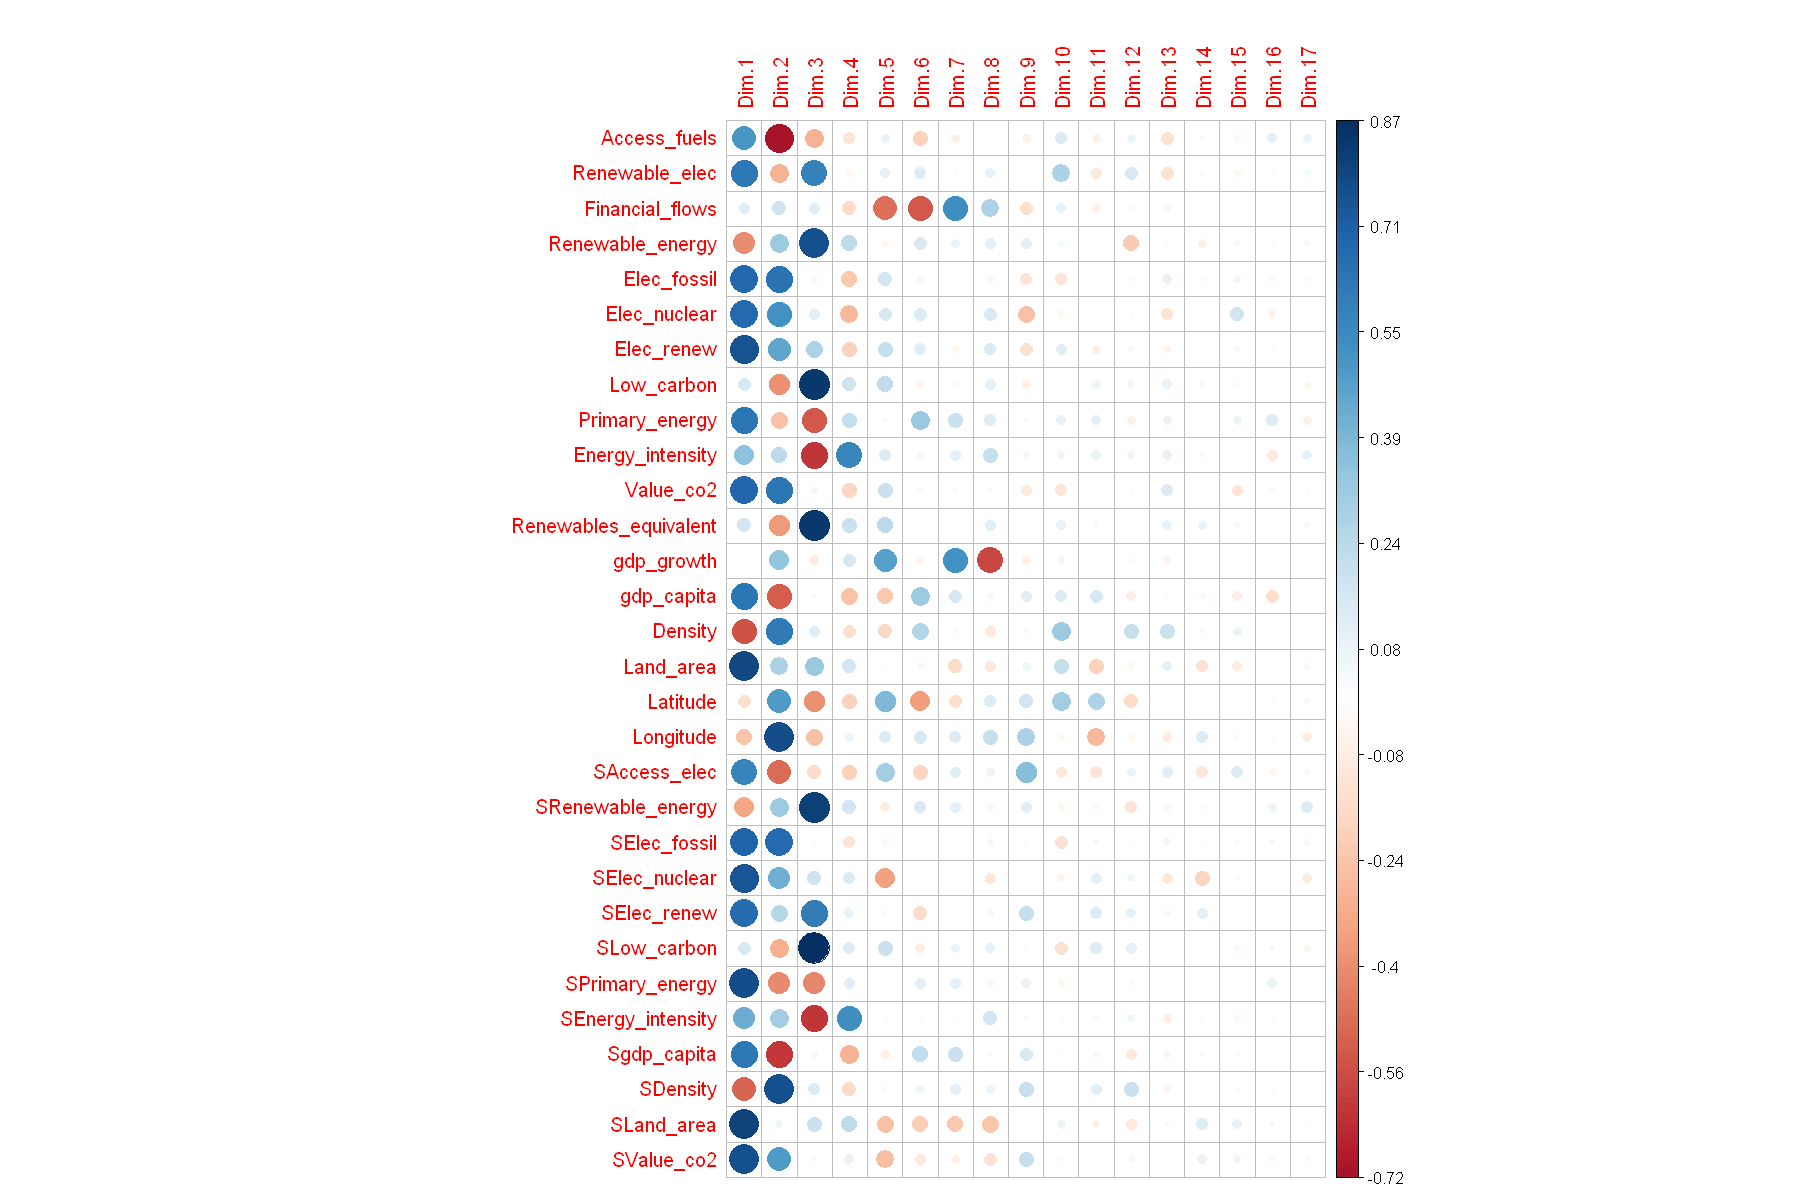

In [60]:
corrplot(resultat_pca$var$cor, is.corr=FALSE)

Dim 1 : Corrélée positivement avec Access_to_Electricity, Access_Clean_Fuel, Primary_energy_consumption, gdp_per_capita / Négativement avec Renewable_share

Dim 2 : Corrélée positivement Land_Area, Electricity_renewables

Dim 4 : Corrélée positivement Density

Dim 5 : Corrélée positivement gdp_growth

Dim 6 Corrélée positivement Latitude

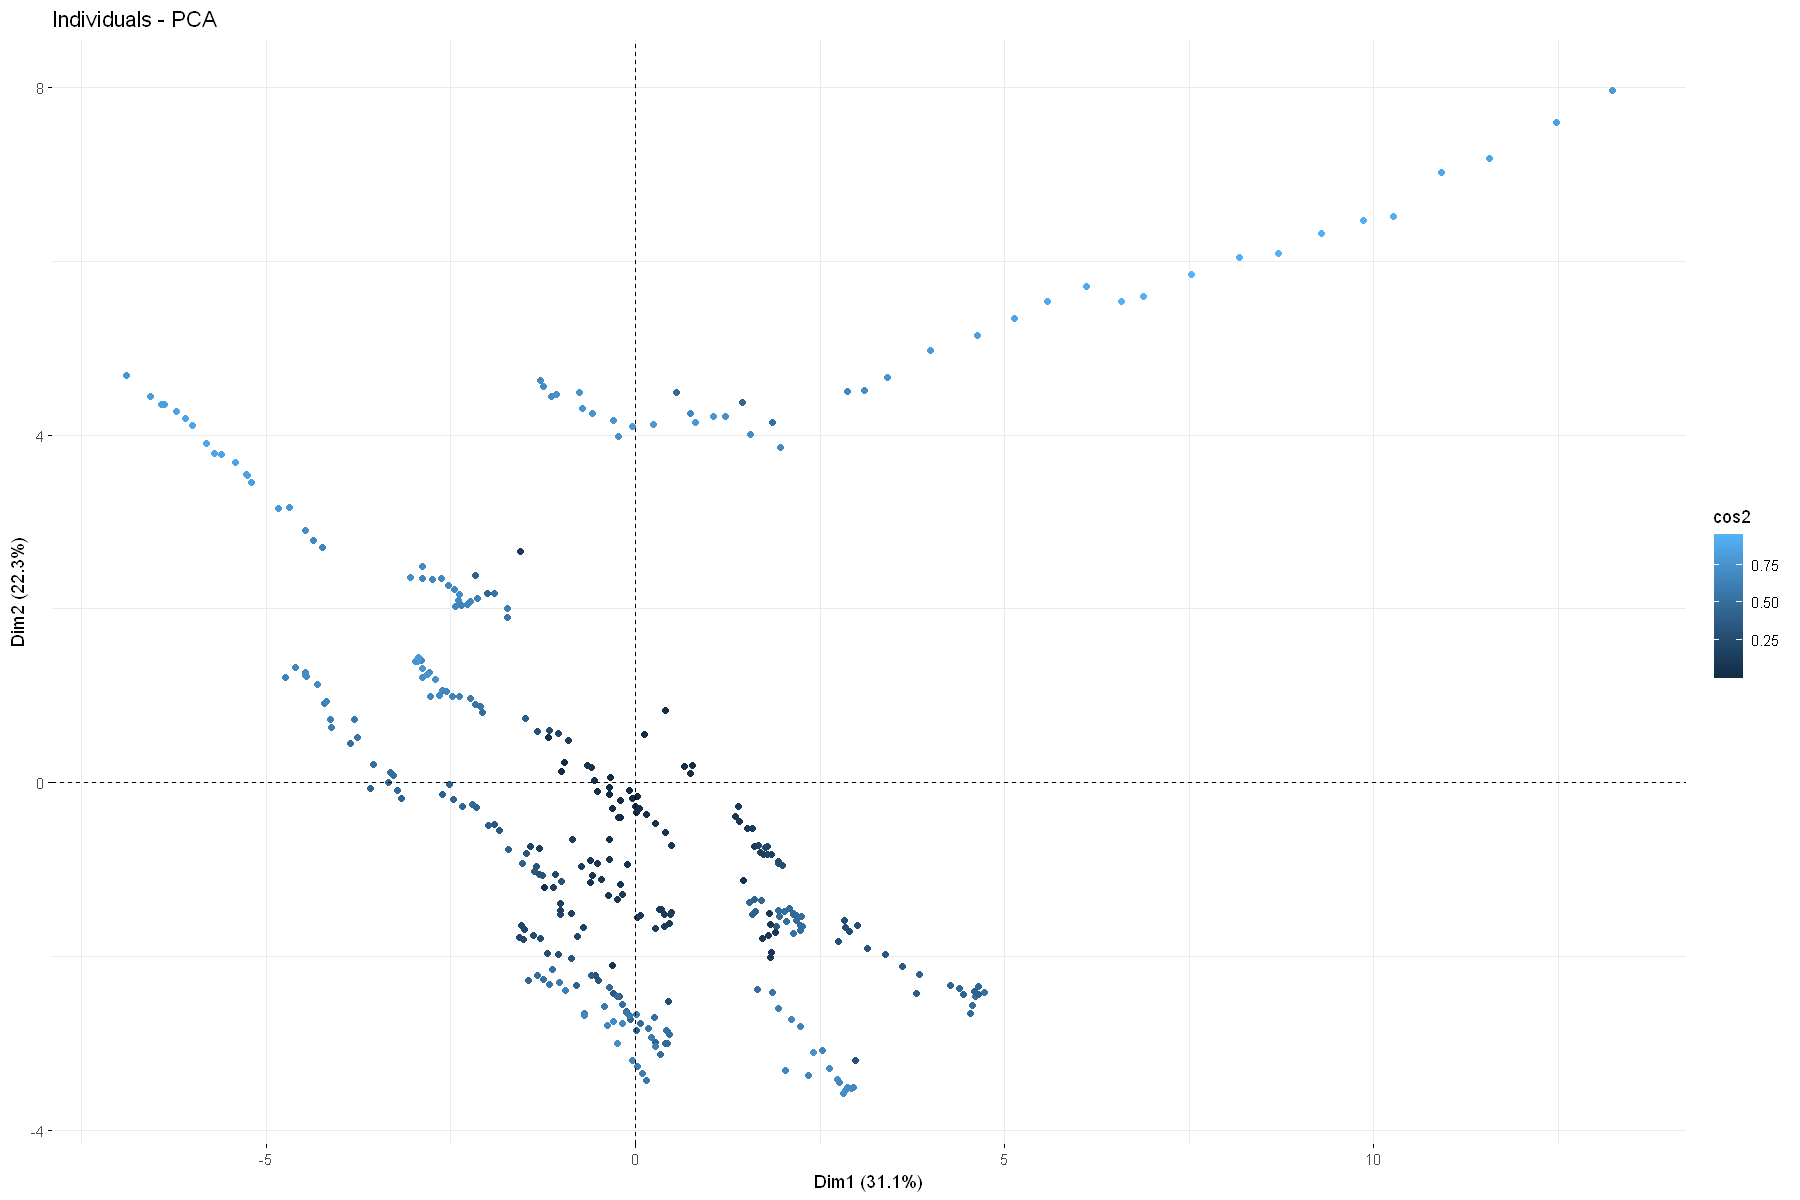

In [61]:
fviz_pca_ind(resultat_pca, label= "none", col.ind="cos2")

# Modélisation

## Question 1

### Diviser échantillon d'apprentissage / de test

In [62]:
complete_energy$Entity = as.factor(complete_energy$Entity)
complete_energy$Year = as.factor(complete_energy$Year)

MEntity <- model.matrix(~ Entity -1, data = complete_energy)
MYear <- model.matrix(~ Year-1, data = complete_energy)

data <- cbind(complete_energy[,-c(1,2)], MEntity, MYear)

complete_energy$Entity

[1] Algeria      Algeria      Algeria      Algeria      Algeria     
  [6] Algeria      Algeria      Algeria      Algeria      Algeria     
 [11] Algeria      Algeria      Algeria      Algeria      Algeria     
 [16] Algeria      Argentina    Argentina    Argentina    Argentina   
 [21] Argentina    Argentina    Argentina    Argentina    Argentina   
 [26] Argentina    Argentina    Argentina    Argentina    Argentina   
 [31] Argentina    Argentina    Argentina    Argentina    Azerbaijan  
 [36] Azerbaijan   Azerbaijan   Azerbaijan   Azerbaijan   Azerbaijan  
 [41] Azerbaijan   Azerbaijan   Azerbaijan   Azerbaijan   Bangladesh  
 [46] Bangladesh   Bangladesh   Bangladesh   Bangladesh   Bangladesh  
 [51] Bangladesh   Bangladesh   Bangladesh   Bangladesh   Bangladesh  
 [56] Bangladesh   Bangladesh   Bangladesh   Bangladesh   Bangladesh  
 [61] Bangladesh   Bangladesh   Bangladesh   Brazil       Brazil      
 [66] Brazil       Brazil       Brazil       Brazil       Brazil      
 [71] Brazil       Brazil       Brazil       Brazil       Brazil      
 [76] Brazil       Brazil       Brazil       Brazil       Brazil      
 [81] Brazil       Brazil       Brazil       China        China       
 [86] China        China        China        China        China       
 [91] China        China        China        China        China       
 [96] China        China        China        China        China       
[101] China        China        China        Colombia     Colombia    
[106] Colombia     Colombia     Colombia     Colombia     Colombia    
[111] Colombia     Colombia     Colombia     Colombia     Colombia    
[116] Colombia     Colombia     Colombia     Colombia     Colombia    
[121] Ecuador      Ecuador      Ecuador      Ecuador      Ecuador     
[126] Ecuador      Ecuador      Ecuador      Ecuador      Ecuador     
[131] Ecuador      Ecuador      Ecuador      Ecuador      Ecuador     
[136] Ecuador      Ecuador      Ecuador      Ecuador      India       
[141] India        India        India        India        India       
[146] India        India        India        India        India       
[151] India        India        India        India        India       
[156] India        India        India        India        Iraq        
[161] Iraq         Iraq         Iraq         Iraq         Iraq        
[166] Iraq         Iraq         Iraq         Iraq         Mexico      
[171] Mexico       Mexico       Mexico       Mexico       Mexico      
[176] Mexico       Mexico       Mexico       Mexico       Mexico      
[181] Mexico       Mexico       Mexico       Mexico       Mexico      
[186] Mexico       Mexico       Mexico       Mexico       Morocco     
[191] Morocco      Morocco      Morocco      Morocco      Morocco     
[196] Morocco      Morocco      Morocco      Morocco      Morocco     
[201] Morocco      Morocco      Morocco      Morocco      Morocco     
[206] Morocco      Morocco      Morocco      Morocco      Pakistan    
[211] Pakistan     Pakistan     Pakistan     Pakistan     Pakistan    
[216] Pakistan     Pakistan     Pakistan     Pakistan     Pakistan    
[221] Pakistan     Pakistan     Pakistan     Pakistan     Pakistan    
[226] Pakistan     Pakistan     Pakistan     Pakistan     Peru        
[231] Peru         Peru         Peru         Peru         Peru        
[236] Peru         Peru         Peru         Peru         Peru        
[241] Peru         Peru         Peru         Peru         Peru        
[246] Peru         Peru         Peru         Peru         Philippines 
[251] Philippines  Philippines  Philippines  Philippines  Philippines 
[256] Philippines  Philippines  Philippines  Philippines  Philippines 
[261] Philippines  Philippines  Philippines  Philippines  Philippines 
[266] Philippines  Philippines  Philippines  South Africa South Africa
[271] South Africa South Africa South Africa South Africa South Africa
[276] South Africa South Africa South Africa South Africa South Africa
[281] South Africa South A

In [63]:
china_data =subset(complete_energy, Entity == "China")
china_data$Entity = as.factor(china_data$Entity)
china_data$Year = as.factor(china_data$Year)

MEntity = model.matrix(~ Entity -1, data = china_data)
MYear = model.matrix(~ Year -1, data = china_data)

data = cbind(china_data[, -c(1, 2)], MEntity, MYear)


In [64]:
set.seed(183) # initialisation du générateur

# Extraction des échantillons
test.ratio <- .2   # part de l'échantillon test
npop <- nrow(complete_energy) # nombre de lignes dans les données
nvar <- ncol(complete_energy) # nombre de colonnes

# taille de l'échantillon test
ntest <- ceiling(npop * test.ratio) 

# indices de l'échantillon test
testi <- sample(1:npop, ntest)
# indices de l'échantillon d'apprentissage
appri <- setdiff(1:npop, testi) 

# construction de l'échantillon d'apprentissage
datappr <- data[appri,] 
# construction de l'échantillon test
datestr <- data[testi, ] 

# vérification
str(datappr)
str(datestr)
#summary(datappr) 

'data.frame':	274 obs. of  71 variables:
 $ Access_fuels         : num  42 42.3 43.1 43.4 44.9 47.7 49.4 51.1 53.5 55.6 ...
 $ Renewable_elec       : num  58.8 61 63.7 70.2 77.8 ...
 $ Financial_flows      : num  2.44e+08 3.25e+08 2.18e+08 2.25e+07 3.27e+07 ...
 $ Renewable_energy     : num  29.6 28.4 27 23.9 20.2 ...
 $ Elec_fossil          : num  1113 1183 1337 1580 1795 ...
 $ Elec_nuclear         : num  16.7 17.5 25.1 43.3 50.5 ...
 $ Elec_renew           : num  226 281 291 287 357 ...
 $ Low_carbon           : num  17.9 20.1 19.1 17.3 18.5 ...
 $ Primary_energy       : num  9335 9798 10602 12273 14273 ...
 $ Energy_intensity     : num  10.8 10.4 10.1 10.5 10.8 ...
 $ Value_co2            : num  3346530 3529080 3810060 4415910 5124820 ...
 $ Renewables_equivalent: num  5.66 6.62 6.28 5.3 5.6 ...
 $ gdp_growth           : num  8.49 8.34 9.13 10.04 10.11 ...
 $ gdp_capita           : num  959 1053 1149 1289 1509 ...
 $ Density              : num  153 153 153 153 153 153 153 153 153 1

Permet de tester notre modèle sur des données encore non traitées Eviter le sur ajustement. 

## Question 2

### Modèle linéaire

#### Sans sélection de variable

In [66]:
# estimation du modèle sans interaction
reg.lm <-aov(SValue_co2 ~ . , data = datappr)
# Extraction des résidus et des valeurs ajustées de ce modèle
res.lm <- reg.lm$residuals
fit.lm <- reg.lm$fitted.values

plot(fit.lm,datappr$SValue_co2)

ERROR: Error in xy.coords(x, y, xlabel, ylabel, log): les longueurs de 'x' et 'y' diffèrent


##### MSE et R²

In [67]:
MSE = mean((datappr$SValue_co2 - fit.lm)^2)
paste("MSE =", MSE)

# Calculer le coefficient de détermination R² (R2 score)

SS_Residual <- sum((datappr$SValue_co2 - fit.lm)^2)
SS_Total <- sum((datappr$SValue_co2 - mean(datappr$SValue_co2))^2)
R2 <- 1 - (SS_Residual / SS_Total)
paste("R2 =", R2)


Warning message in datappr$SValue_co2 - fit.lm:
"la taille d'un objet plus long n'est pas multiple de la taille d'un objet plus court"


[1] "MSE = NA"

Warning message in datappr$SValue_co2 - fit.lm:
"la taille d'un objet plus long n'est pas multiple de la taille d'un objet plus court"


[1] "R2 = NA"

##### Graphe des résidus

In [ ]:
ggplot(data.frame(residuals = res.lm, predicted = fitted(reg.lm)), aes(x = predicted, y = residuals)) +
  geom_point() +
  geom_hline(yintercept = 0 ,color = "red") 

In [ ]:
#summary(reg.lm)
#coef(reg.lm)

#### Avec sélection de variable (AIC)

In [ ]:
reg.glm <- glm(SValue_co2_emissions_kt_by_country ~ .^2, data = datappr)
# Recherche du meilleur modèle au sens 
# du critère d'Akaïke par méthode descendante
reg.glm.step <- step(reg.glm, direction = "backward")

#### Avec sélection de variable (LASSO)

In [ ]:
# avec des variables quantitatives seulement
reg.lasso.quanti <- glmnet(y = datappr[, 16],
                           x = as.matrix(datappr[,-16]))
# avec toutes les variables, créer d'abord la matrice d'expériences 
# avec 'model.matrix' (penser à retirer l'intercept du modèle)
x.mat <- model.matrix(SValue_co2 ~ . - 1, data = datappr)
reg.lasso <- glmnet(y = datappr$SValue_co2, x = x.mat)
options(repr.plot.width = 12, repr.plot.height = 10)
plot(reg.lasso, xvar = "lambda", label = TRUE)

In [ ]:
reg.lasso.cv = cv.glmnet(y = datappr[, 16], x = x.mat)
#plot(reg.lasso.cv)
plot(reg.lasso.cv)

In [ ]:
# valeur estimée
paste("CV estimate of lambda :", round(reg.lasso.cv$lambda.1se, 3))
# modèle correspondant
#coef(reg.lasso.cv, s = "lambda.1se")

In [ ]:
plot(reg.lasso, xvar = "lambda", label = TRUE,xlim=c(-7,-5),ylim=c(-1,1))
abline(v=log(reg.lasso.cv$lambda.1se),col="red")

In [ ]:
# Extraction des valeurs ajustées et des résidus

fit.lasso.1se <- predict(reg.lasso.cv, s = "lambda.1se", newx = x.mat)
res.lasso.1se <- datappr$SValue_co2 - fit.lasso.1se 

##### MSE et R²

In [ ]:
MSE = mean((datappr$SValue_co2 - fit.lasso.1se)^2)
paste("MSE =", MSE)

# Calculer le coefficient de détermination R² (R2 score)

SS_Residual <- sum((datappr$SValue_co2 - fit.lasso.1se)^2)
SS_Total <- sum((datappr$SValue_co2 - mean(datappr$SValue_co2))^2)
R2 <- 1 - (SS_Residual / SS_Total)
paste("R2 =", R2)

##### Graphe des résidus

In [ ]:

ggplot(data.frame(residuals = res.lasso.1se, predicted = fit.lasso.1se), aes(x = fit.lasso.1se, y = res.lasso.1se)) + geom_point()+
  geom_hline(yintercept = 0 ,color = "red")

### SVM

On enlève l'année 2020 parce qu'il n'y a jamais aucune donnée dedans

In [ ]:
datappr <- datappr[, !names(data) %in% "Year2020"]

In [ ]:
svm.reg0 = svm(SValue_co2 ~ ., data = datappr)
summary(svm.reg0)

#### Choix du meilleur noyau SVM

In [ ]:
svm.reg.tune = tune.svm(SValue_co2 ~ ., data = datappr, cost = seq(2, 3, by = 0.5), 
    gamma = seq(0.1, 0.5, by = 0.1))
plot(svm.reg.tune)

In [ ]:
svm.reg.tune = tune.svm(SValue_co2 ~ ., data = datappr, cost = c(1, 1.5, 2, 2.5, 3, 3.5), 
    gamma = seq(0.02, 0.1, by = 0.02))
plot(svm.reg.tune)

In [ ]:
#set.seed(2021)
svm.reg = svm(SValue_co2~ ., data = datappr, cost = svm.reg.tune$best.parameters$cost, 
    gamma = svm.reg.tune$best.parameters$gamma, epsilon = 0.25)
summary(svm.reg)

#### Résidus

In [ ]:
fit.svmr=svm.reg$fitted
res.svmr=fit.svmr-datappr[,"SValue_co2"]
gplot.res(fit.svmr,res.svmr,titre="")

### Arbre

In [ ]:
tree.reg=rpart(SValue_co2~.,data=datappr,control=rpart.control(cp=0.001))

In [ ]:
library(rpart.plot)
options(repr.plot.width = 15, repr.plot.height = 10)
rpart.plot(tree.reg)

In [ ]:
xmat<-xpred.rpart(tree.reg,xval=10) 
# one row for each observation and one column for each complexity value

# Cross-validation error par valeur de CP
CVerr<-apply((xmat-datappr[,"SValue_co2"])^2,2,sum)

plotcp(tree.reg)

In [ ]:
as.numeric(attributes(which.min(CVerr))$names)
tree.reg=rpart(SValue_co2~.,data=datappr,control=rpart.control(cp=as.numeric(attributes(which.min(CVerr))$names)))
rpart.plot(tree.reg,type=5,extra=101)

In [ ]:
library(partykit)
plot(as.party(tree.reg), type="simple")

In [ ]:
fit.tree=predict(tree.reg)
res.tree=fit.tree-datappr[,"SValue_co2"]

options(repr.plot.width = 12, repr.plot.height = 4)
par(mfrow = c(1, 3))
ggplot(data.frame(residuals = res.tree, predicted = fit.tree), aes(x = predicted, y = residuals)) +
  geom_point() +
  geom_hline(yintercept = 0 ,color = "red") +
  ggtitle("Tree")

### Random Forest

In [ ]:
rf.reg=randomForest(SValue_co2~., data=datappr,xtest=datestr[,-c(16,20)],ytest=datestr[,"SValue_co2"],
   ntree=500,do.trace=50,importance=TRUE)
attributes(rf.reg)
rf.reg$mtry

In [ ]:
rf.reg=randomForest(SValue_co2~.,data=datappr,mtry=5,importance=TRUE,na.action = na.omit)